# import modules

In [59]:
from scripts.Classes_ver1 import *
from scripts.default_params_ver1 import *
from scripts.functions_ver2 import *

# define functions to compare lensing and precessing

In [60]:
# plot h_comparison_all and phase_diff_all side by side

lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)


def h_phase_diff_all(
    location_params: dict, lens_Class=LensingGeo, prec_Class=Precessing
):
    global lens_params, RP_params, NP_params

    nrows = len(location_params)
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 4 * nrows))
    # reshape axes to 2D if it's 1D
    if axes.ndim == 1:
        axes = axes.reshape(1, -1)

    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, key in enumerate(location_params.keys()):
        # set lensed, RP, and NP to same location
        lens_params, RP_params, NP_params = set_to_location(
            location_params[key], lens_params, RP_params, NP_params
        )

        # lensed waveform
        lens_inst = lens_Class(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # RP waveform
        RP_inst = prec_Class(RP_params)
        f_cut_RP = RP_inst.f_cut()
        f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
        RP_strain = RP_inst.strain(f_range_RP)
        phase_RP = np.unwrap(np.angle(RP_strain))

        # NP waveform
        NP_inst = prec_Class(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        # set plot colors based on sky location
        colors = {"faceon": "#1f77b4", "edgeon": "#ff7f0e", "random": "#2ca02c"}

        # left column: h_comparison_all
        axes[r, 0].loglog(
            f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[key]
        )
        axes[r, 0].loglog(
            f_range_RP, np.abs(RP_strain), label="RP", ls="--", c=colors[key]
        )
        axes[r, 0].loglog(
            f_range_NP, np.abs(NP_strain), label="NP", ls=":", c=colors[key]
        )
        axes[r, 0].set_xlabel("f")
        axes[r, 0].set_ylabel(r"$|\~{h}|$")
        axes[r, 0].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r, 0].legend()

        # right column: phase_diff_all
        phase_diff_L_RP = phase_L - phase_RP
        phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
        axes[r, 1].plot(
            f_range_RP, phase_diff_L_RP, label="L & RP", ls="-", c=colors[key]
        )

        phase_diff_L_NP = phase_L - phase_NP
        phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_L_NP, label="L & NP", ls="--", c=colors[key]
        )

        phase_diff_RP_NP = phase_RP - phase_NP
        phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
        axes[r, 1].plot(
            f_range_NP, phase_diff_RP_NP, label="RP & NP", ls=":", c=colors[key]
        )

        axes[r, 1].set_xlabel("f")
        axes[r, 1].set_ylabel(r"$\Delta \Phi$")
        axes[r, 1].set_title(
            r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                location_params[key]["theta_S"],
                location_params[key]["phi_S"],
                location_params[key]["theta_J"],
                location_params[key]["phi_J"],
            )
        )
        axes[r, 1].legend()

In [61]:
lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)


def slider_h_phase_diff_all(
    location_params,
    mcz,
    theta_tilde,
    param_name,
    param_unit,
    param,
    param_label,
    lens_Class=LensingGeo,
    prec_Class=Precessing,
):
    global lens_params, RP_params, NP_params

    lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    RP_params["theta_tilde"] = theta_tilde
    RP_params[param_name] = param * param_unit

    h_phase_diff_all(location_params, lens_Class, prec_Class)

    # add a big title above the figure
    plt.suptitle(
        r"{} = {:.3g}, {} = {:.3g}".format(
            r"$\tilde{\theta}$", RP_params["theta_tilde"], param_label, param
        ),
        fontsize=16,
        y=1.05,
    )

In [62]:
lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)

def h_phase_diff_pairs(lens_Class=LensingGeo, prec_Class=Precessing):
    global lens_params, RP_params, NP_params

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 4 * 3))
    
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    for r, cmd in enumerate(["L & RP", "L & NP", "RP & NP"]):
        # lensed waveform
        lens_inst = lens_Class(lens_params)
        f_min = 20
        f_cut_L = lens_inst.f_cut()
        f_range_L = np.linspace(f_min, f_cut_L, 10000)
        lensed_strain = lens_inst.strain(f_range_L)
        phase_L = np.unwrap(np.angle(lensed_strain))

        # NP waveform
        NP_inst = prec_Class(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_range_NP = np.linspace(f_min, f_cut_NP, 10000)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        # set plot colors based on sky location
        colors = {"L & RP": "#1f77b4", "L & NP": "#ff7f0e", "RP & NP": "#2ca02c"}

        if cmd == "L & RP":
            mismatch_results = optimize_mismatch_gammaP(cmd, lens_params, RP_params, NP_params)
            print(cmd, mismatch_results)
            
            # RP waveform
            RP_params["gamma_P"] = mismatch_results["g_min"]
            RP_inst = prec_Class(RP_params)
            f_cut_RP = RP_inst.f_cut()
            f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
            RP_strain = RP_inst.strain(f_range_RP)
            phase_RP = np.unwrap(np.angle(RP_strain))

            # plotting
            axes[r, 0].loglog(f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[cmd])
            axes[r, 0].loglog(f_range_RP, np.abs(RP_strain), label="RP", ls="--", c=colors[cmd])
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_L_RP = phase_L - phase_RP
            phase_diff_L_RP = phase_diff_L_RP - phase_diff_L_RP[0]
            axes[r, 1].plot(f_range_RP, phase_diff_L_RP, label="L & RP", ls="-", c=colors[cmd])
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()

        elif cmd == "L & NP":
            mismatch_results = optimize_mismatch_gammaP(cmd, lens_params, RP_params, NP_params)
            print(cmd, mismatch_results)

            # plotting
            axes[r, 0].loglog(f_range_L, np.abs(lensed_strain), label="L", ls="-", c=colors[cmd])
            axes[r, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", ls="--", c=colors[cmd])
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_L_NP = phase_L - phase_NP
            phase_diff_L_NP = phase_diff_L_NP - phase_diff_L_NP[0]
            axes[r, 1].plot(f_range_NP, phase_diff_L_NP, label="L & NP", ls="-", c=colors[cmd])
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()

        elif cmd == "RP & NP":
            mismatch_results = optimize_mismatch_gammaP(cmd, lens_params, RP_params, NP_params)
            print(cmd, mismatch_results)
            
            # RP waveform
            RP_params["gamma_P"] = mismatch_results["g_min"]
            RP_inst = prec_Class(RP_params)
            f_cut_RP = RP_inst.f_cut()
            f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
            RP_strain = RP_inst.strain(f_range_RP)
            phase_RP = np.unwrap(np.angle(RP_strain))

            # plotting
            axes[r, 0].loglog(f_range_RP, np.abs(RP_strain), label="RP", ls="-", c=colors[cmd])
            axes[r, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", ls="--", c=colors[cmd])
            axes[r, 0].set_xlabel("f")
            axes[r, 0].set_ylabel(r"$|\~{h}|$")
            axes[r, 0].set_title(cmd)
            axes[r, 0].legend()

            phase_diff_RP_NP = phase_RP - phase_NP
            phase_diff_RP_NP = phase_diff_RP_NP - phase_diff_RP_NP[0]
            axes[r, 1].plot(f_range_NP, phase_diff_RP_NP, label="RP & NP", ls="-", c=colors[cmd])
            axes[r, 1].set_xlabel("f")
            axes[r, 1].set_ylabel(r"$\Delta \Phi$")
            axes[r, 1].set_title(cmd)
            axes[r, 1].legend()
        
    plt.suptitle(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
                lens_params['theta_S'], lens_params['phi_S'], lens_params['theta_J'], lens_params['phi_J']
            ),
        fontsize=16,
        y=1.05,
    )

# plot optimized mismatch over $\mathcal{M}_{\text{L}}$

In [63]:
with open("data/optimized_mcz_dict_05.pkl", "rb") as f:
    optimized_mcz_dict_05 = pickle.load(f)

with open("data/optimized_mcz_dict_50.pkl", "rb") as f:
    optimized_mcz_dict_50 = pickle.load(f)

with open("data/optimized_mcz_dict_95.pkl", "rb") as f:
    optimized_mcz_dict_95 = pickle.load(f)

Text(0.5, 1.0, '$\\theta_S$ = 0.785, $\\phi_S$ = 0, $\\theta_J$ = 2.79, $\\phi_J$ = 0.785')

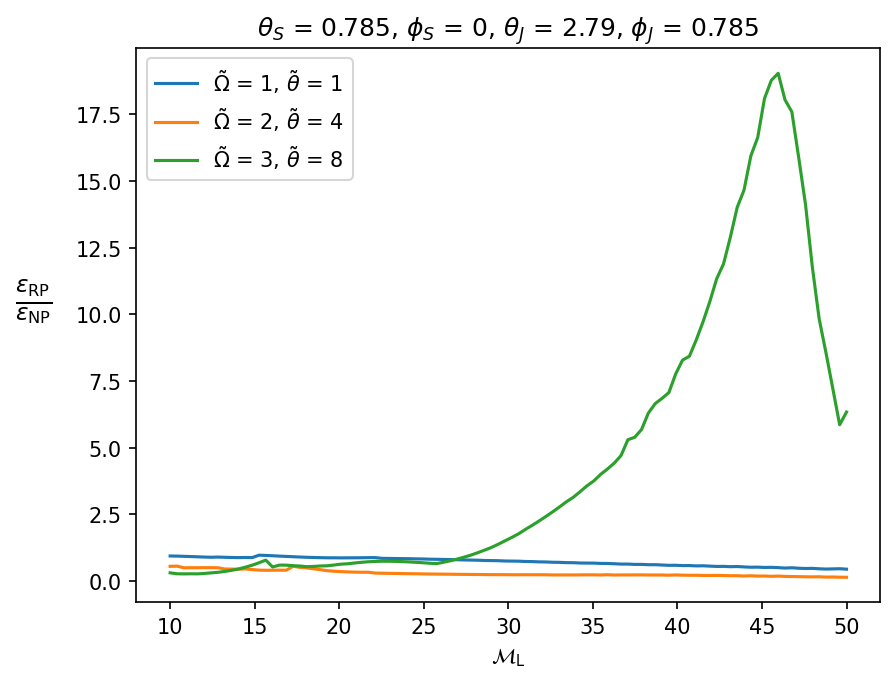

In [44]:
x_05 = np.array(list(optimized_mcz_dict_05.keys()))
y_05 = np.array([item["ep_ratio"] for item in optimized_mcz_dict_05.values()])

x_50 = np.array(list(optimized_mcz_dict_50.keys()))
y_50 = np.array([item["ep_ratio"] for item in optimized_mcz_dict_50.values()])

x_95 = np.array(list(optimized_mcz_dict_95.keys()))
y_95 = np.array([item["ep_ratio"] for item in optimized_mcz_dict_95.values()])

plt.plot(x_05, y_05, label=r"$\~\Omega$ = 1, $\~\theta$ = 1")
plt.plot(x_50, y_50, label=r"$\~\Omega$ = 2, $\~\theta$ = 4")
plt.plot(x_95, y_95, label=r"$\~\Omega$ = 3, $\~\theta$ = 8")
plt.legend()
plt.xlabel(r"$\mathcal{M}_{\text{L}}$")
plt.ylabel(r"$\frac {\epsilon_{\rm RP}} {\epsilon_{\rm NP}}$", rotation=0, labelpad=20, fontsize=16)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
        loc_params["sys2"]["random"]["theta_S"],
        loc_params["sys2"]["random"]["phi_S"],
        loc_params["sys2"]["random"]["theta_J"],
        loc_params["sys2"]["random"]["phi_J"],
    )
)

# plot optimized mismatch over $\gamma_P$ & $\mathcal{M}_{\text{RP}}$

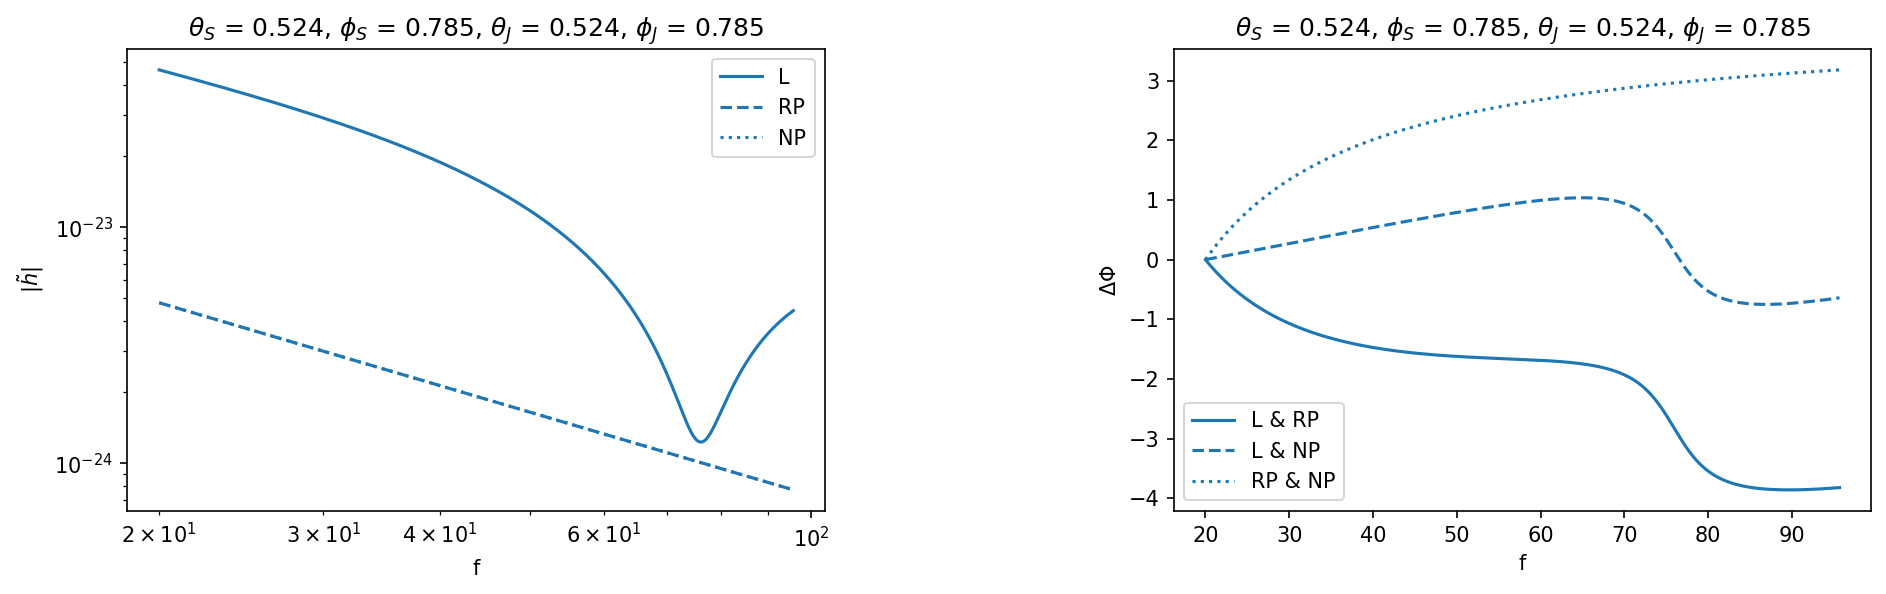

In [12]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# create individual location dictionary
key = "faceon"
indiv_loc_dict = {key: loc_params["sys1"][key]}

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 0.316
RP_params["theta_tilde"] = 0.0
RP_params["gamma_P"] = 0.0

# using Saif's choice of sky locations
h_phase_diff_all(indiv_loc_dict)

In [ ]:
lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)

# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

percentile = "05%"
RP_params["omega_tilde"] = omega_theta_tilde_pairs[percentile]["omega_tilde"]
RP_params["theta_tilde"] = omega_theta_tilde_pairs[percentile]["theta_tilde"]

lens_mcz_slider = np.linspace(10, 50, 100)

for lens_mcz in optimized_mcz_dict_05.keys():
    lens_params["mcz"] = lens_mcz * solar_mass
    RP_params["mcz"] = optimized_mcz_dict_05[lens_mcz]["ep_min_mcz"]
    RP_params["gamma_P"] = optimized_mcz_dict_05[lens_mcz]["ep_min_gamma"]
    NP_params["mcz"] = optimized_mcz_dict_05[lens_mcz]["ep_min_mcz"]
    h_phase_diff_all(indiv_loc_dict)
    
    # add big title above the figure
    # plt.suptitle(
    #     r"$\mathcal{M}_{\text{L}}$ = {:.3g}, $\mathcal{M}_{\text{RP}}$ = {:.3g}, $\gamma_P$ = {:.3g}".format(
    #         lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"]
    #     ),
    #     fontsize=16,
    #     y=1.05,
    # )

    plt.suptitle(
        r"lens mcz = {:.3g}, RP mcz = {:.3g}, $\gamma_P$ = {:.3g}, $\epsilon_R / \epsilon_N$ = {:.3g}".format(
            lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"], optimized_mcz_dict_05[lens_mcz]["ep_ratio"]
        ),
        fontsize=16,
        y=1.05,
    )

In [ ]:
lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)

# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

percentile = "50%"
RP_params["omega_tilde"] = omega_theta_tilde_pairs[percentile]["omega_tilde"]
RP_params["theta_tilde"] = omega_theta_tilde_pairs[percentile]["theta_tilde"]

lens_mcz_slider = np.linspace(10, 50, 100)

for lens_mcz in optimized_mcz_dict_50.keys():
    lens_params["mcz"] = lens_mcz * solar_mass
    RP_params["mcz"] = optimized_mcz_dict_50[lens_mcz]["ep_min_mcz"]
    RP_params["gamma_P"] = optimized_mcz_dict_50[lens_mcz]["ep_min_gamma"]
    NP_params["mcz"] = optimized_mcz_dict_50[lens_mcz]["ep_min_mcz"]
    h_phase_diff_all(indiv_loc_dict)
    
    # add big title above the figure
    # plt.suptitle(
    #     r"$\mathcal{M}_{\text{L}}$ = {:.3g}, $\mathcal{M}_{\text{RP}}$ = {:.3g}, $\gamma_P$ = {:.3g}".format(
    #         lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"]
    #     ),
    #     fontsize=16,
    #     y=1.05,
    # )

    plt.suptitle(
        r"lens mcz = {:.3g}, RP mcz = {:.3g}, $\gamma_P$ = {:.3g}, $\epsilon_R / \epsilon_N$ = {:.3g}".format(
            lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"], optimized_mcz_dict_50[lens_mcz]["ep_ratio"]
        ),
        fontsize=16,
        y=1.05,
    )

In [69]:
# get the last 20 entries of the dictionary
optimized_mcz_dict_95_last20 = dict(list(optimized_mcz_dict_95.items())[-20:])
optimized_mcz_dict_95_last20

{42.323232323232325: {'ep_min': 0.03726880749079897,
  'ep_min_gamma': 1.269330365086785,
  'ep_min_mcz': 0.00021342067292565655,
  'ep_max': 0.34670778791610934,
  'ep_max_gamma': 2.982926357953945,
  'ep_max_mcz': 0.00020685235191232322,
  'ep_0': array([], dtype=float64),
  'ep_NP_L': 0.0032871954018326432,
  'ep_ratio': 11.33756985362697},
 42.72727272727273: {'ep_min': 0.036744732658611556,
  'ep_min_gamma': 1.3327968833411243,
  'ep_min_mcz': 0.00021541107323272724,
  'ep_max': 0.3452557237840955,
  'ep_max_gamma': 3.0463928762082846,
  'ep_max_mcz': 0.00020904179225010098,
  'ep_0': array([], dtype=float64),
  'ep_NP_L': 0.0030895535746486846,
  'ep_ratio': 11.893217505635851},
 43.13131313131313: {'ep_min': 0.036199543108526466,
  'ep_min_gamma': 1.3962634015954636,
  'ep_min_mcz': 0.00021740147353979794,
  'ep_max': 0.34536497910129194,
  'ep_max_gamma': 3.1098593944626236,
  'ep_max_mcz': 0.00021152979263393935,
  'ep_0': array([], dtype=float64),
  'ep_NP_L': 0.0028069440889

L & RP {'ep_min': 0.04464235667481298, 'g_min': 1.3327968833411243, 'ep_max': 0.33972519076728747, 'g_max': 2.8559933214452666, 'ep_0': 0.1386286238856569}
L & NP {'ep_min': 0.012517834405055939, 'g_min': 0.0, 'ep_max': 0.012517834405055939, 'g_max': 0.0, 'ep_0': 0.012517834405055939}
RP & NP {'ep_min': 0.046247915922527416, 'g_min': 1.0789308103237674, 'ep_max': 0.36058610032945615, 'g_max': 2.6655937666822487, 'ep_0': 0.11228086097228396}
L & RP {'ep_min': 0.0438695811073313, 'g_min': 1.3962634015954636, 'ep_max': 0.33664610353401203, 'g_max': 2.9194598396996057, 'ep_0': 0.13468865352377246}
L & NP {'ep_min': 0.012315512758728886, 'g_min': 0.0, 'ep_max': 0.012315512758728886, 'g_max': 0.0, 'ep_0': 0.012315512758728886}
RP & NP {'ep_min': 0.04534605372923717, 'g_min': 1.1423973285781066, 'ep_max': 0.3613378870122165, 'g_max': 2.792526803190927, 'ep_0': 0.12017971026937235}
L & RP {'ep_min': 0.043224706047154116, 'g_min': 1.4597299198498028, 'ep_max': 0.3422992869454414, 'g_max': 3.046

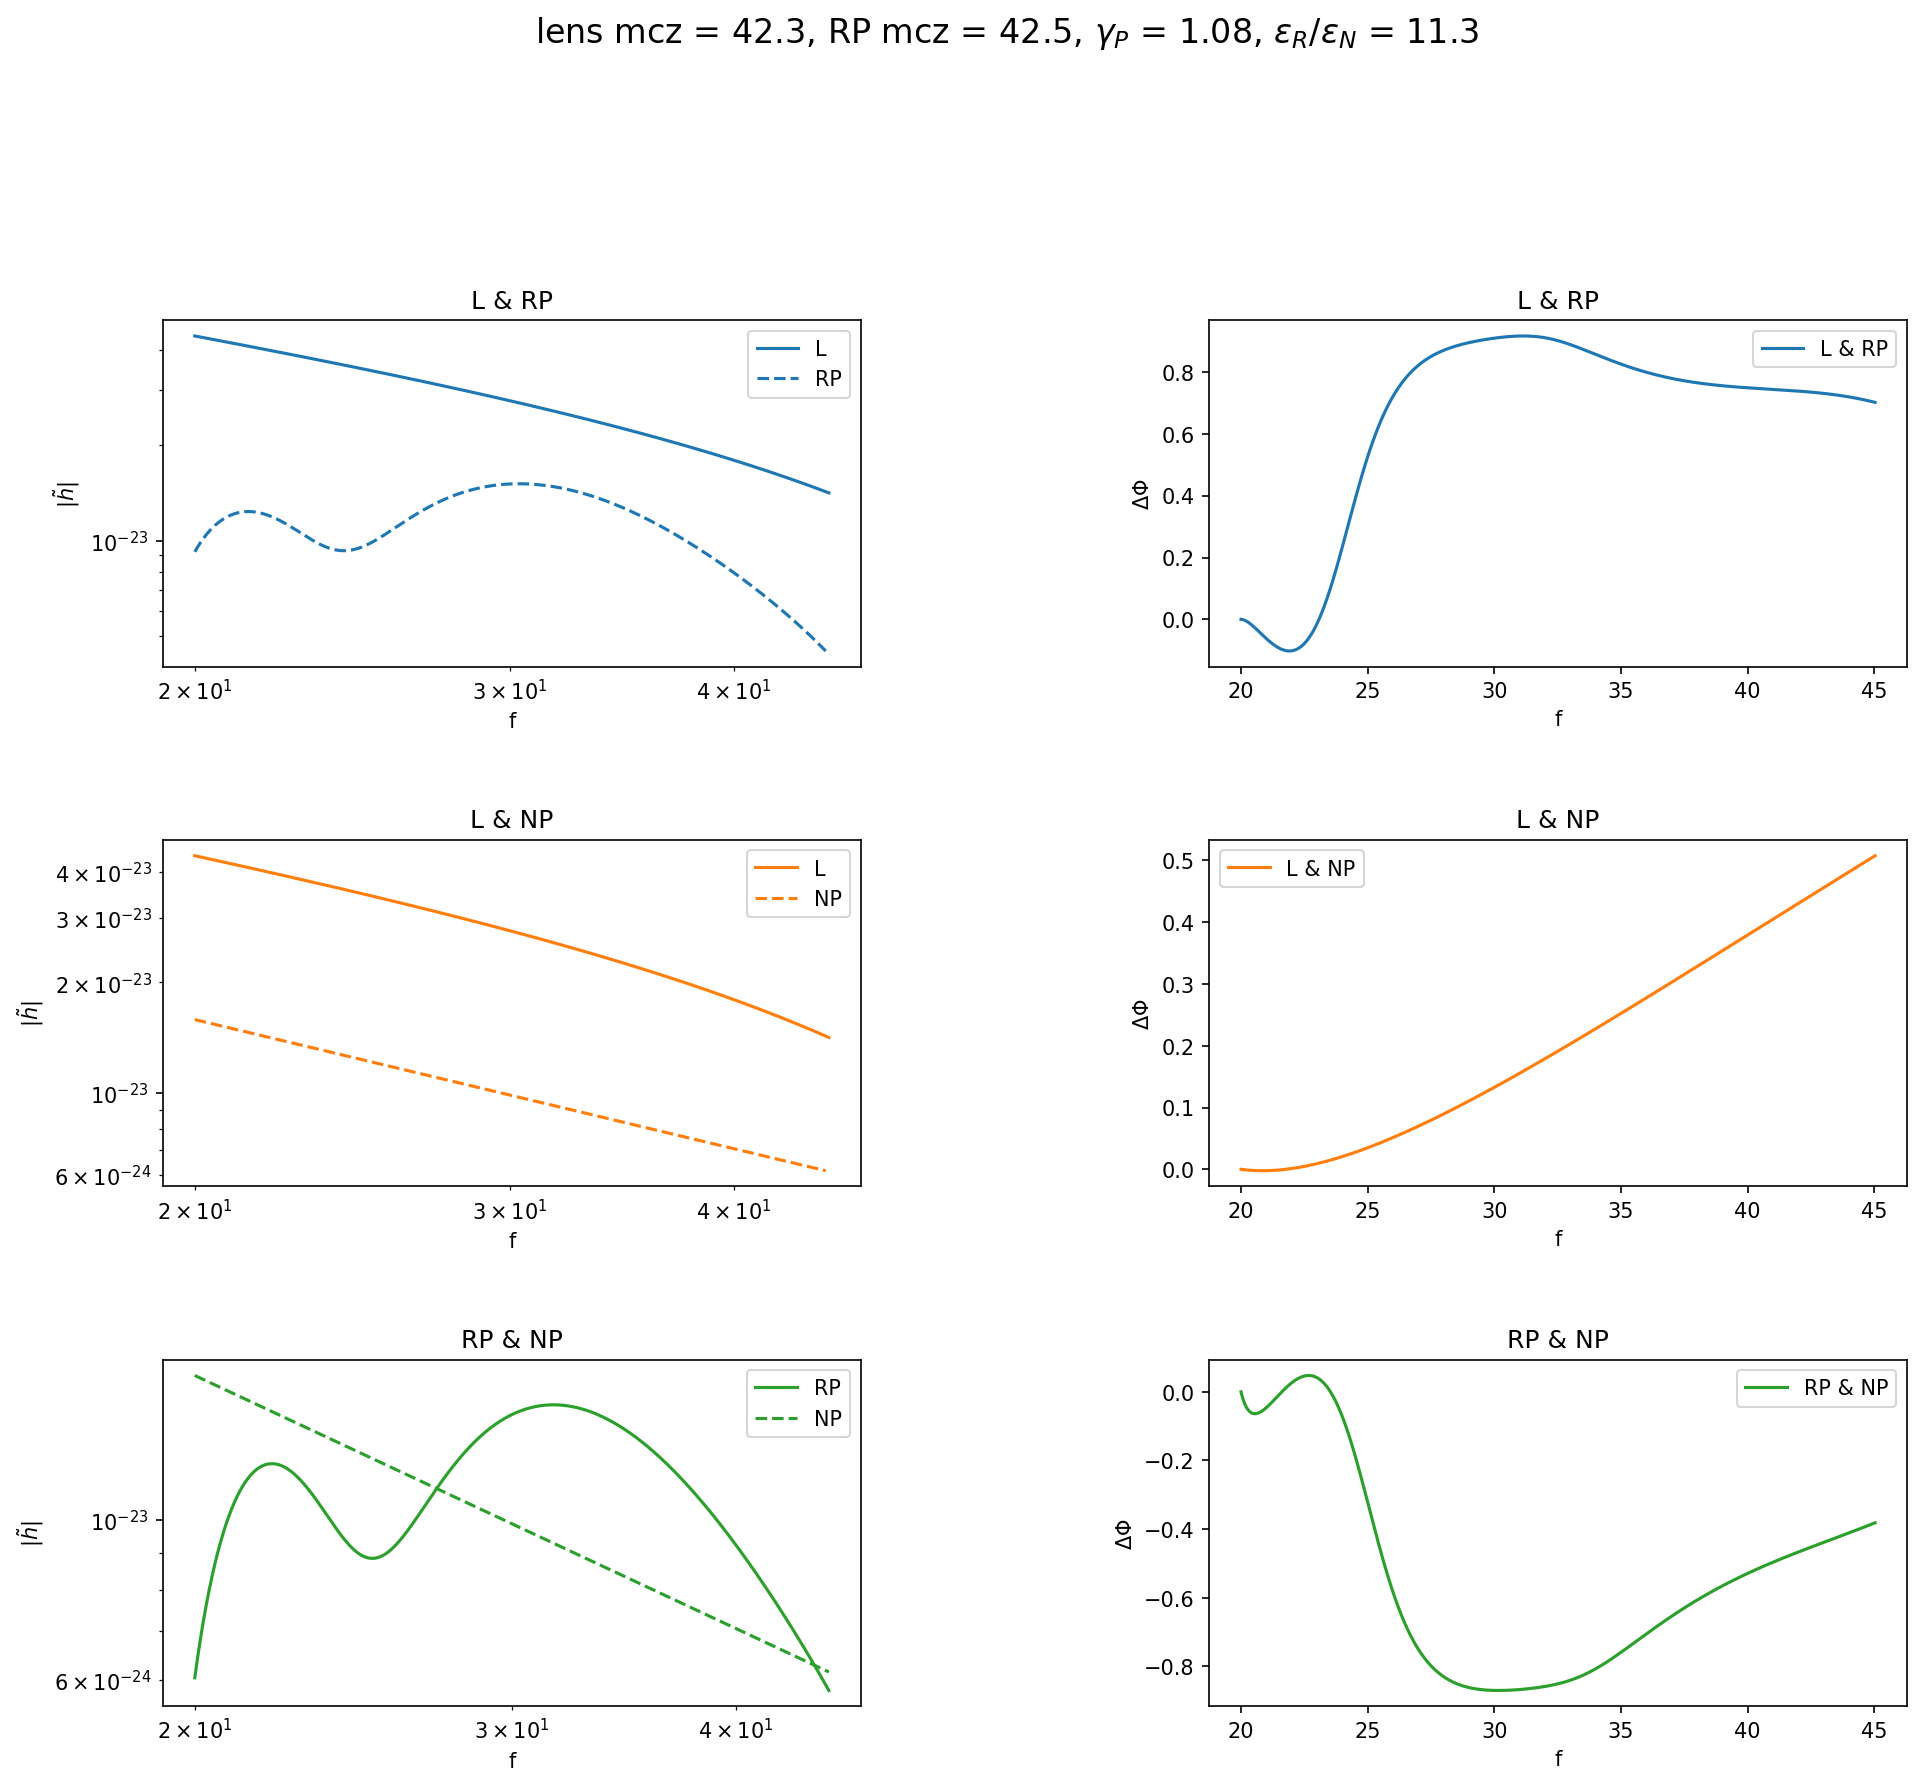

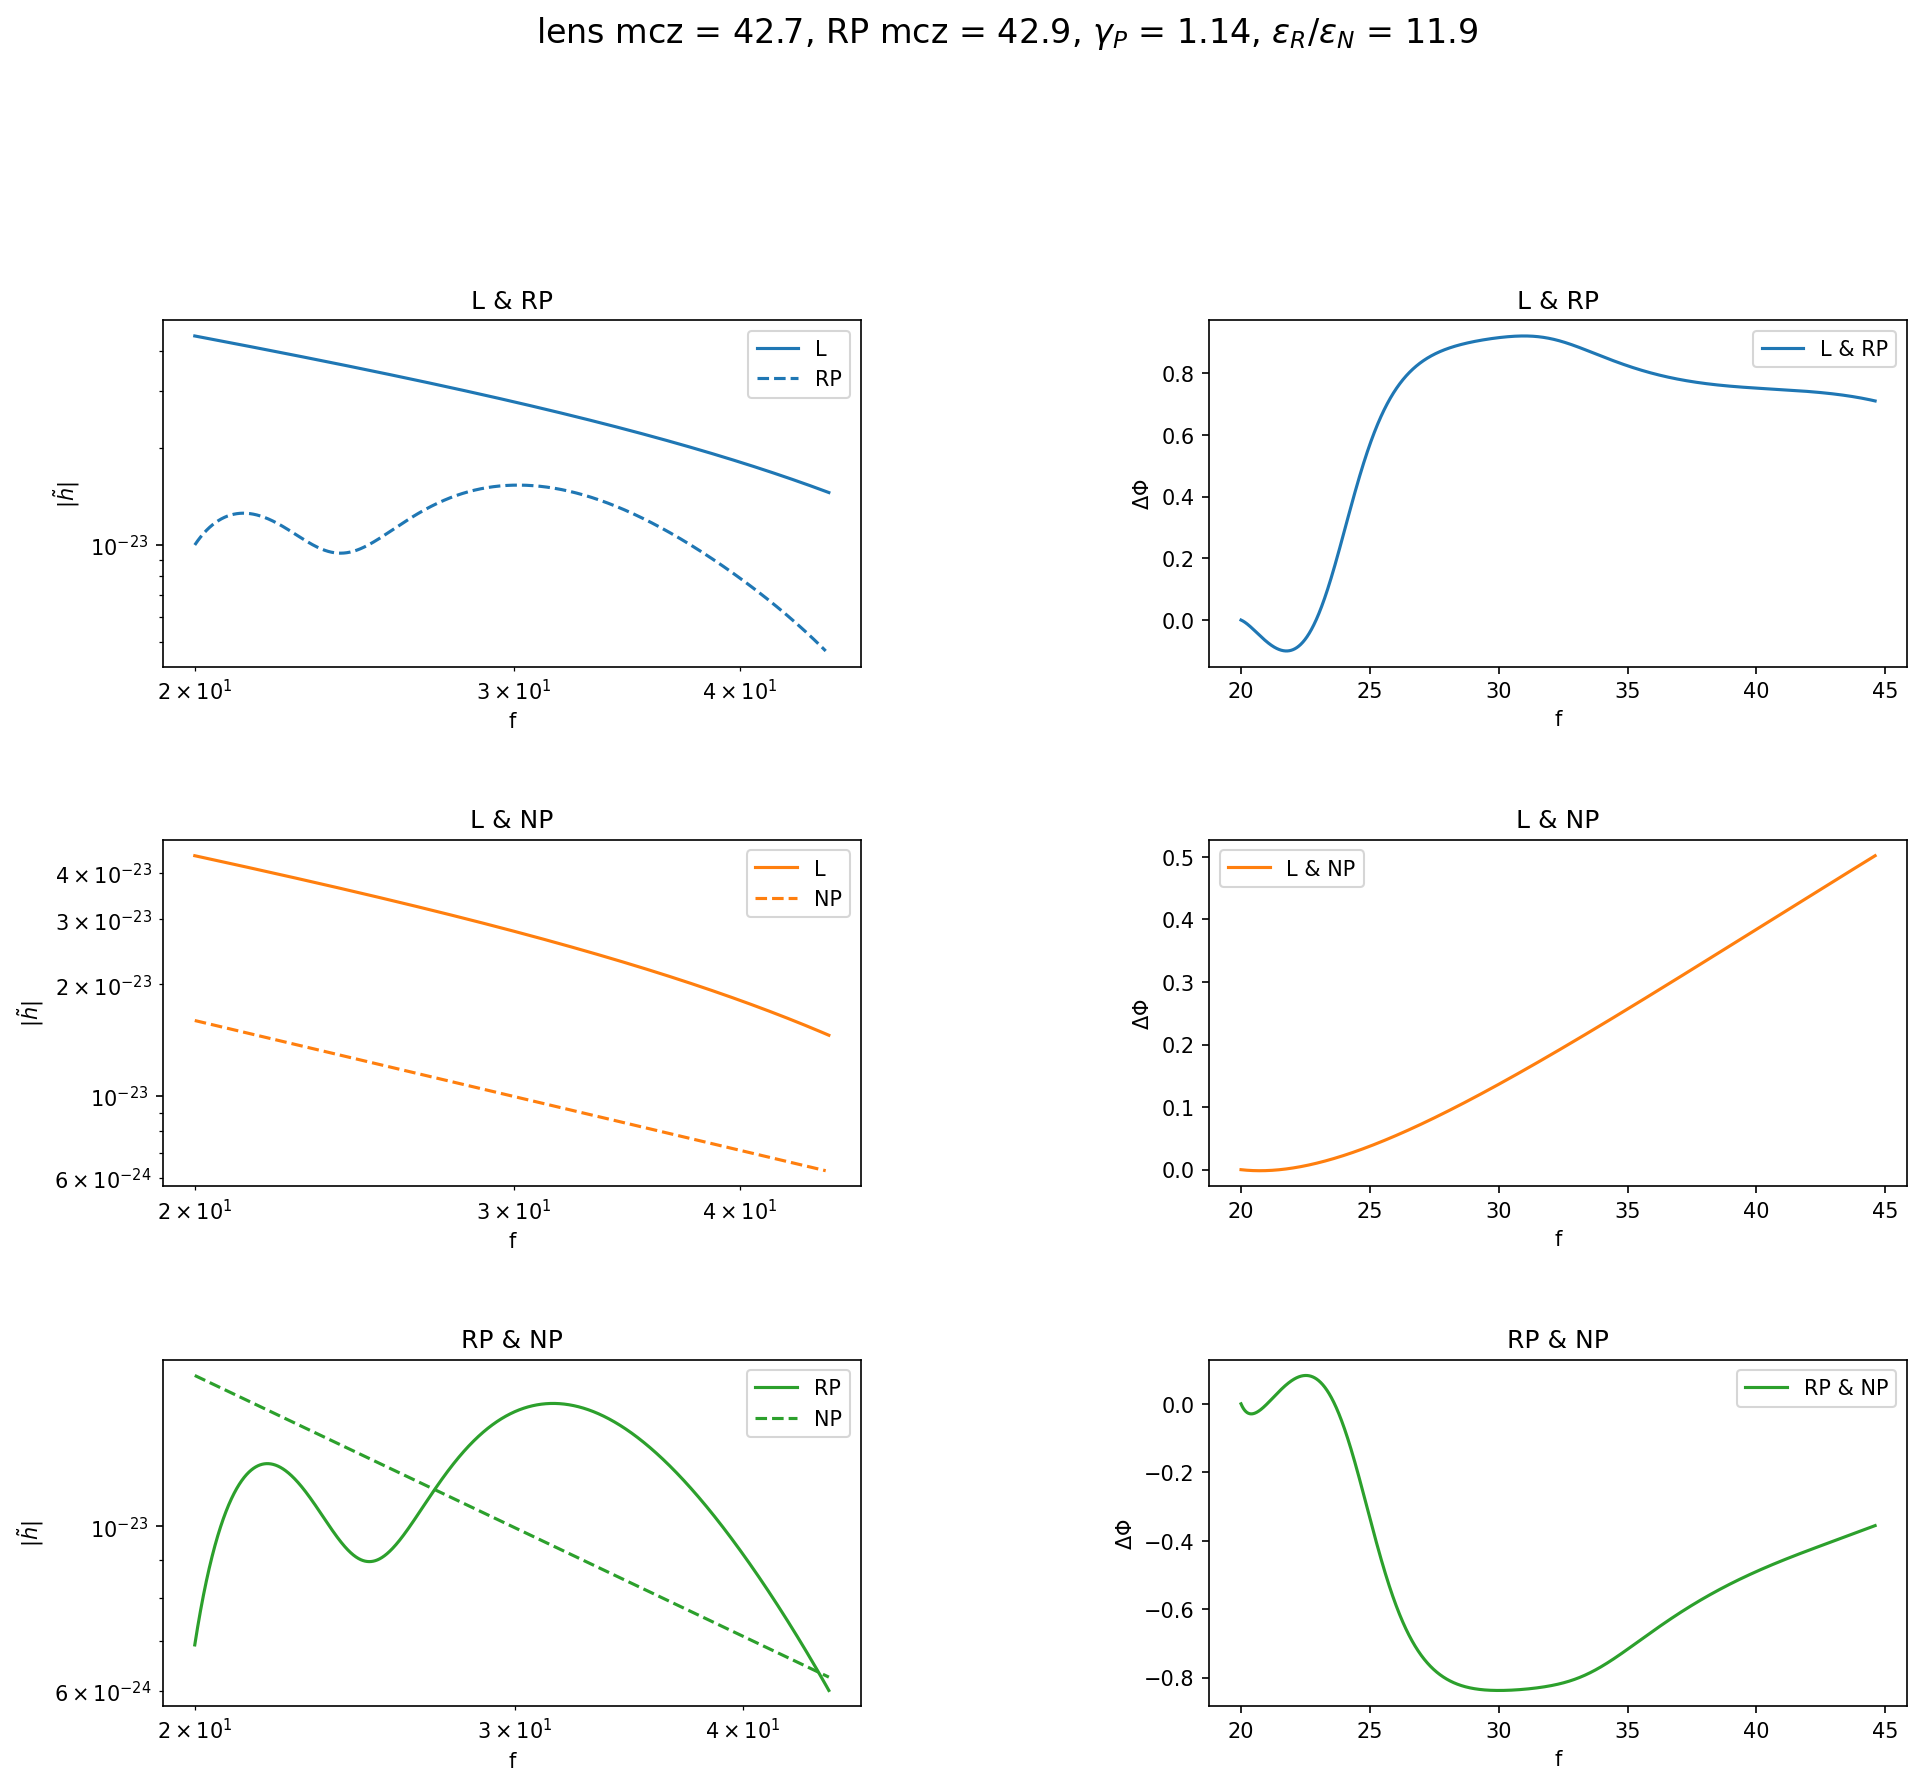

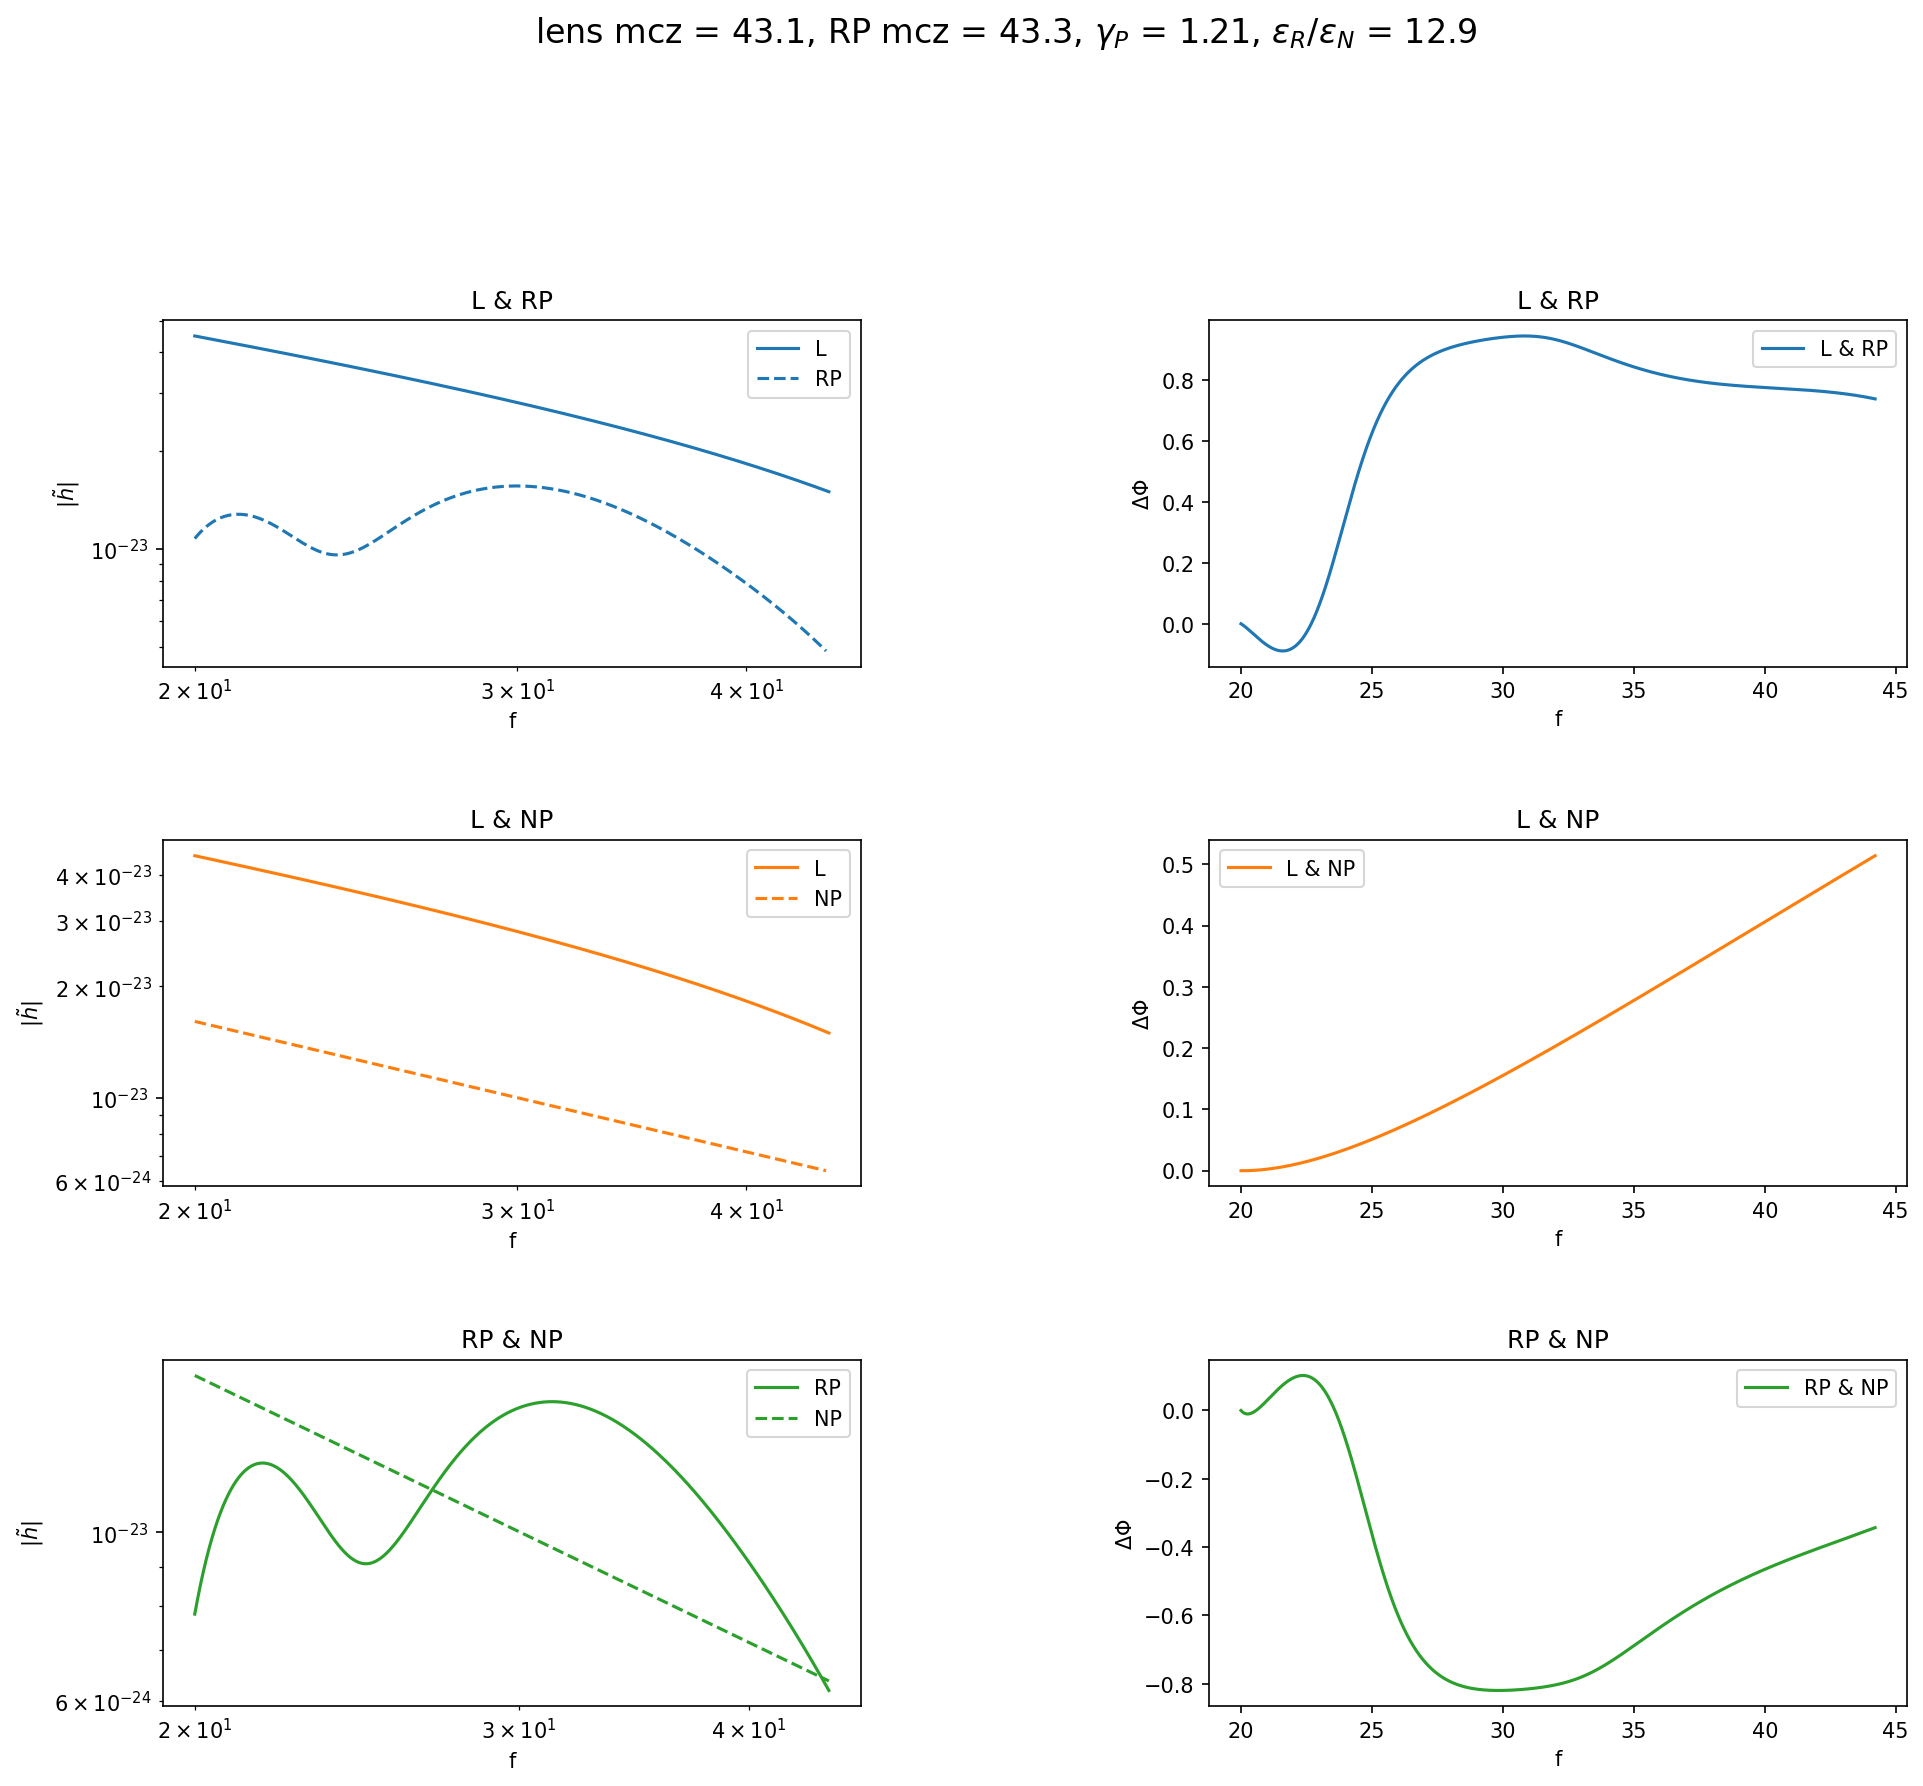

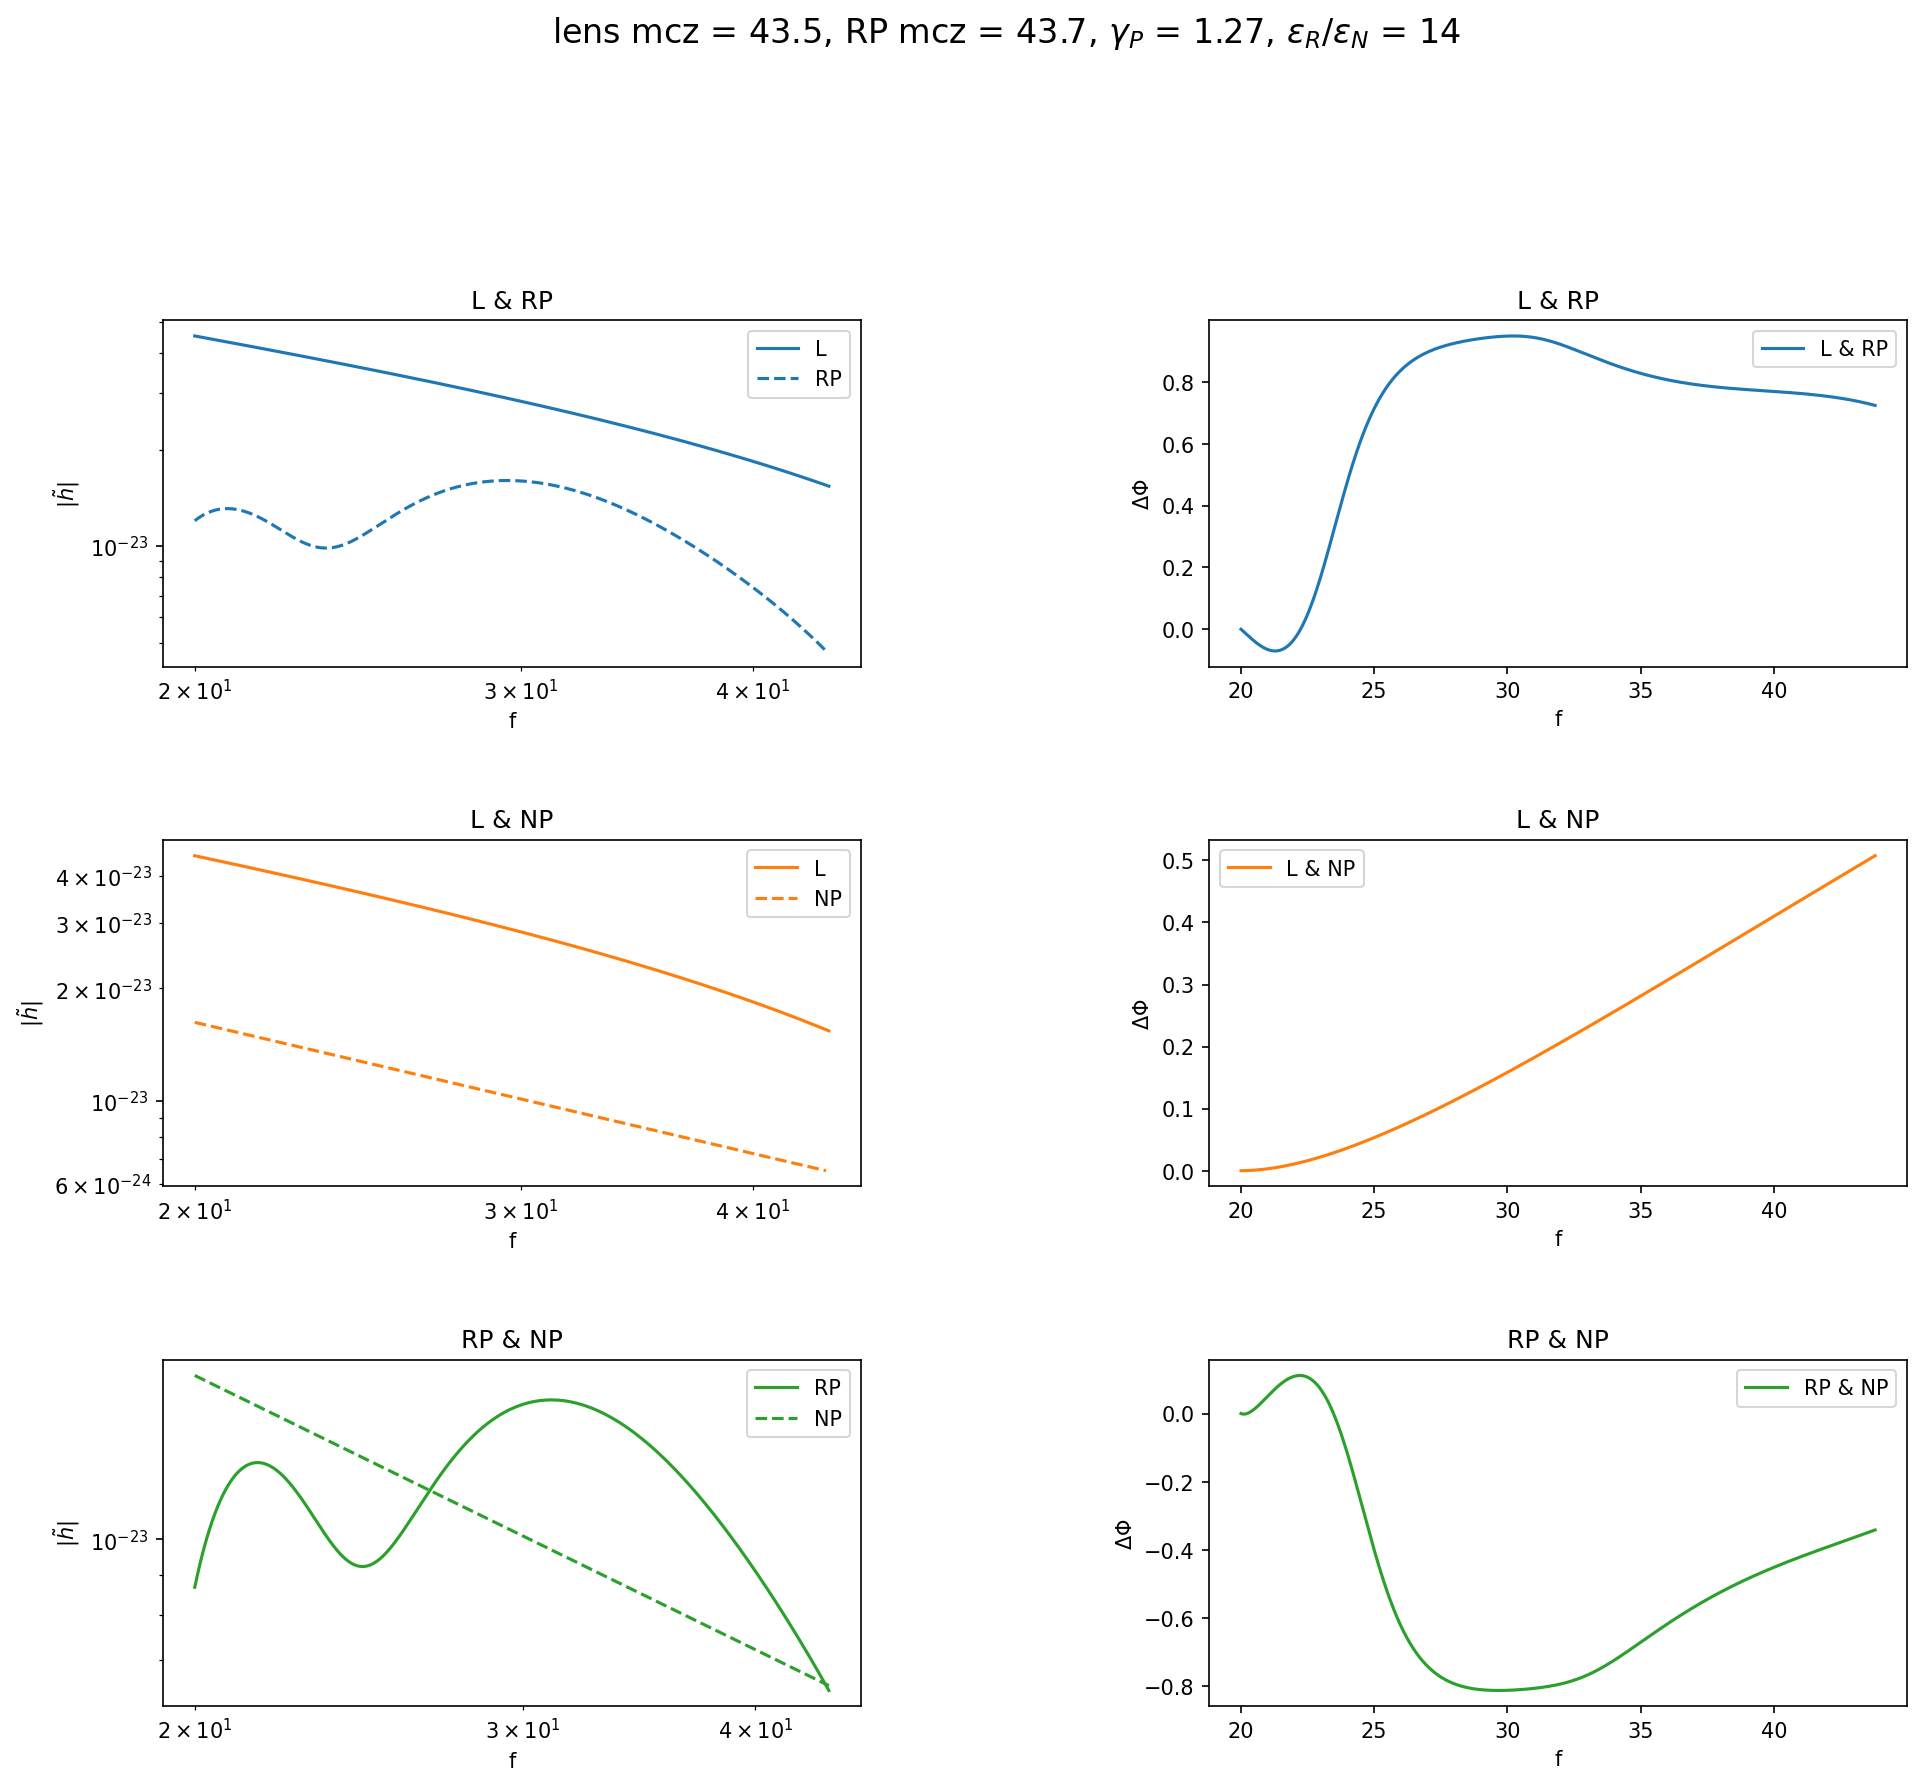

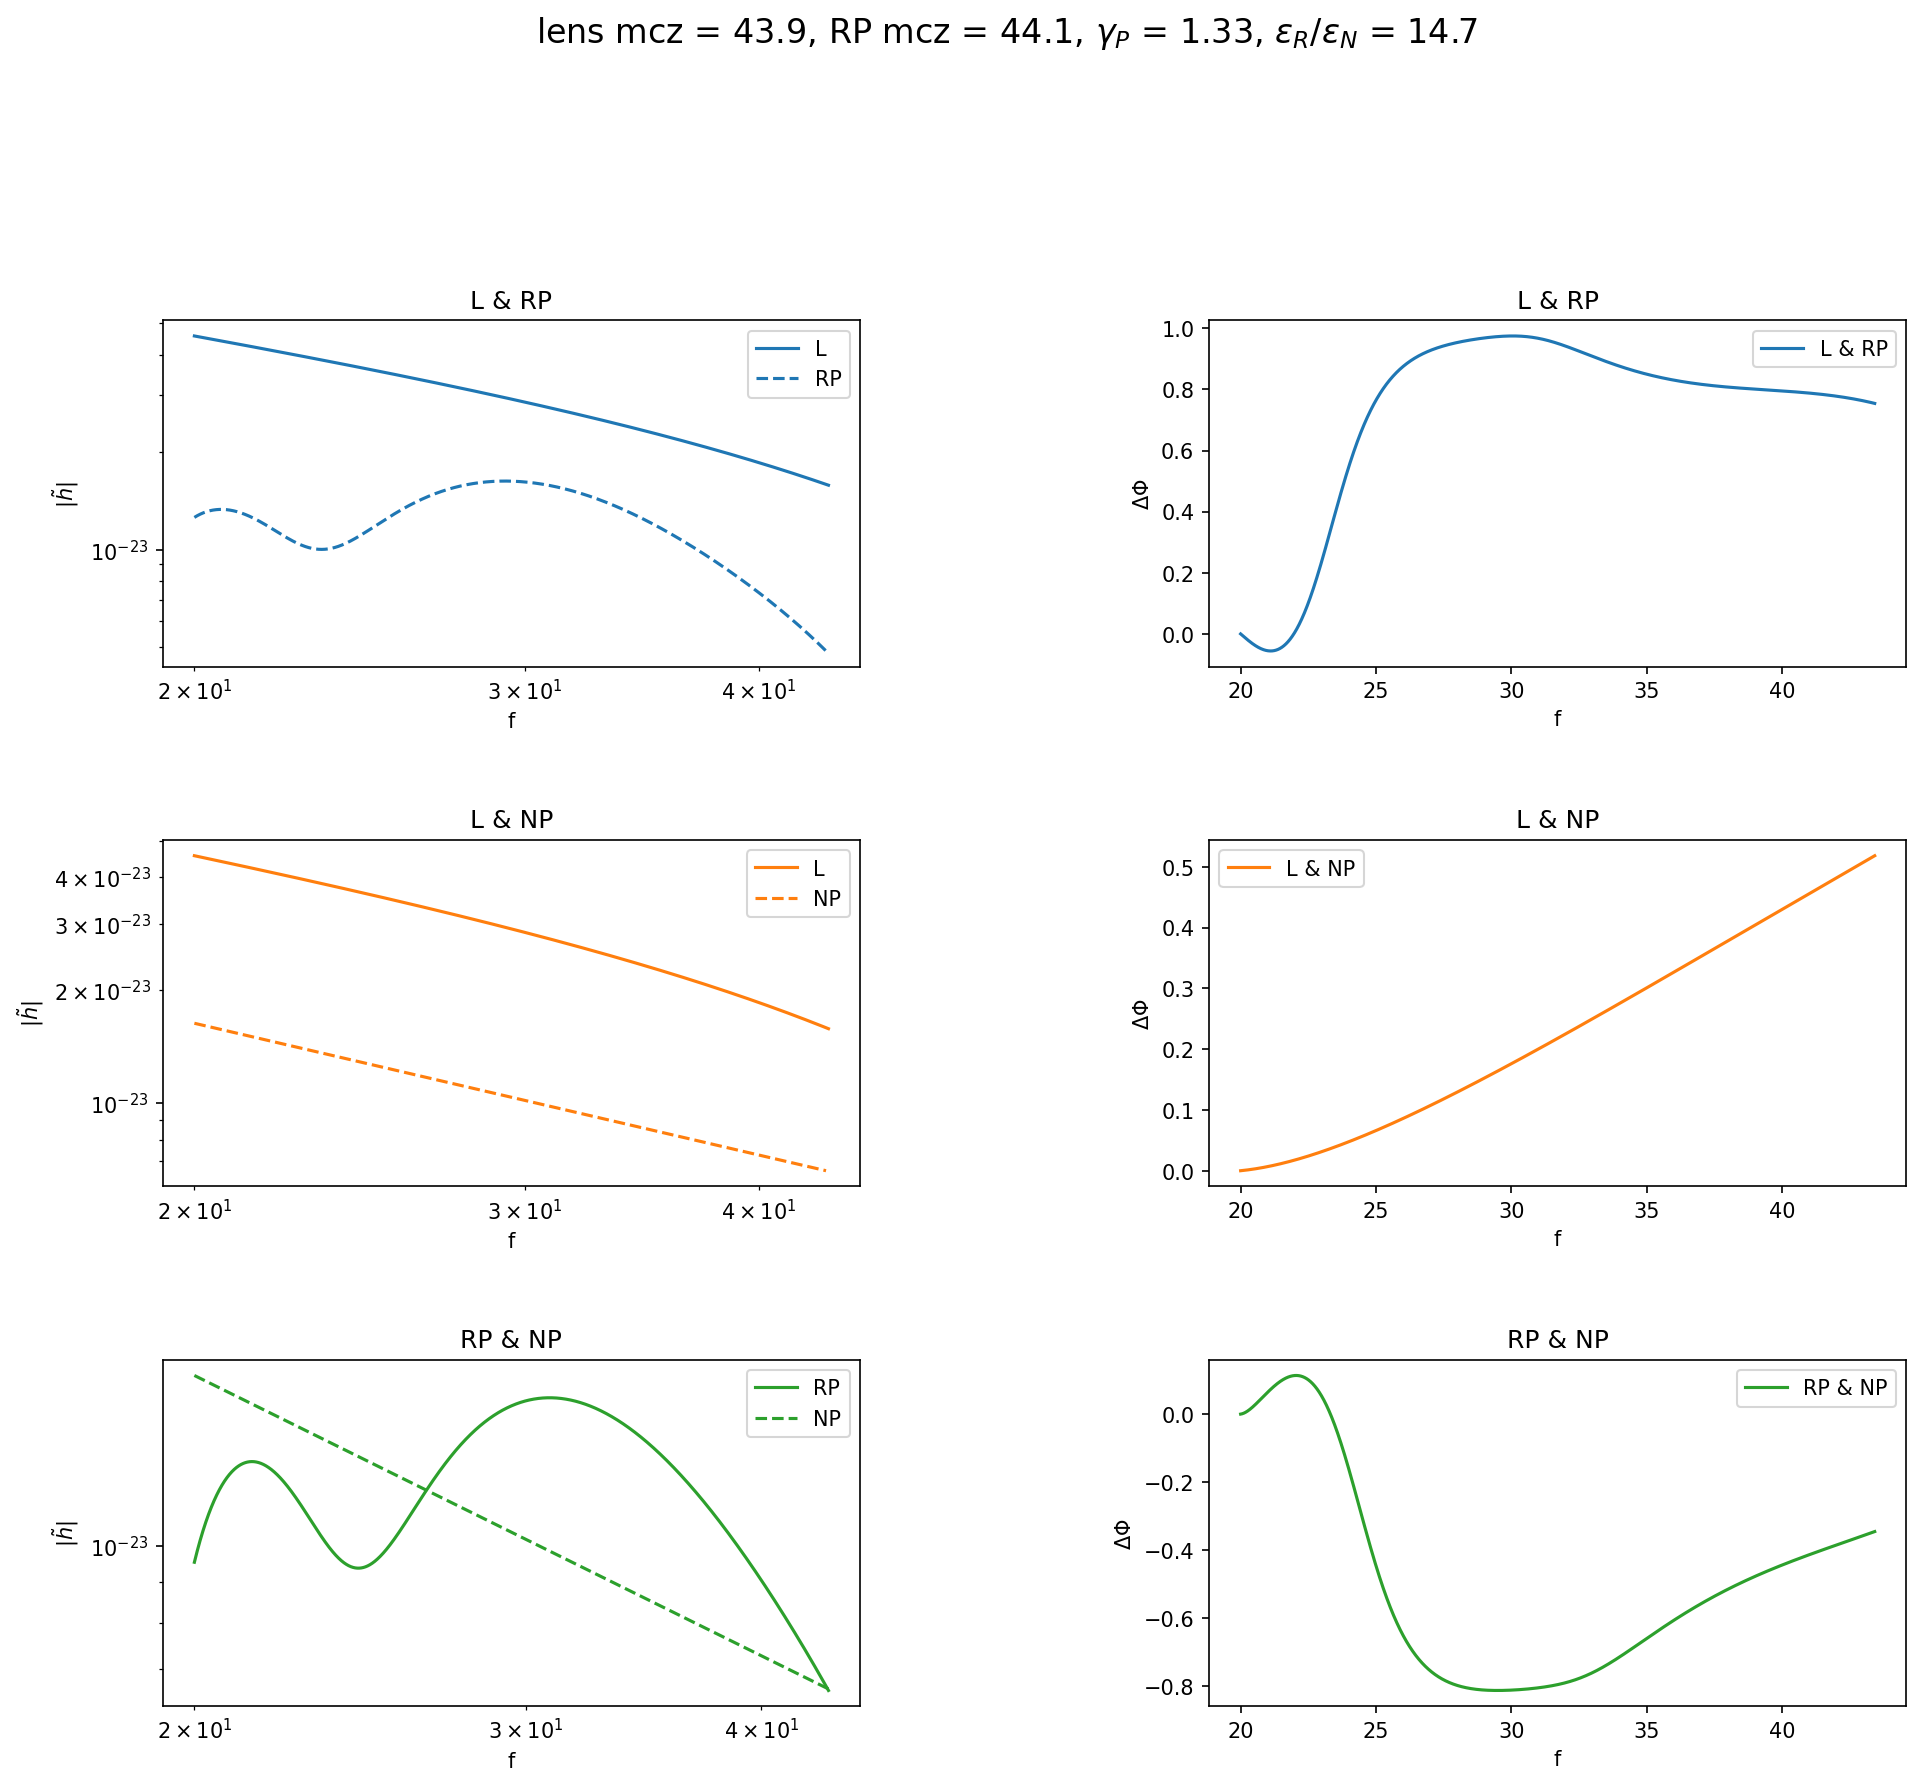

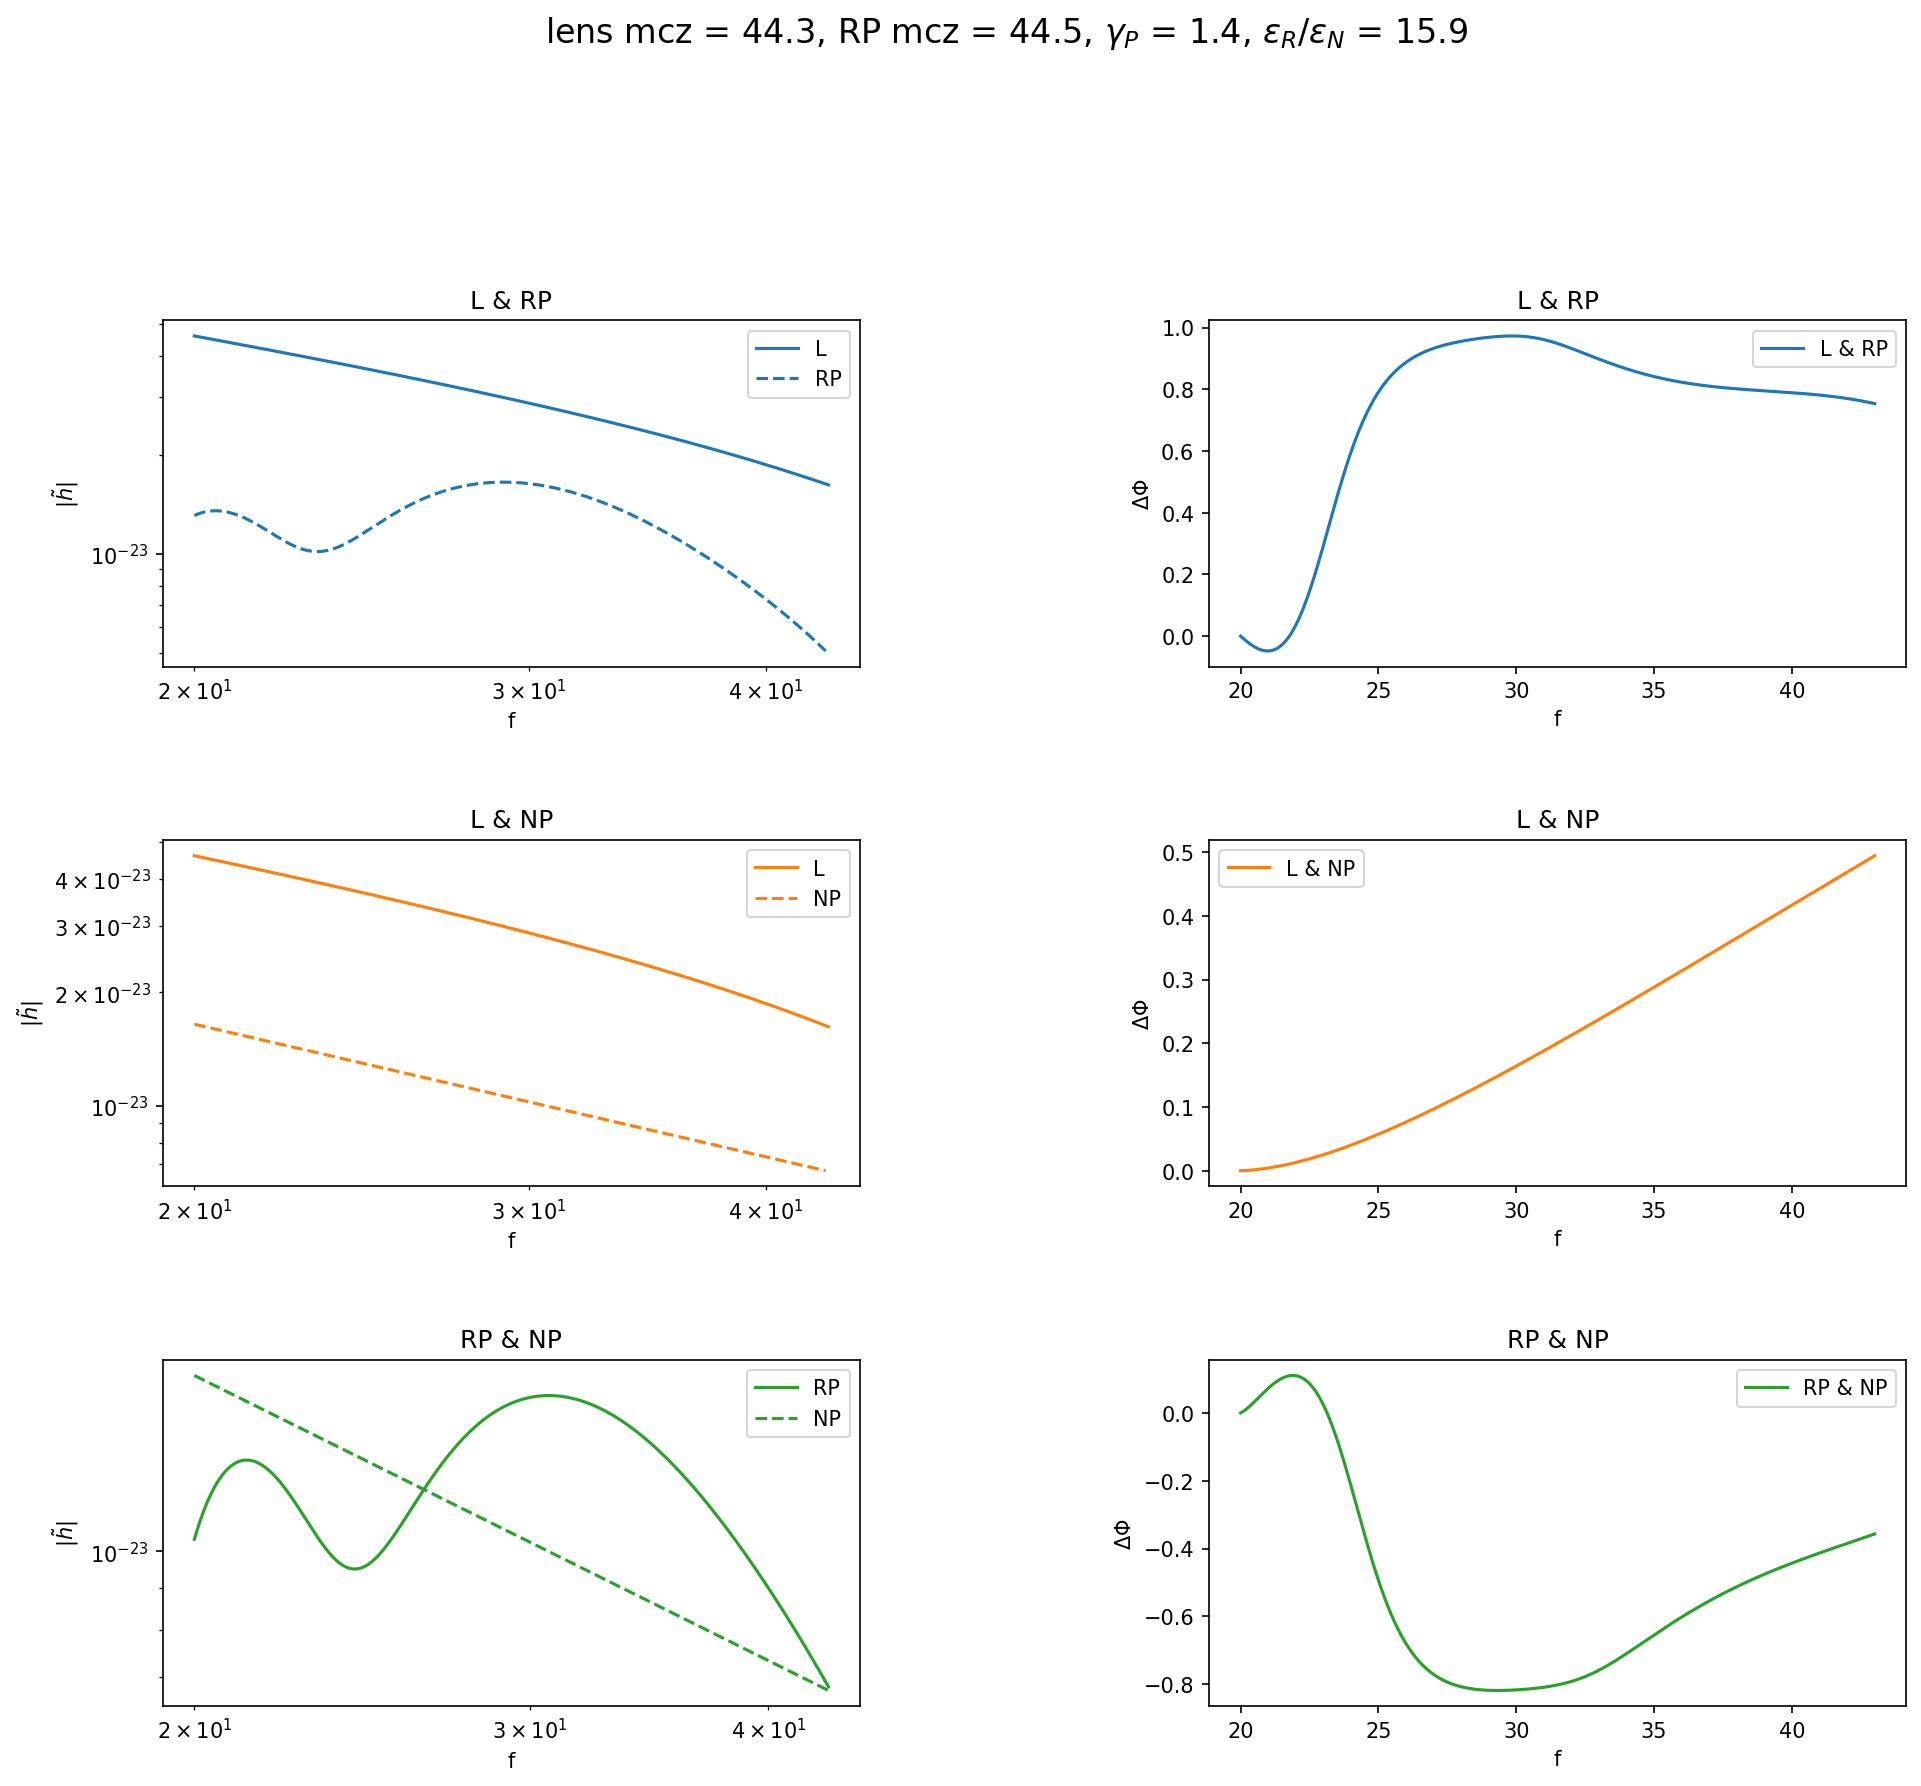

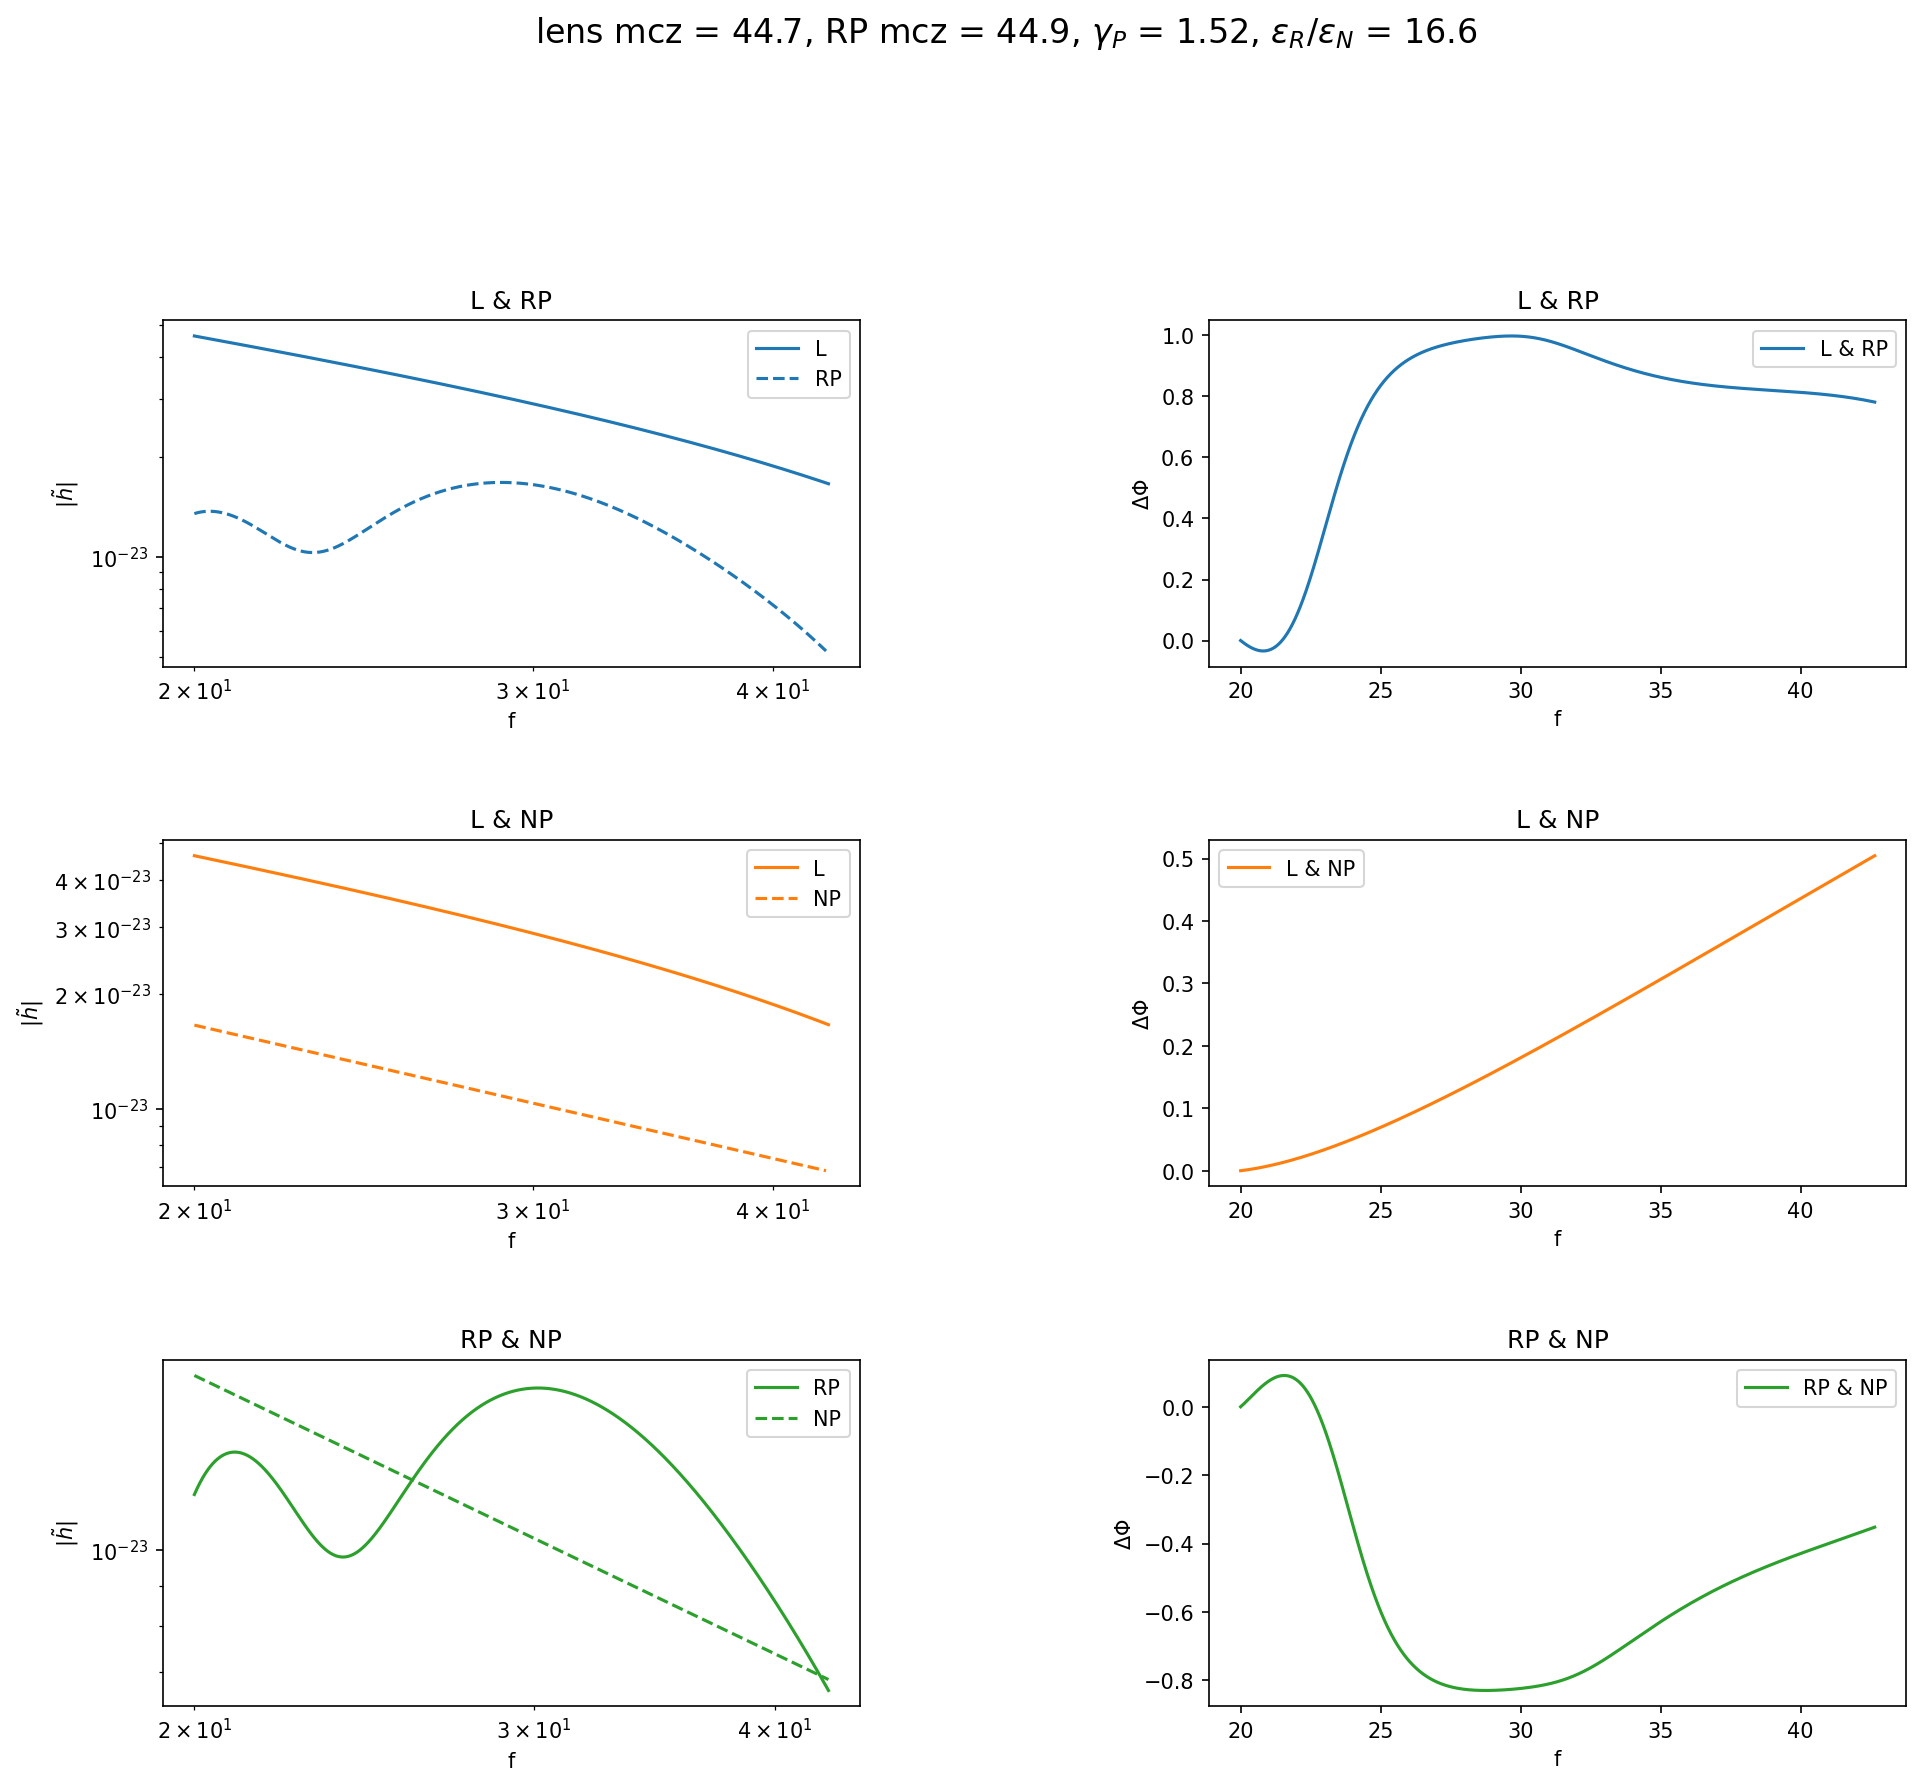

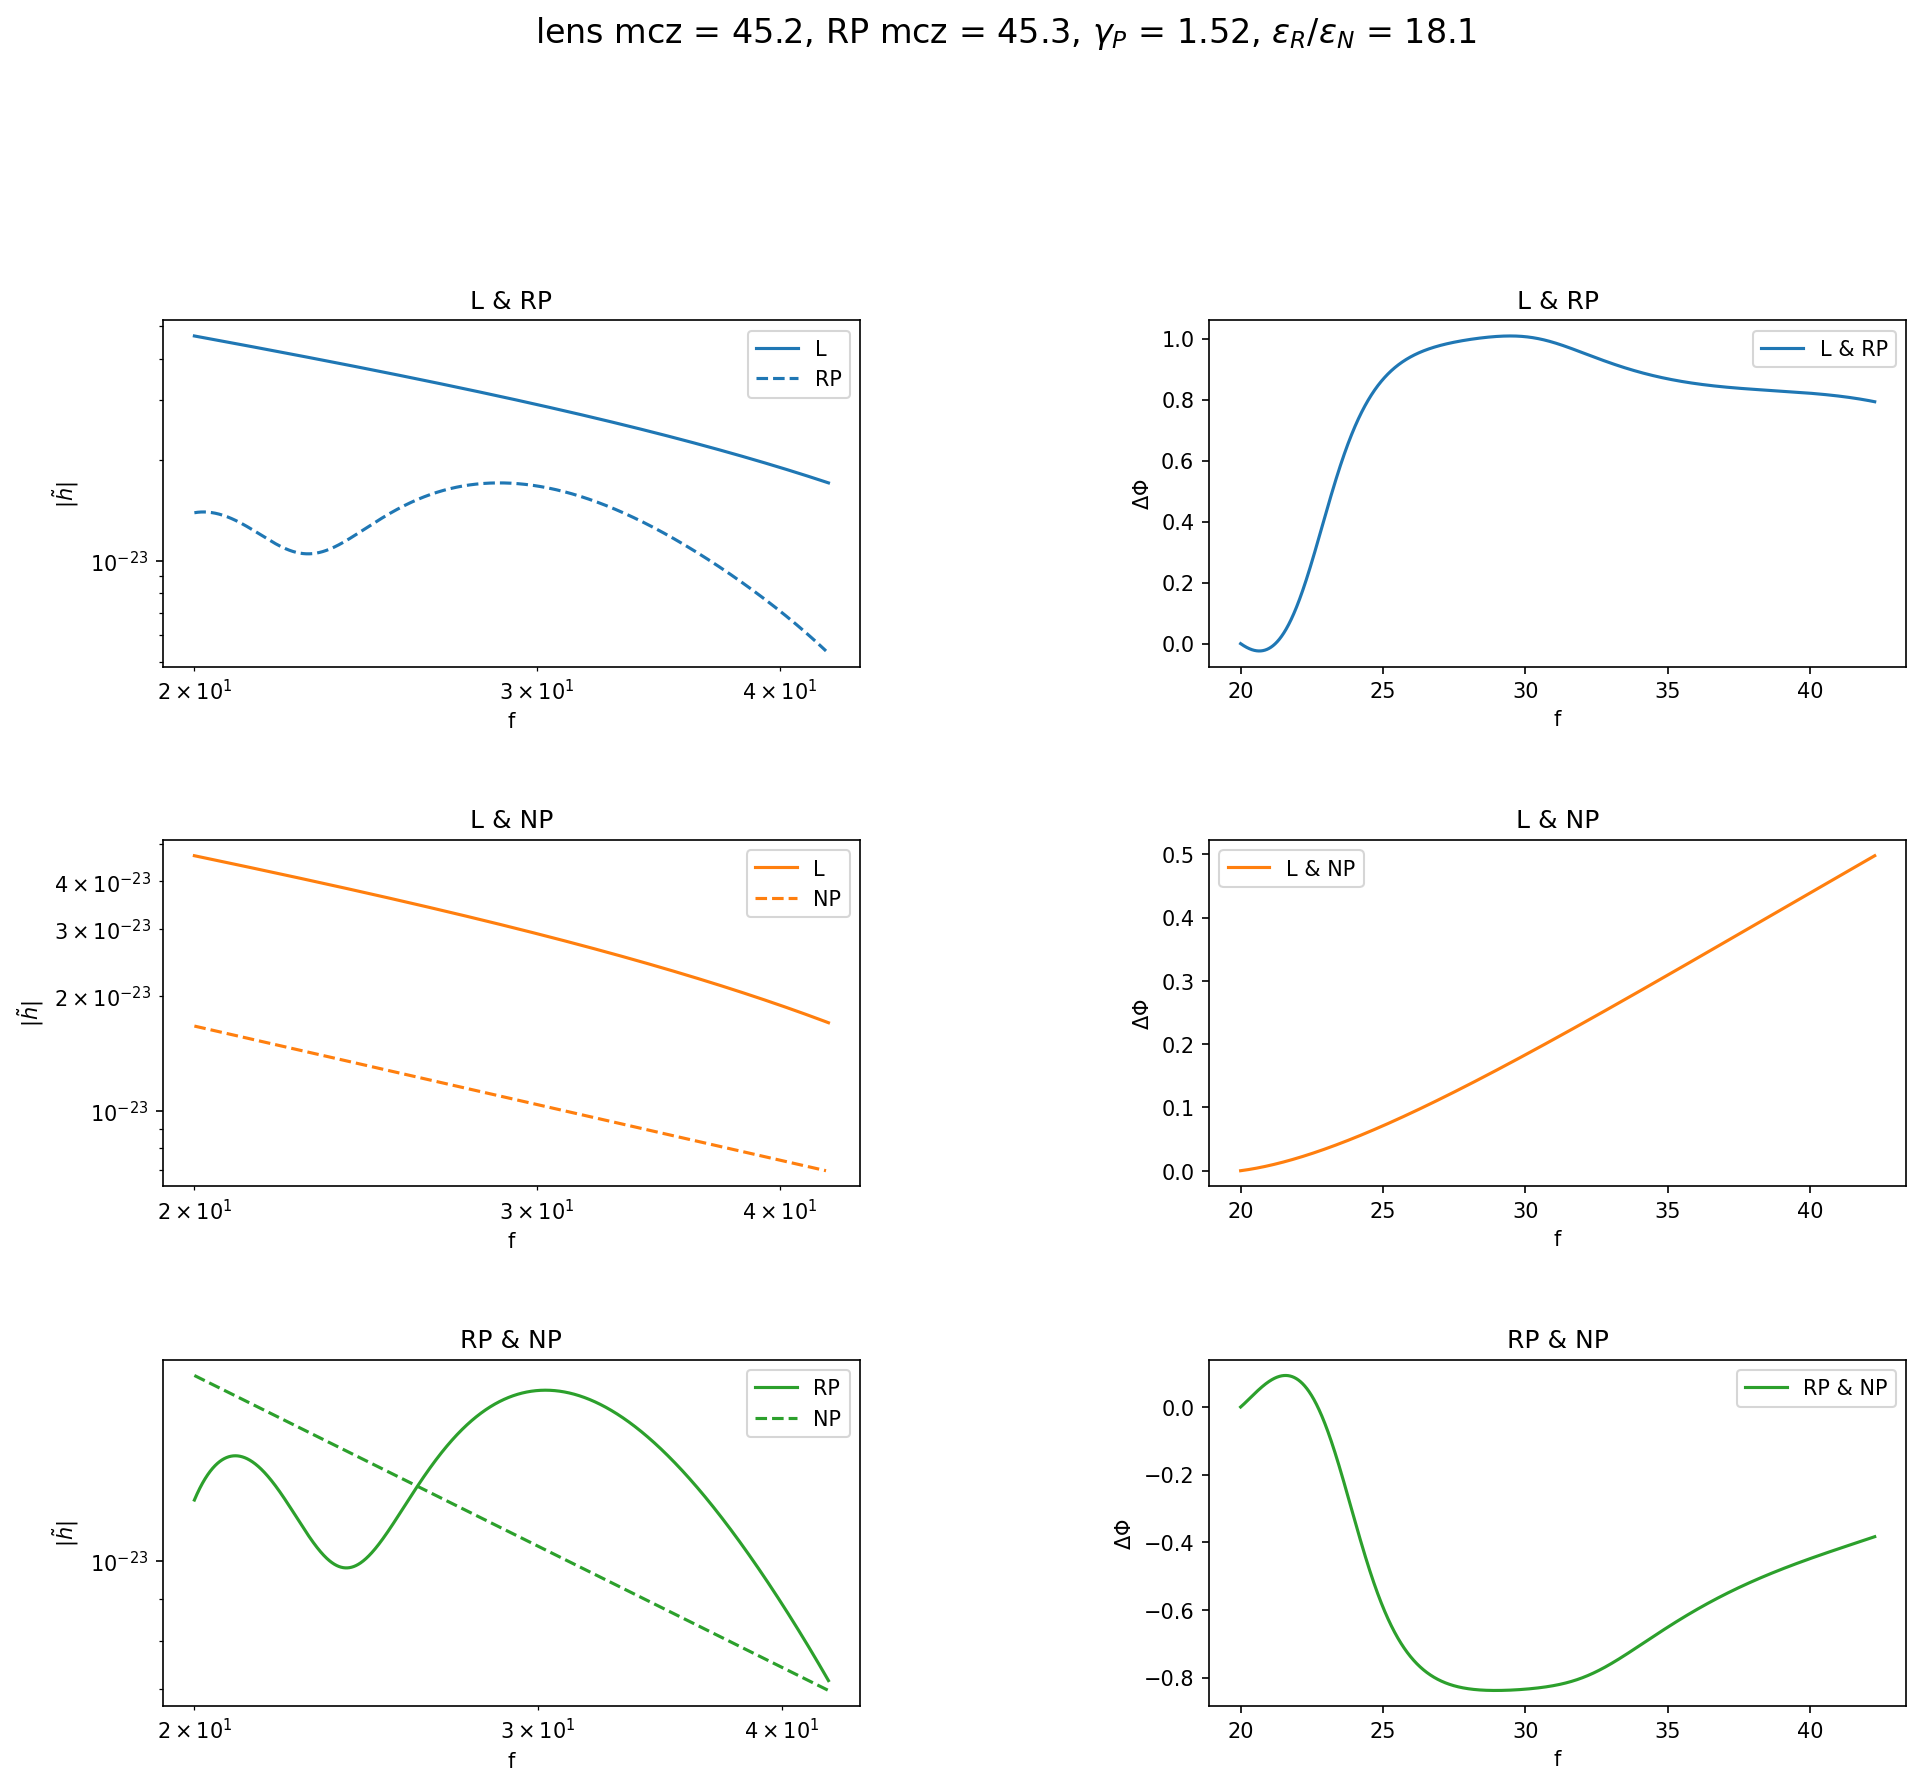

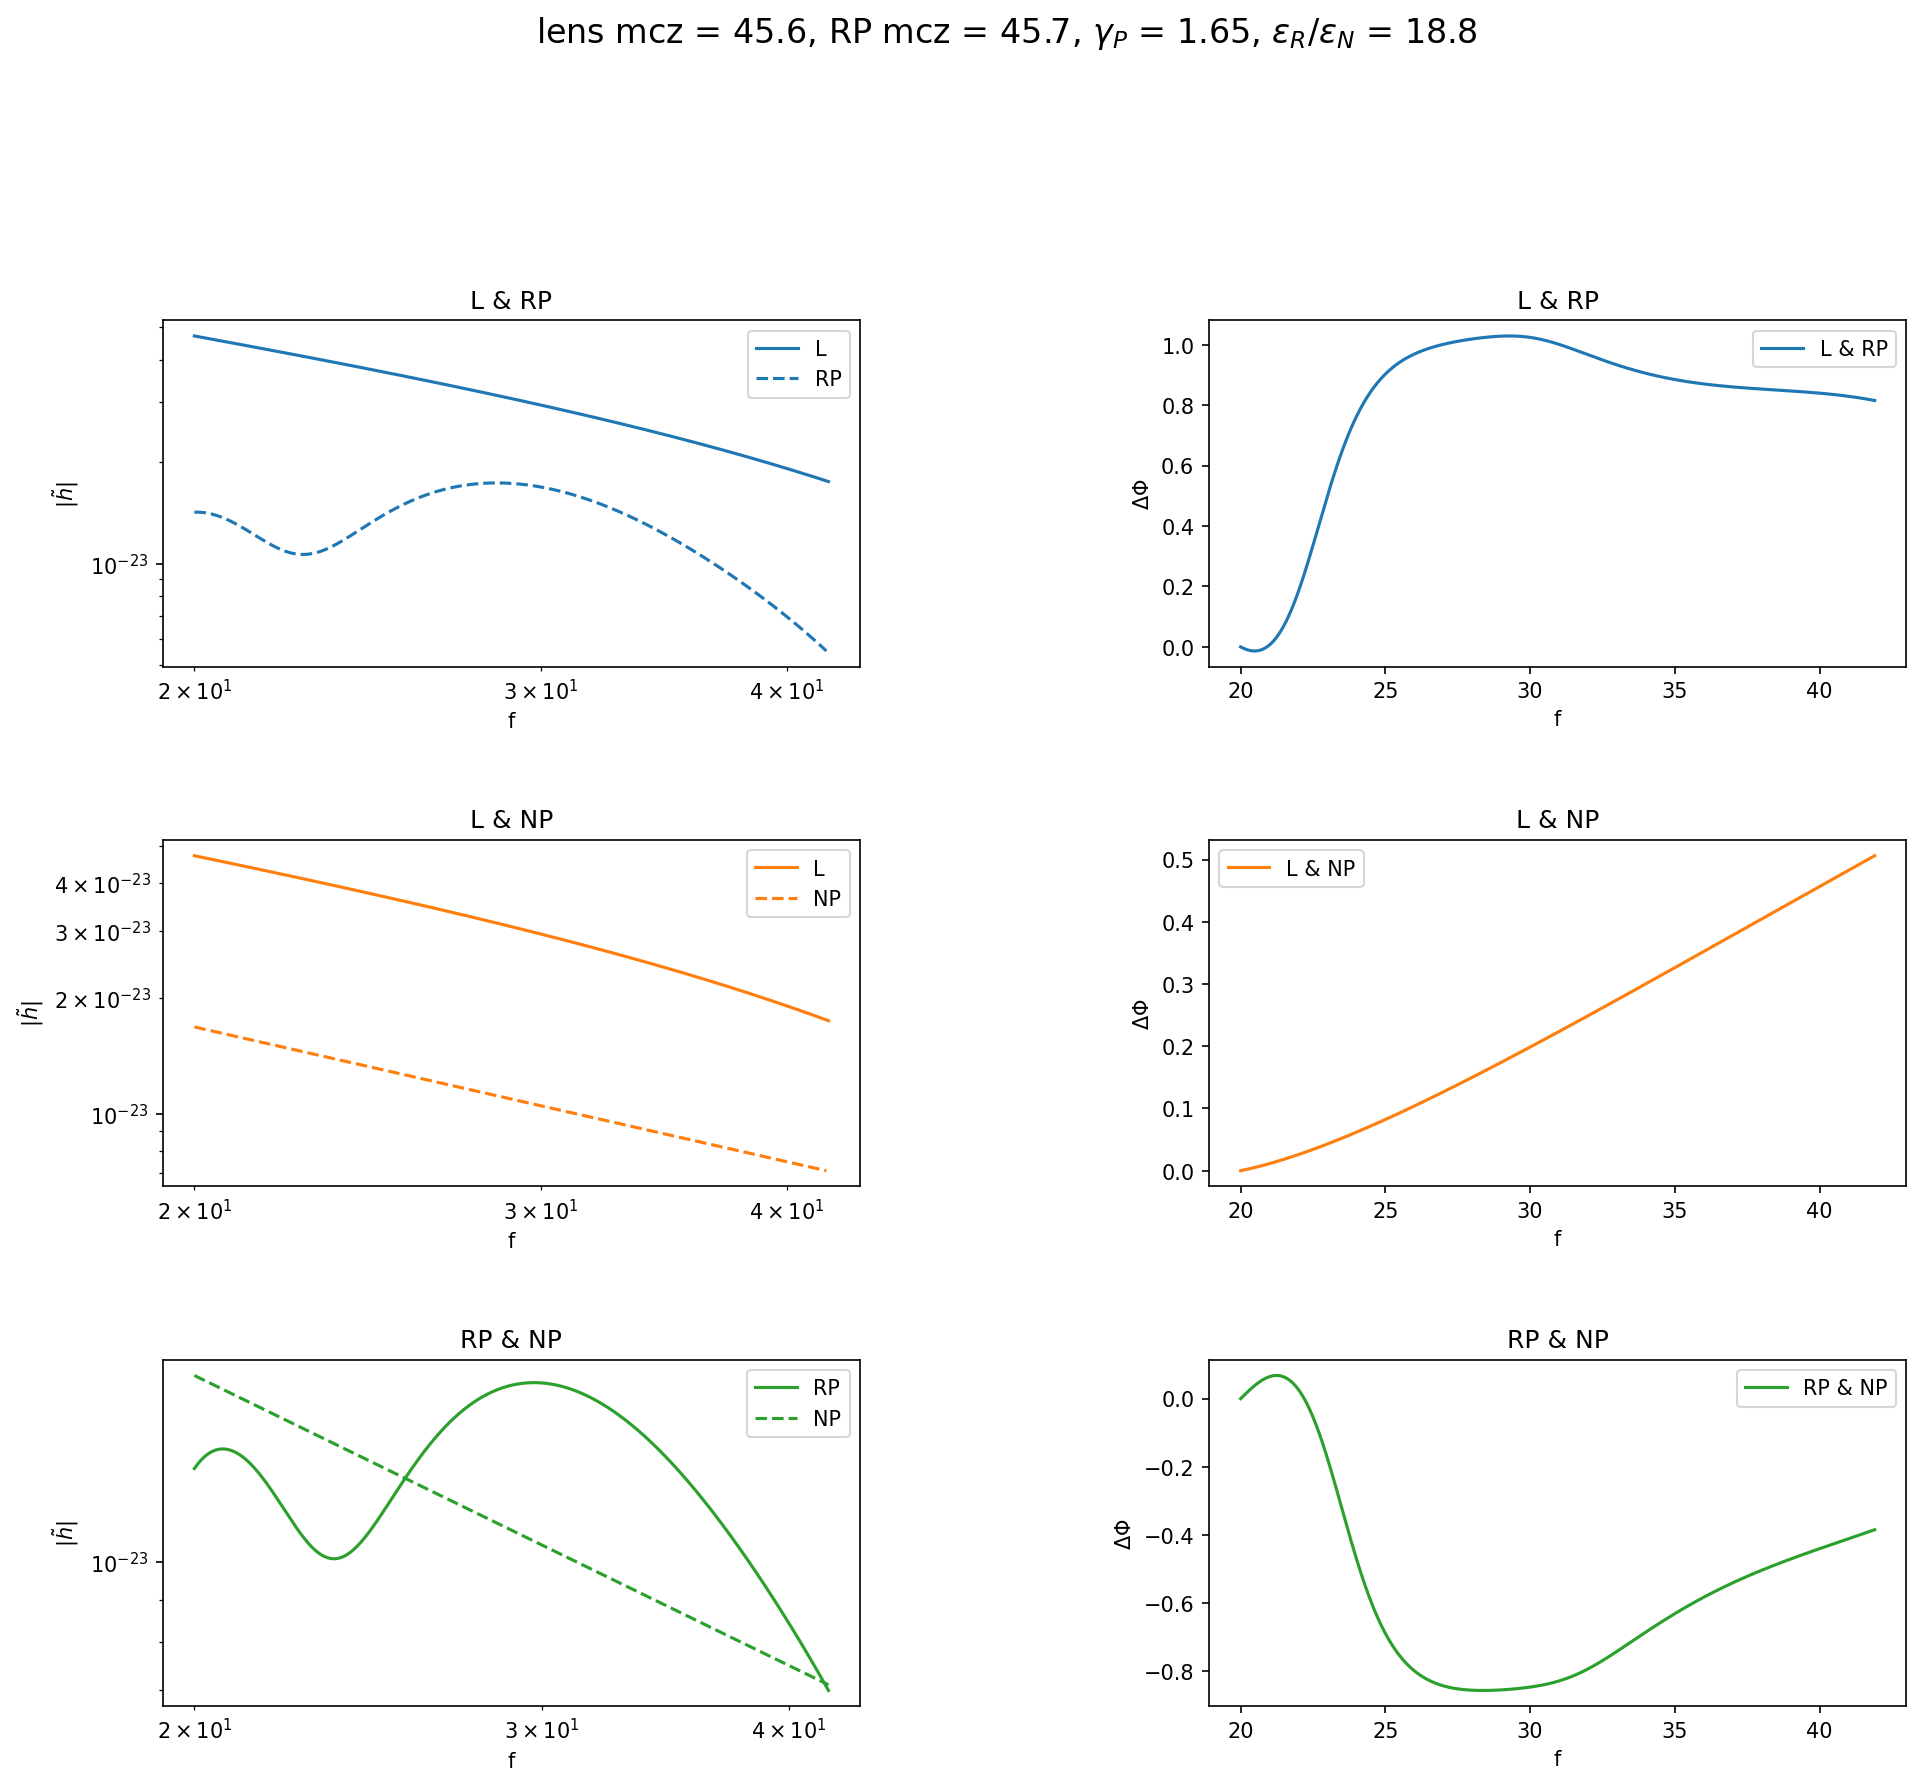

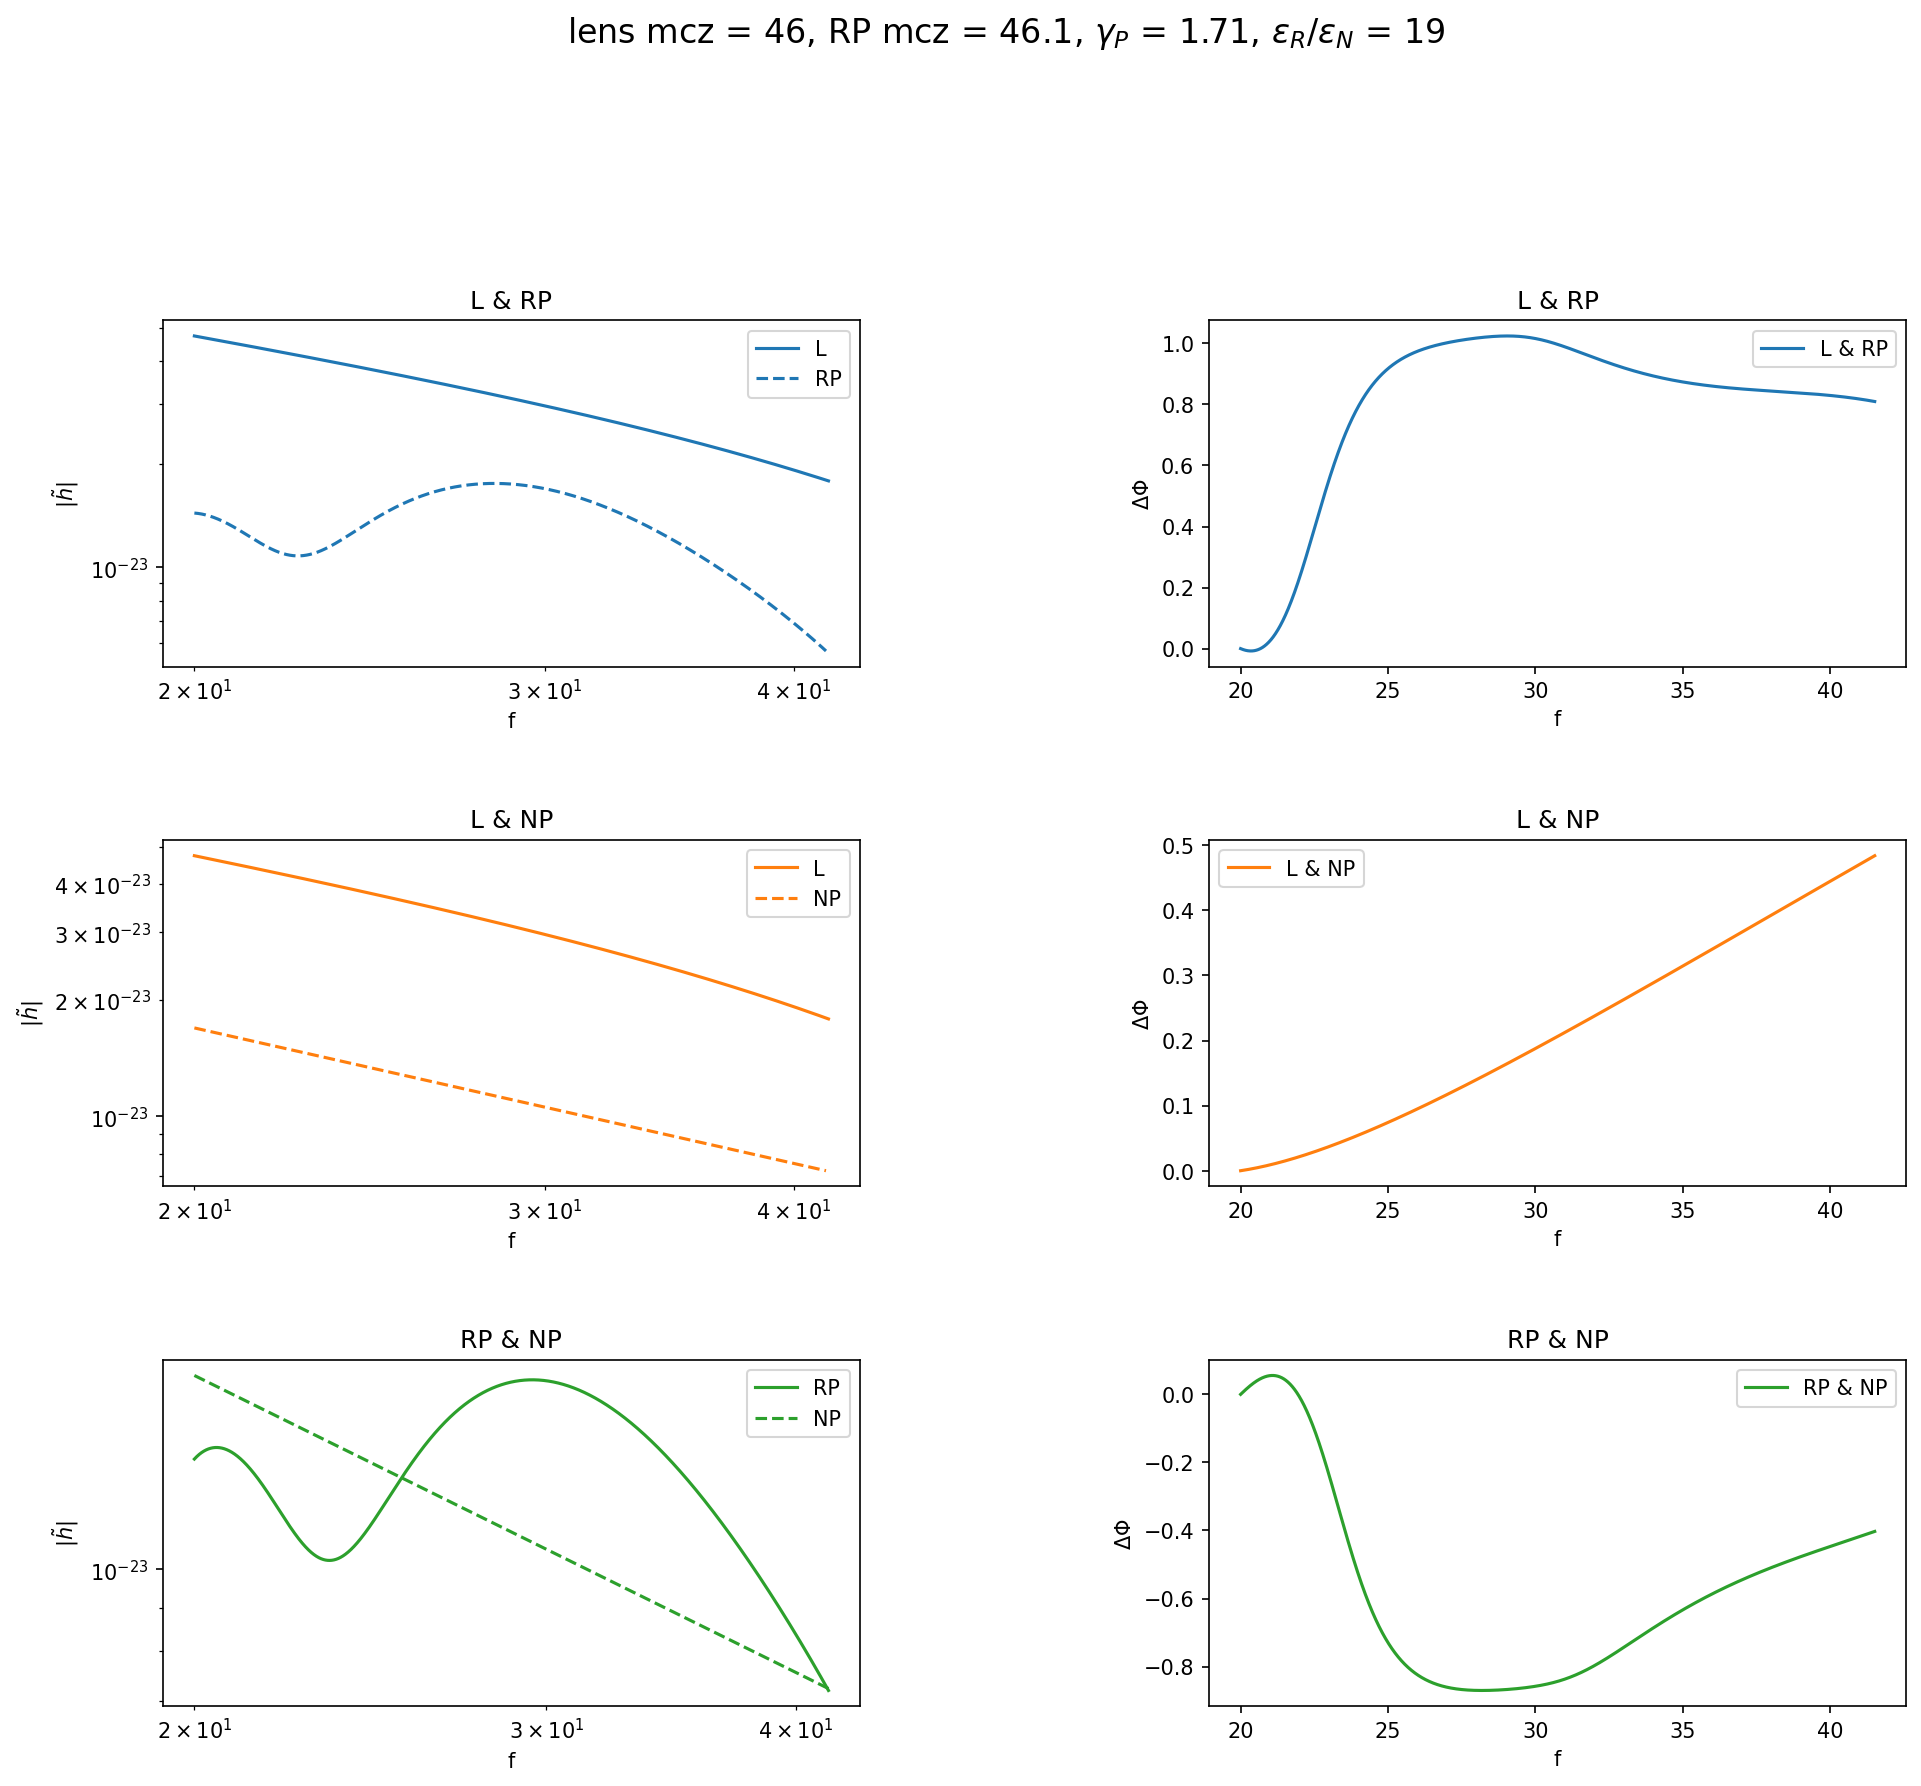

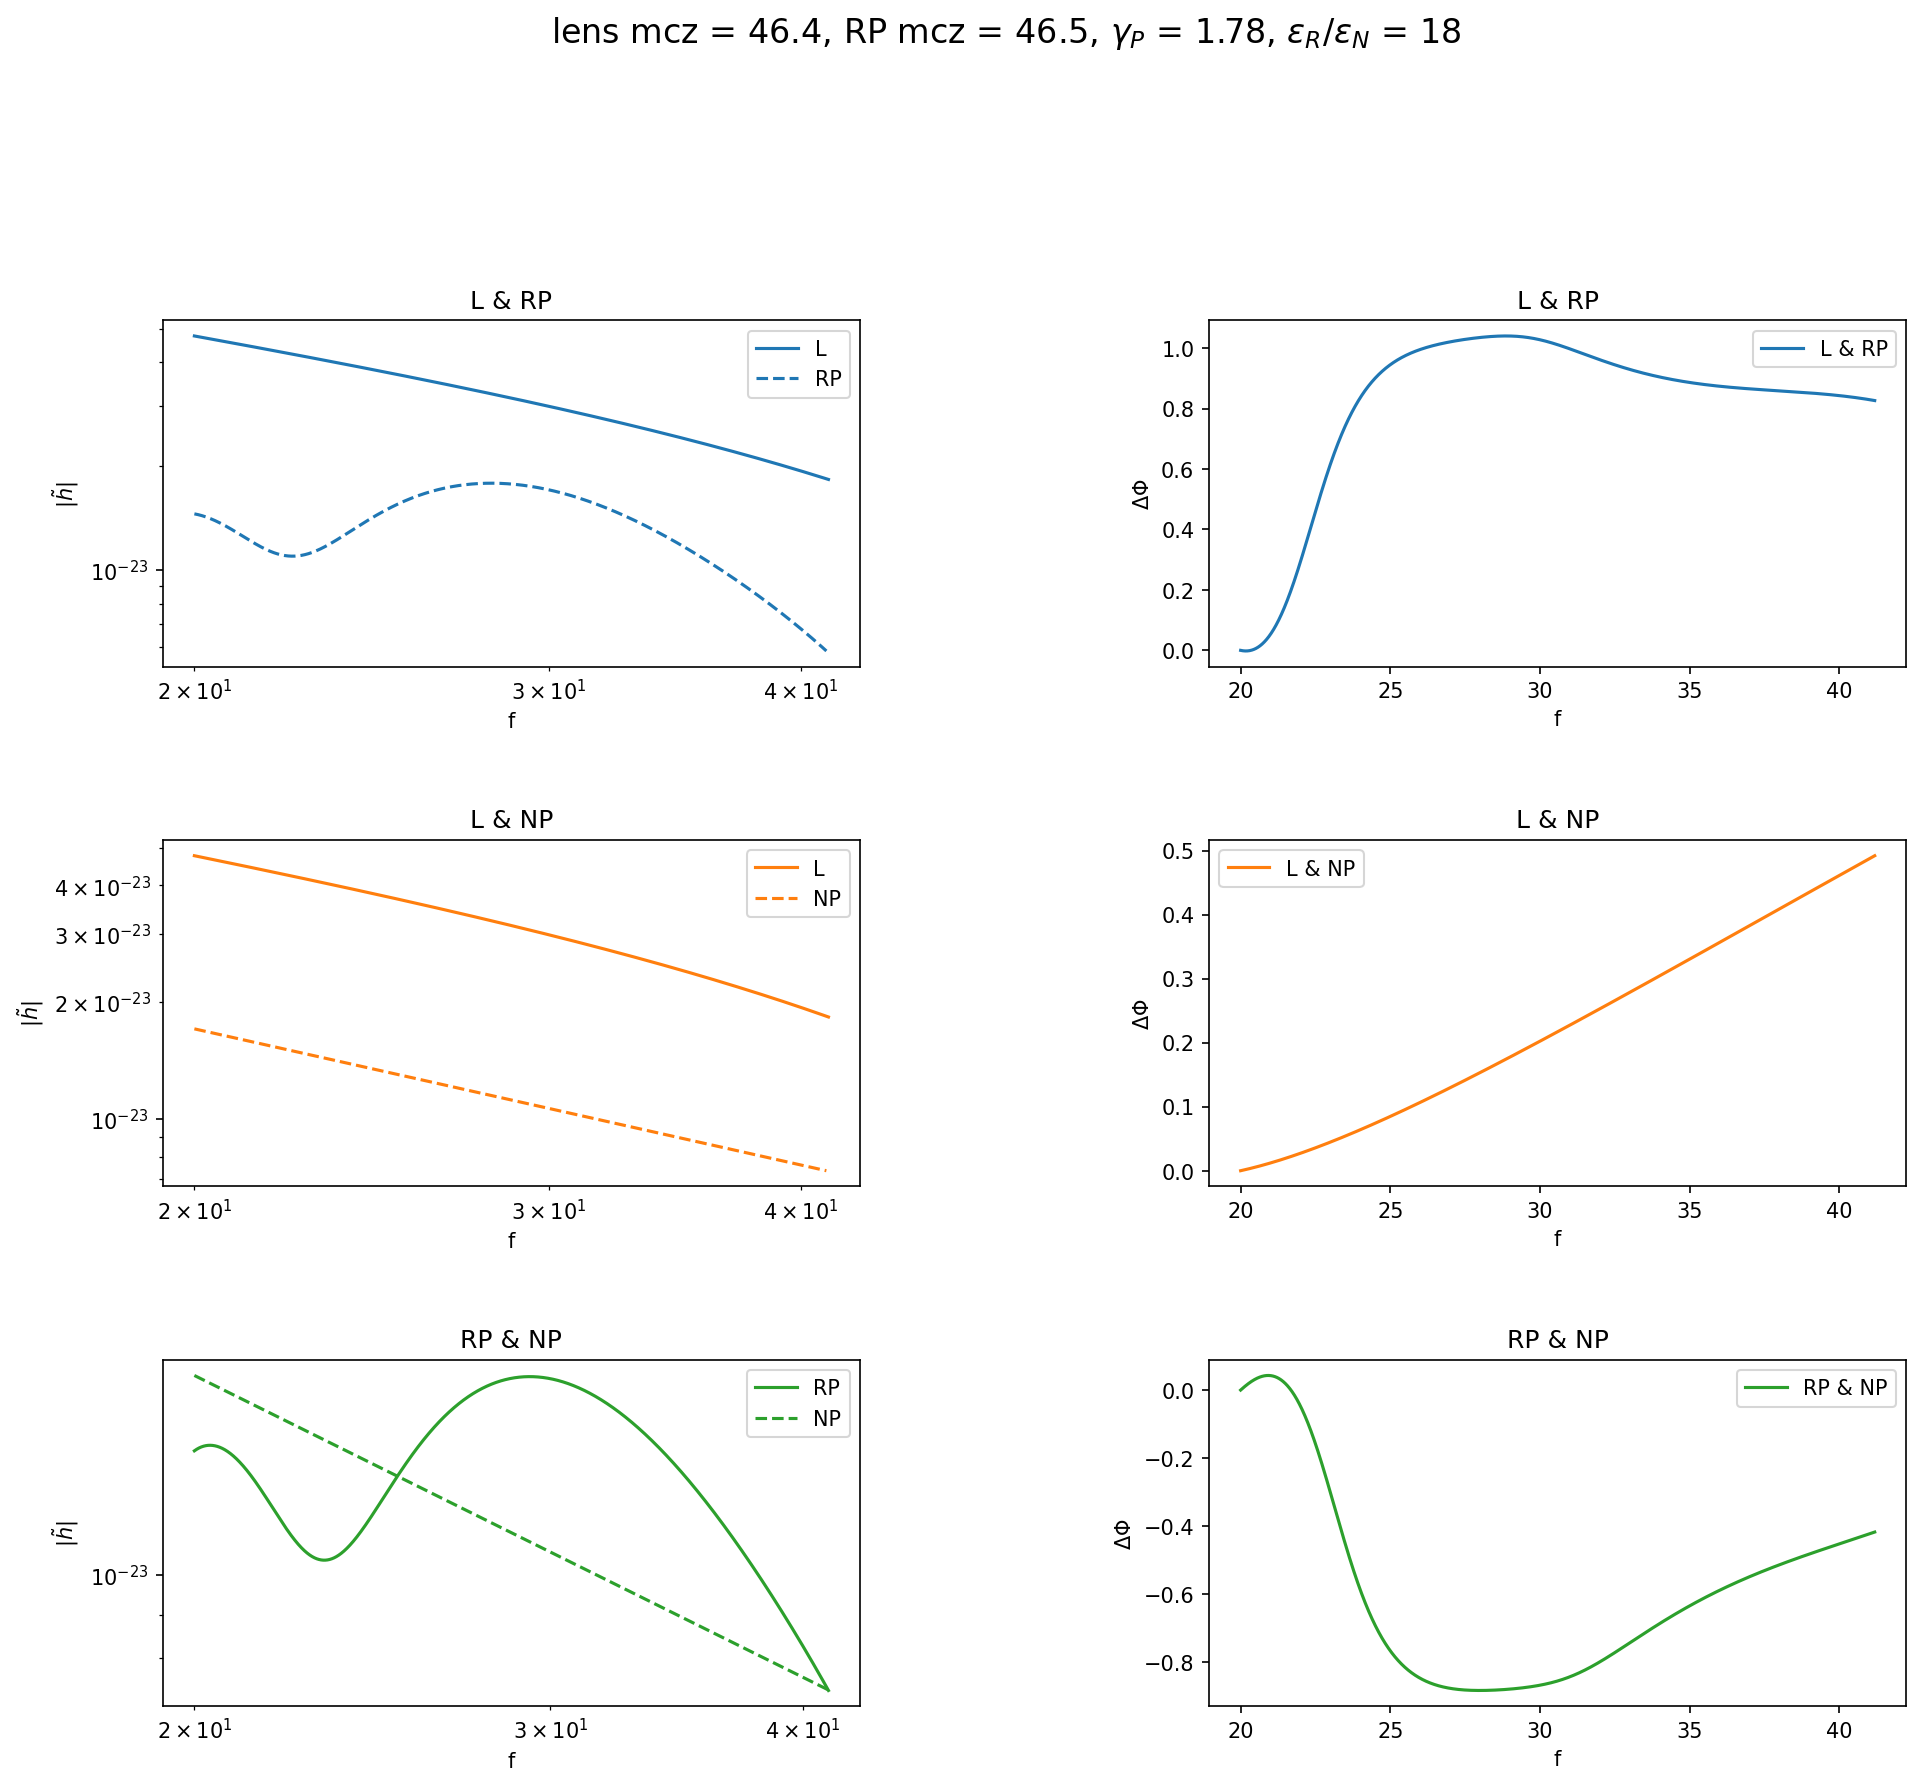

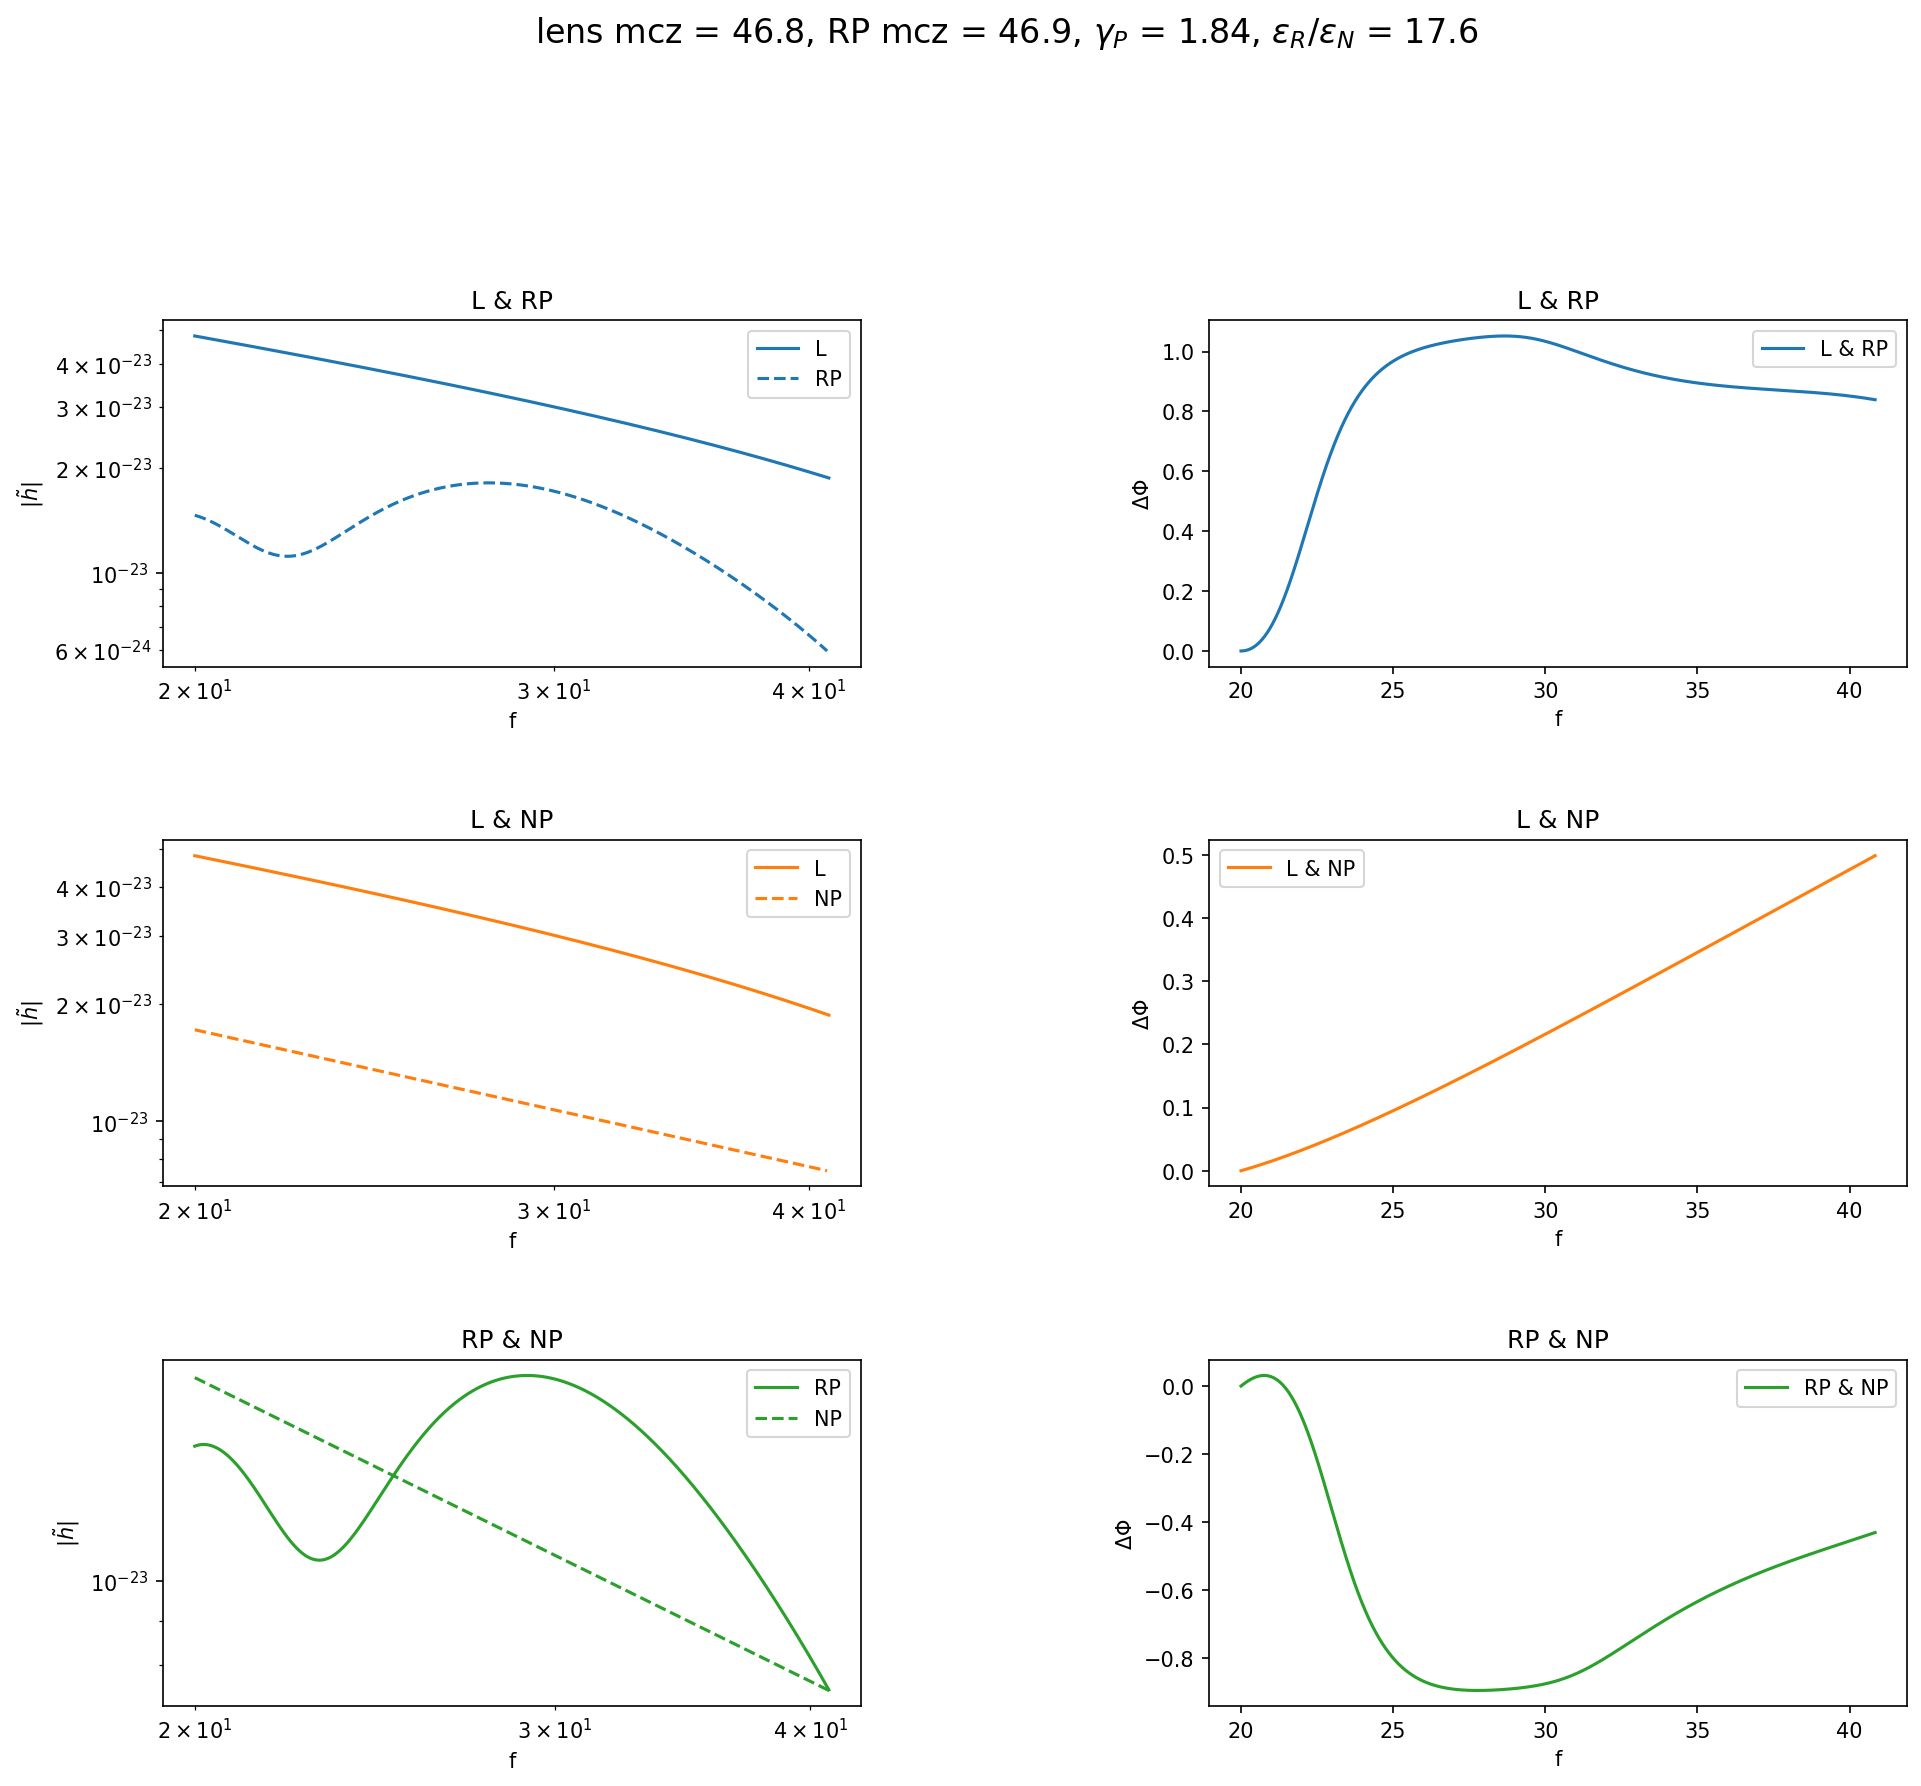

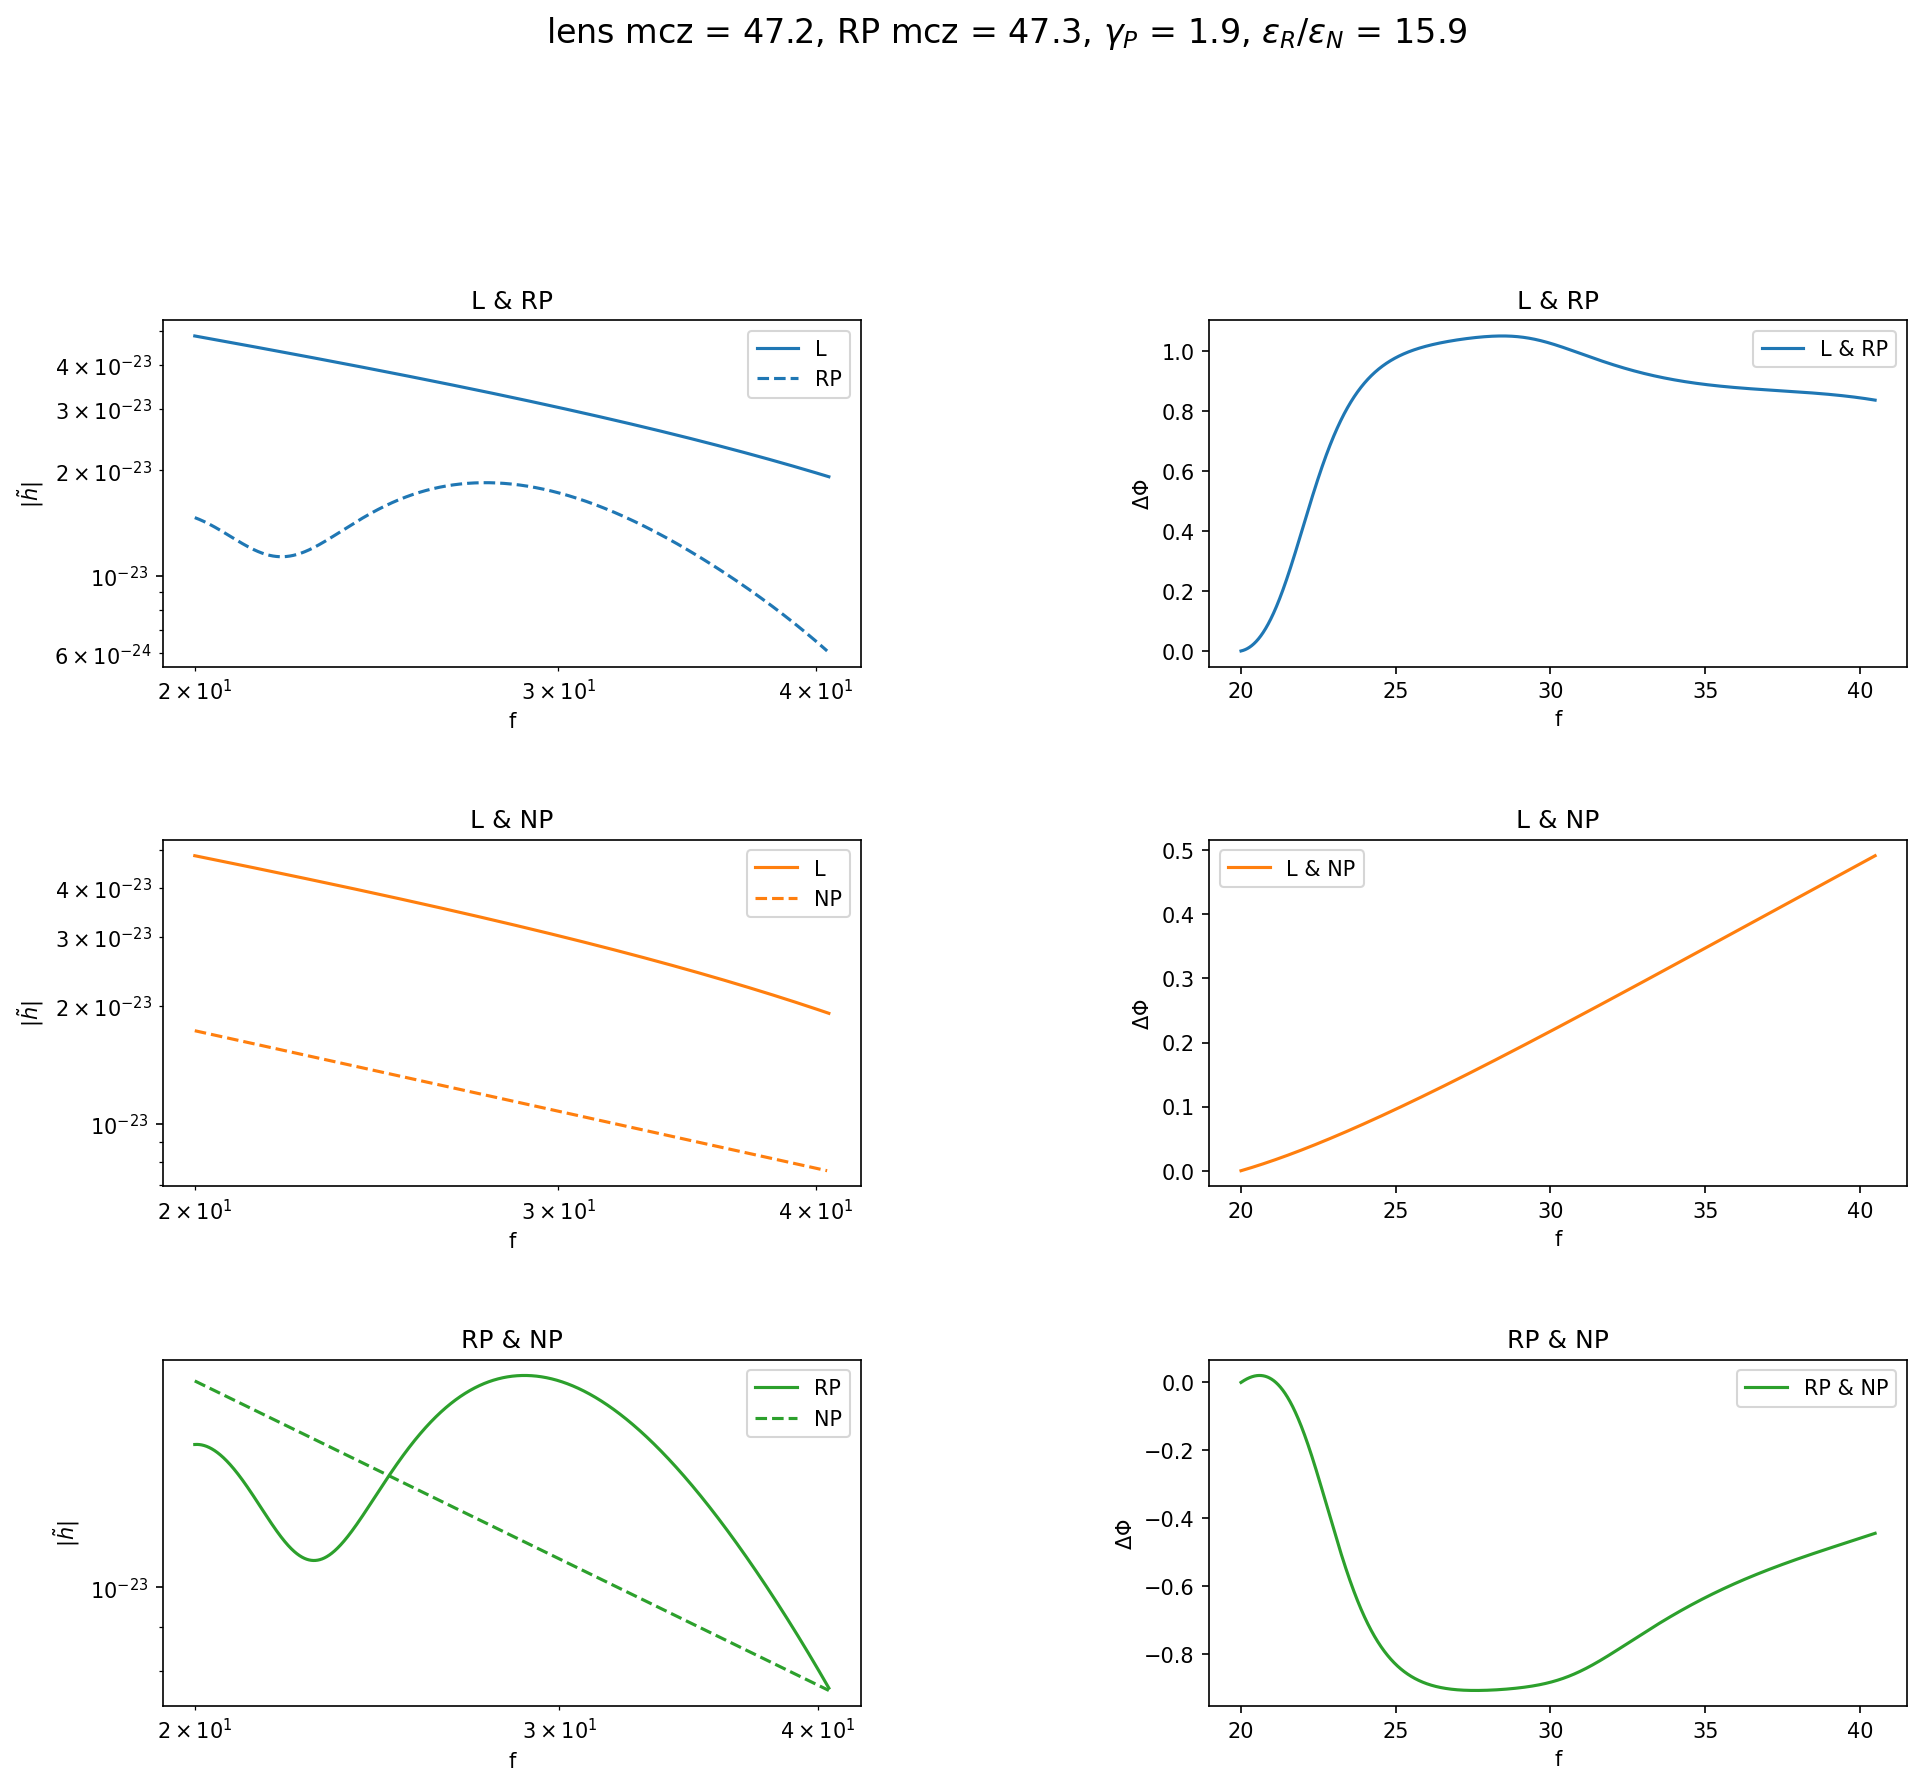

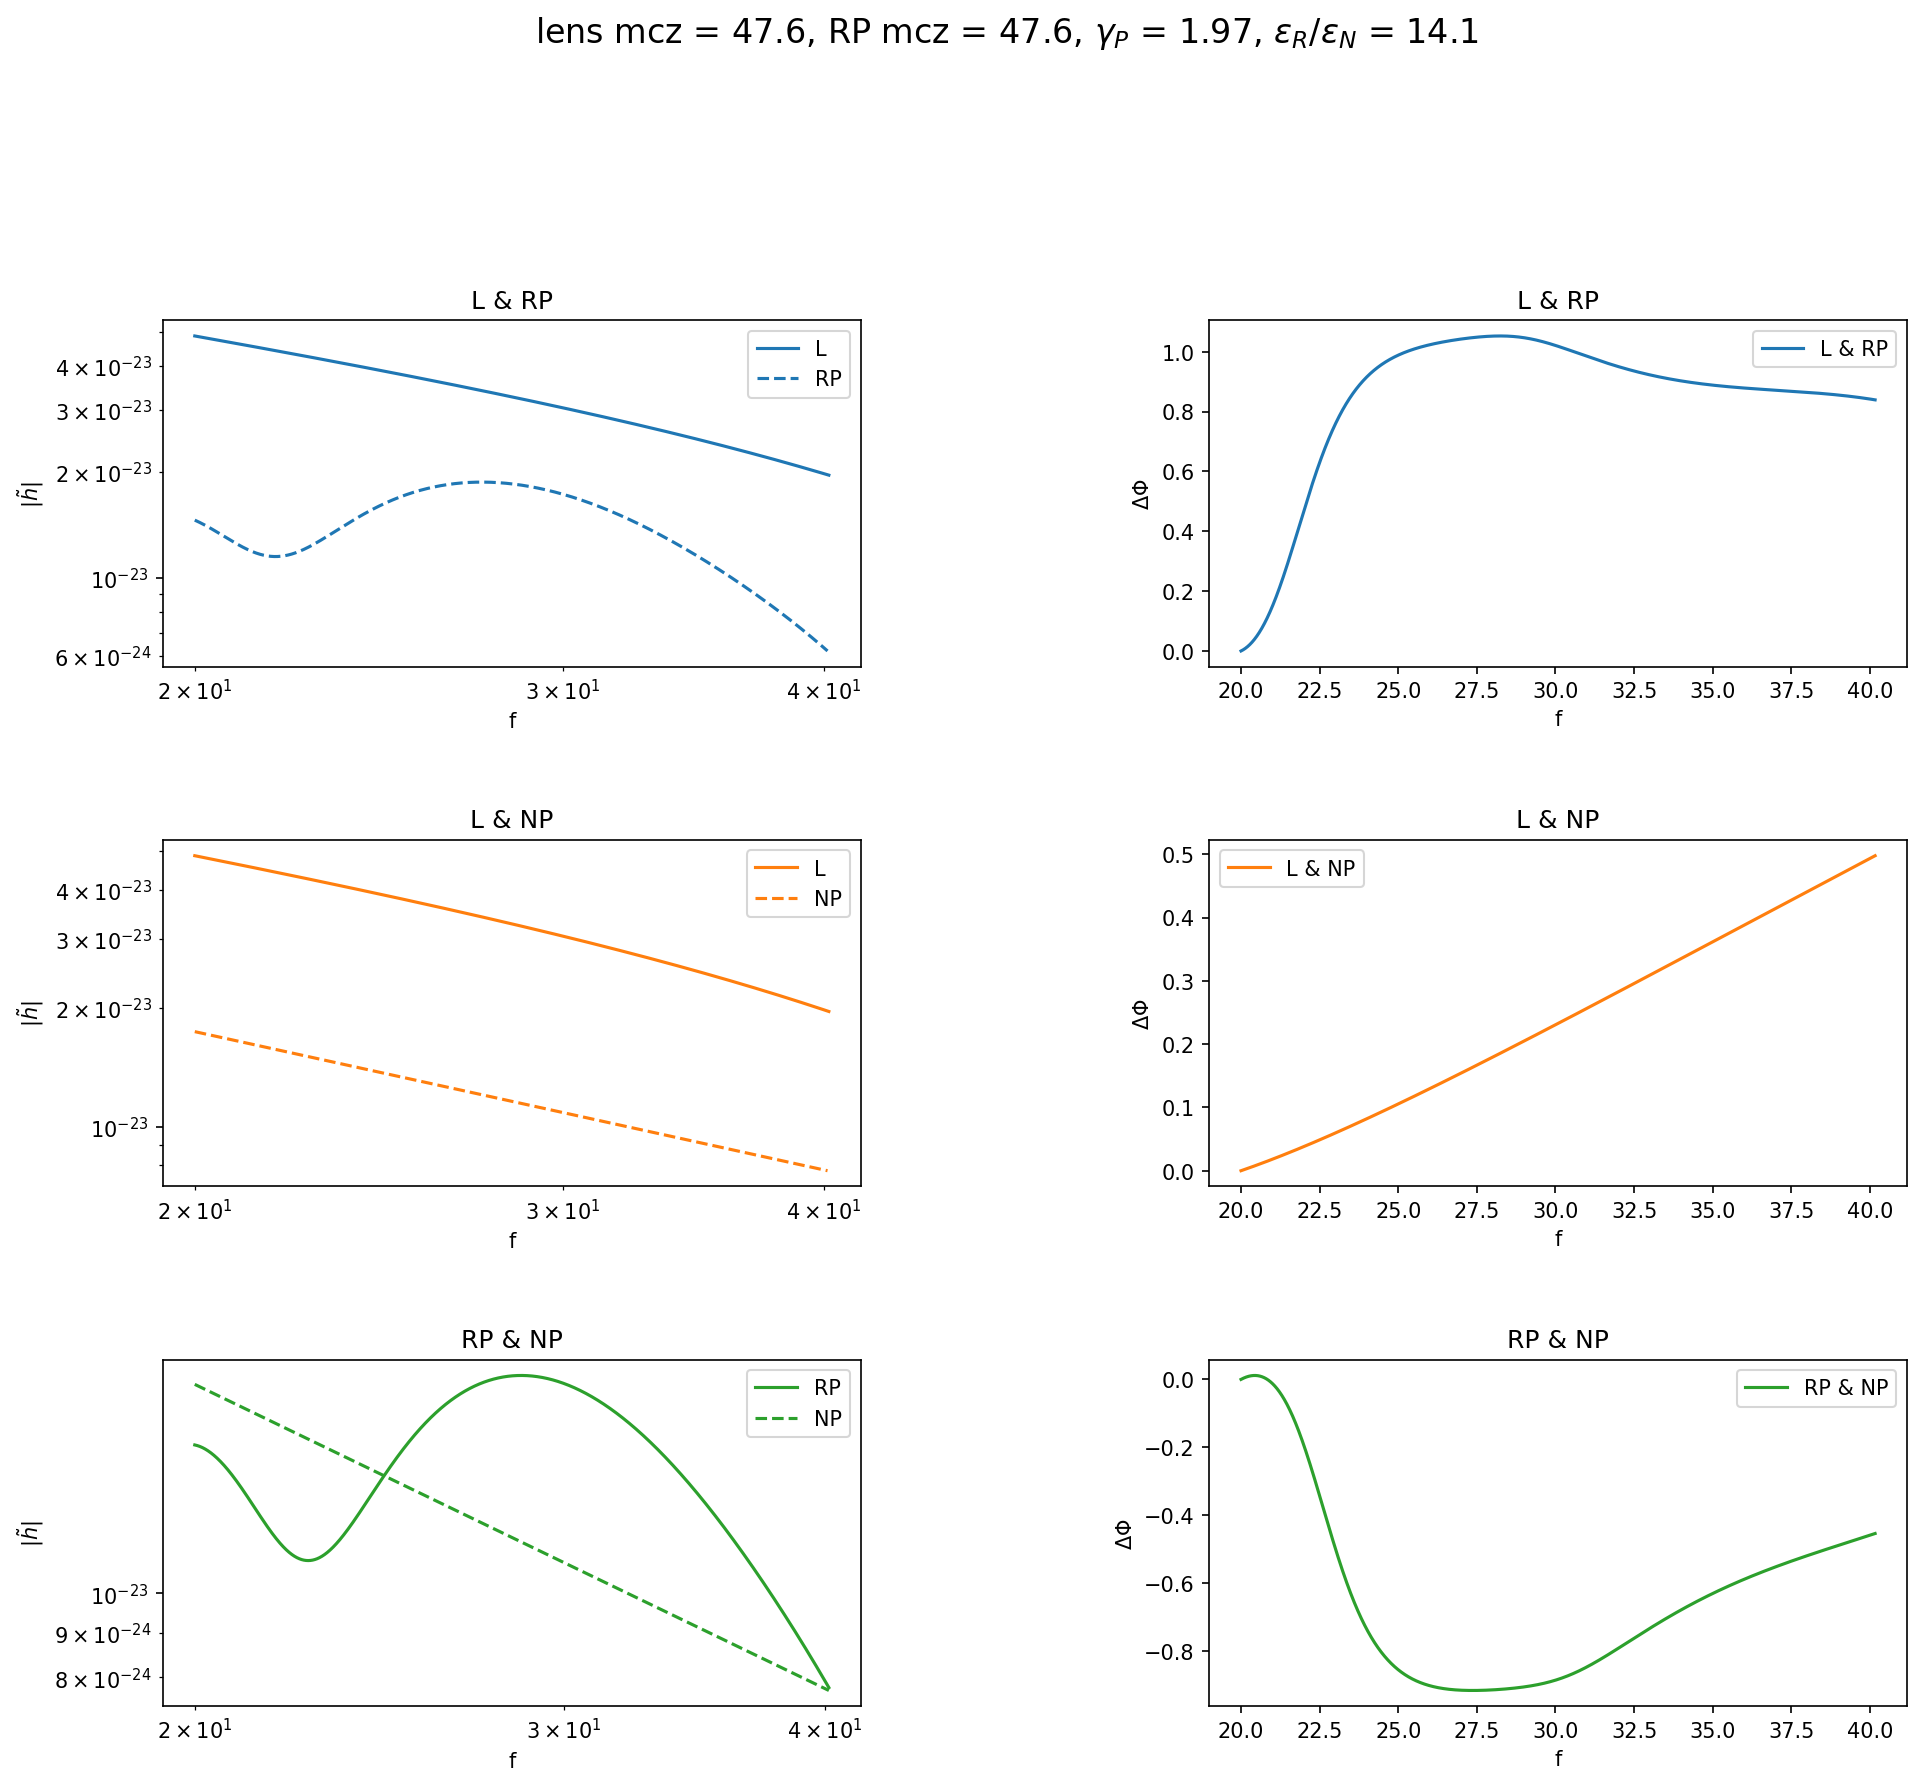

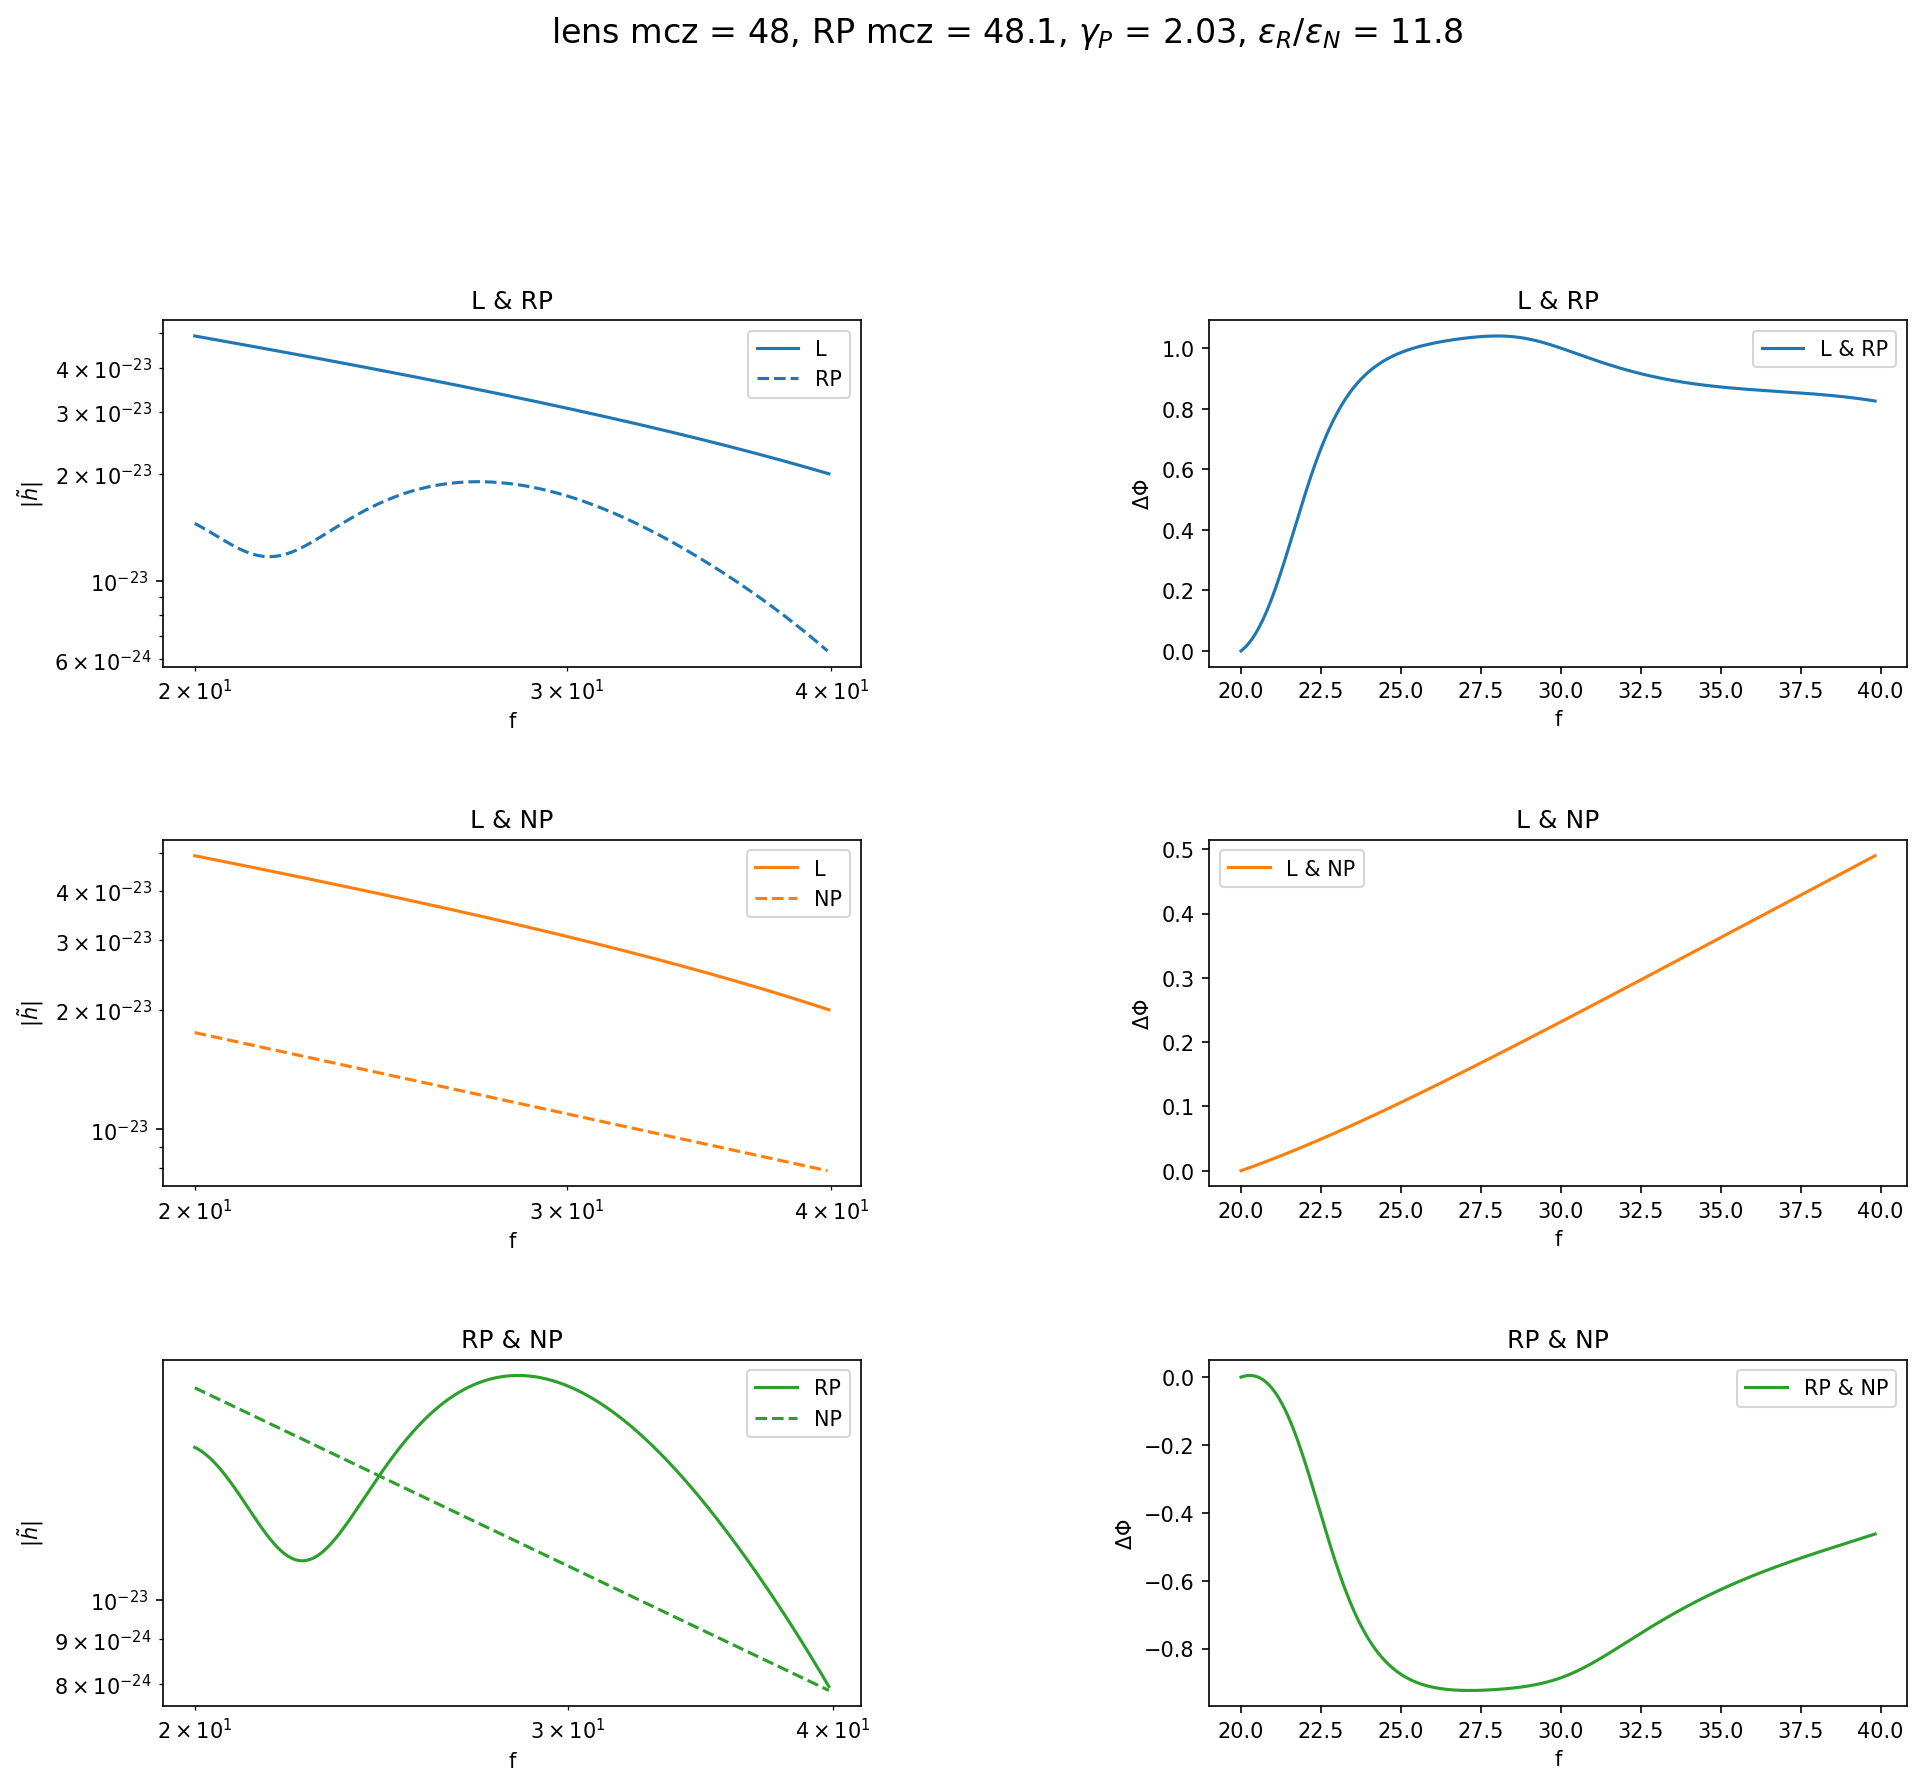

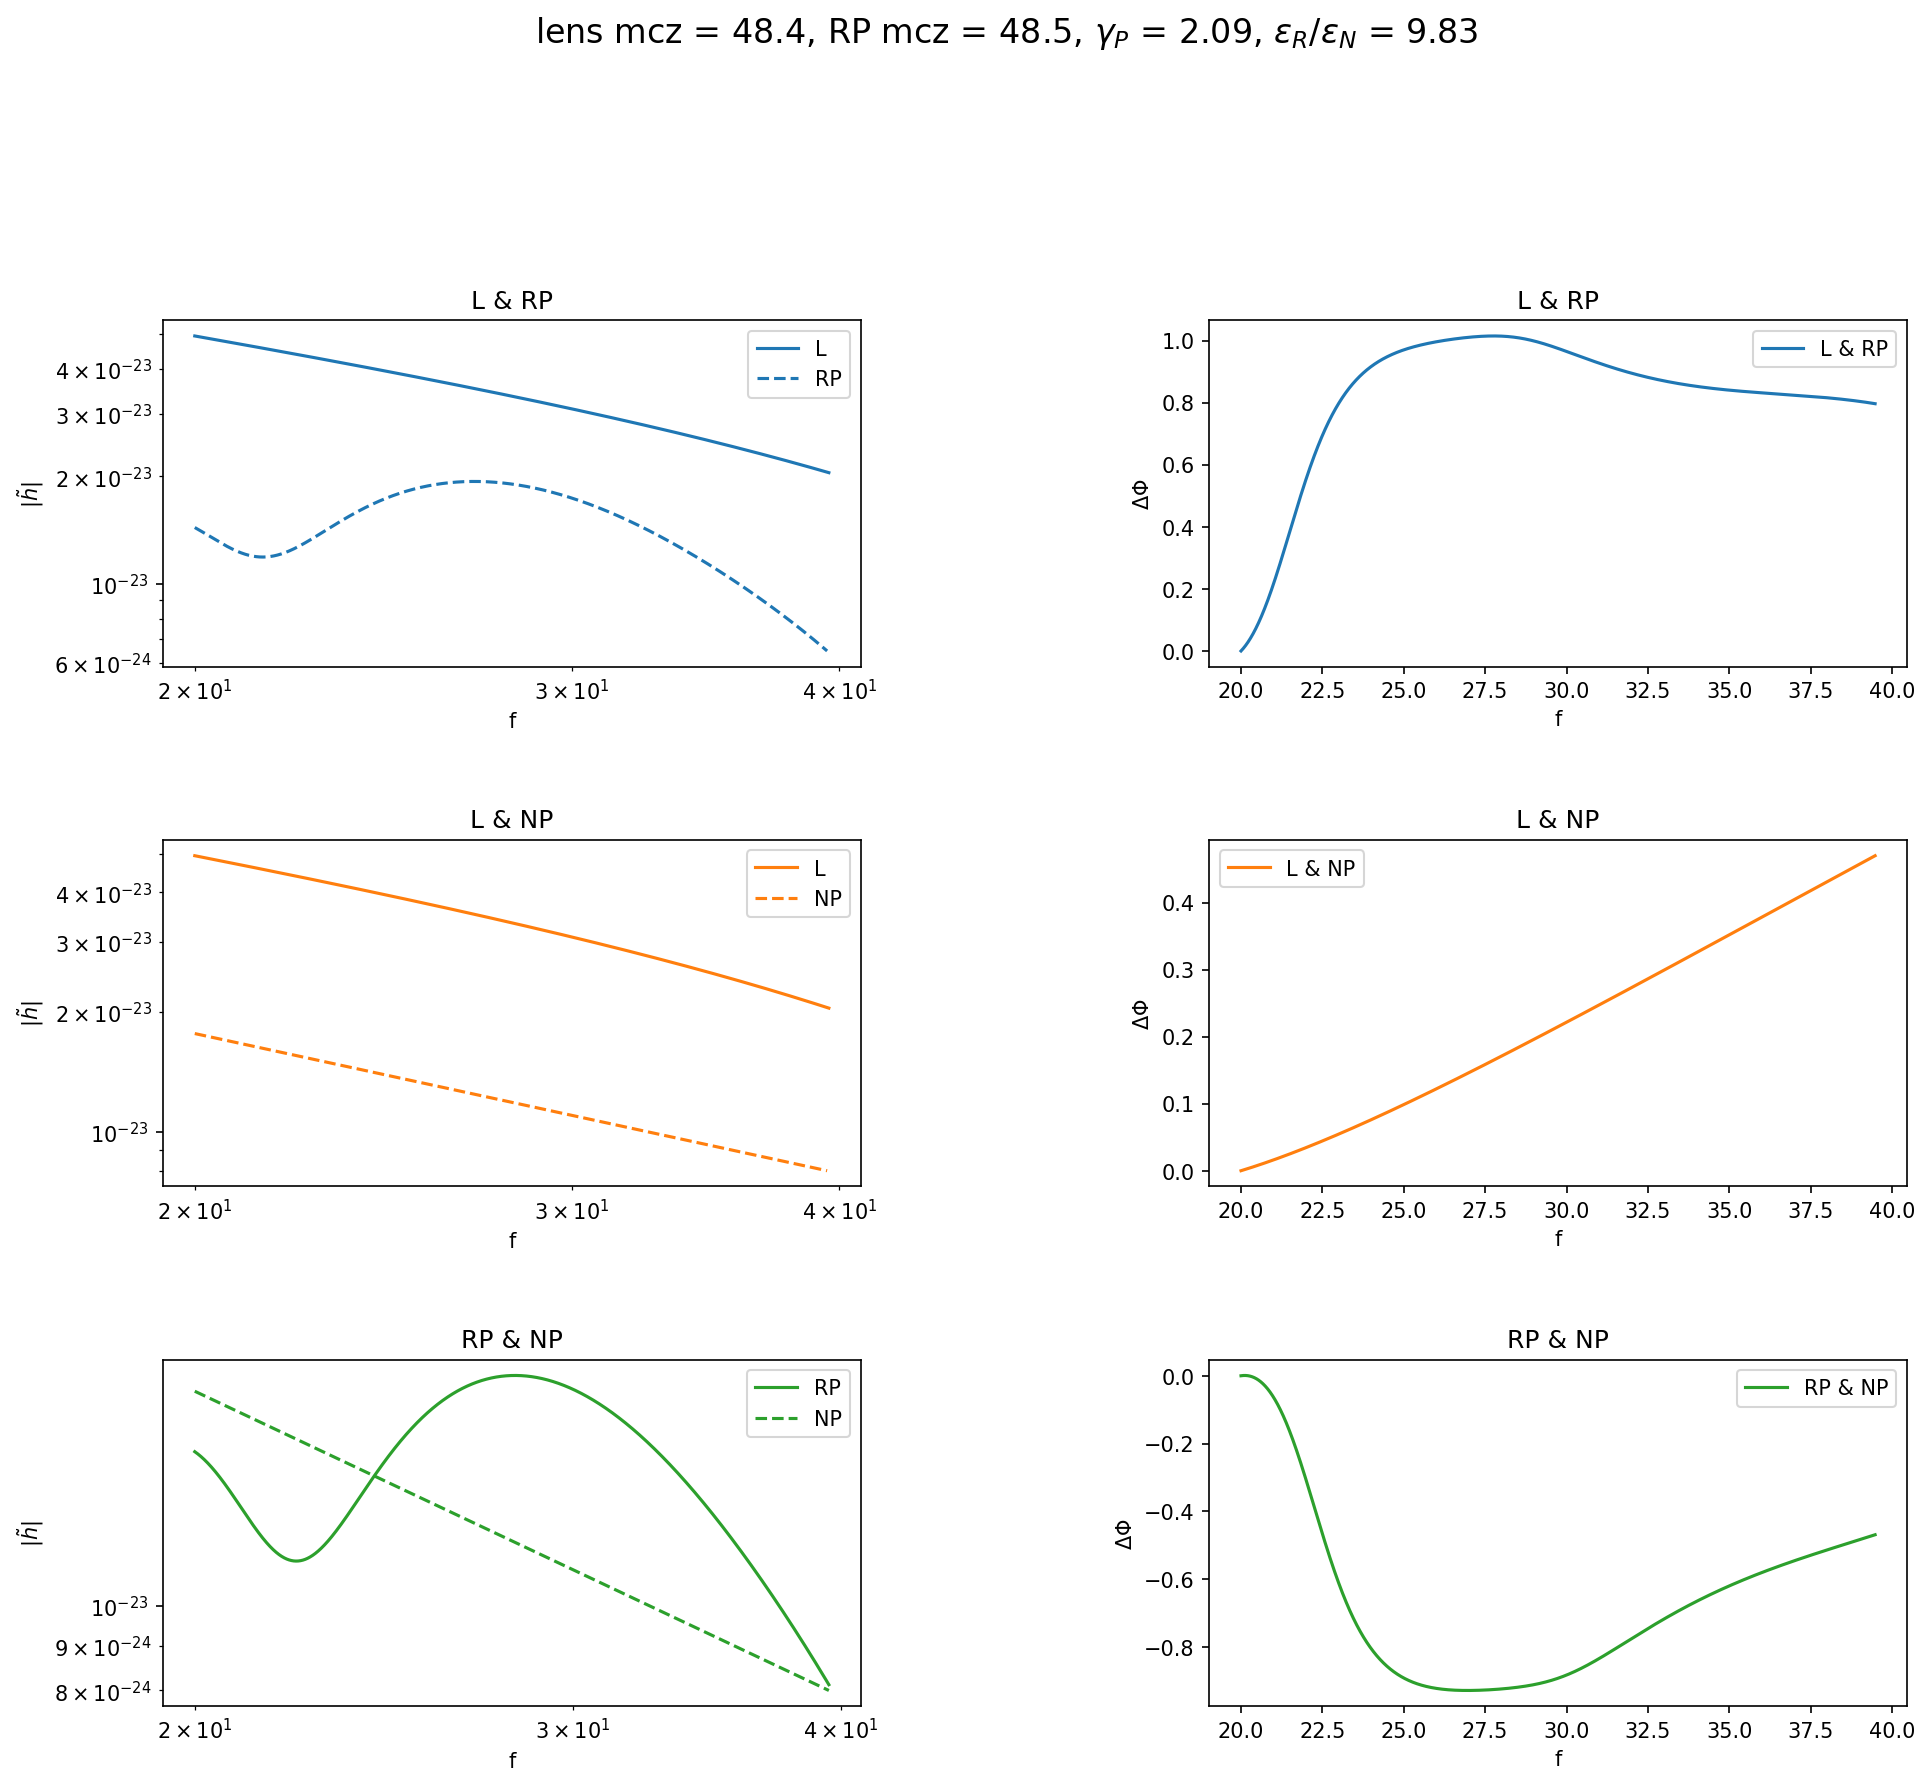

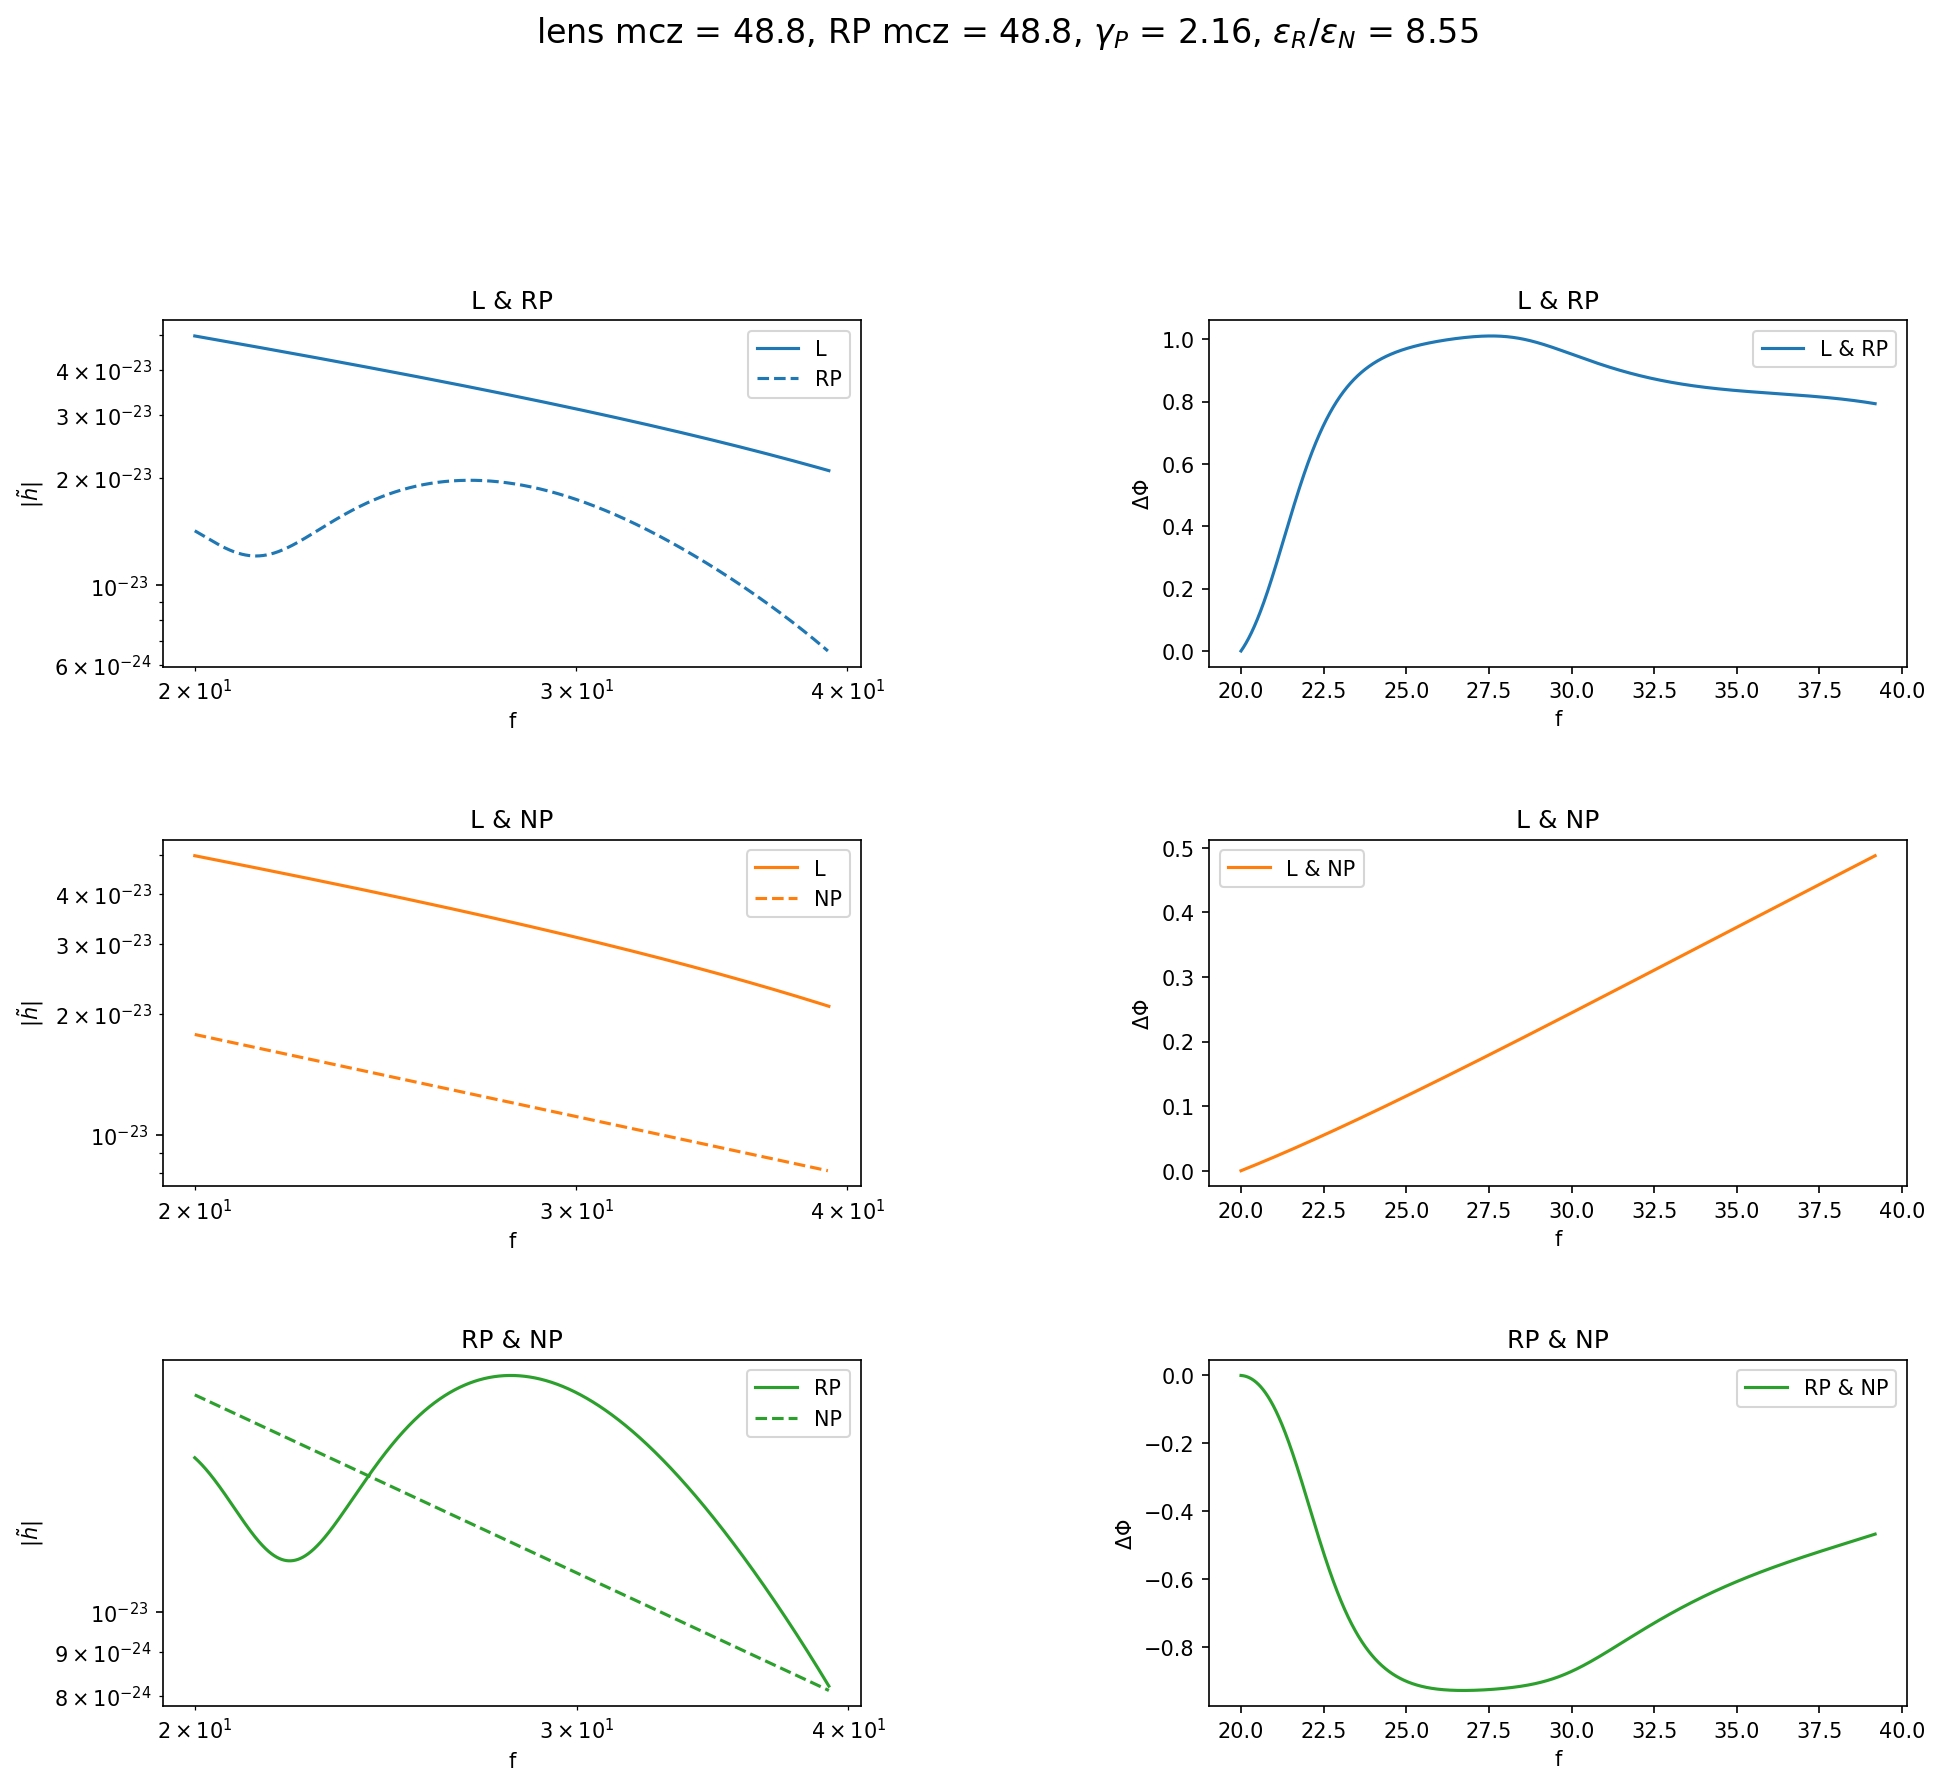

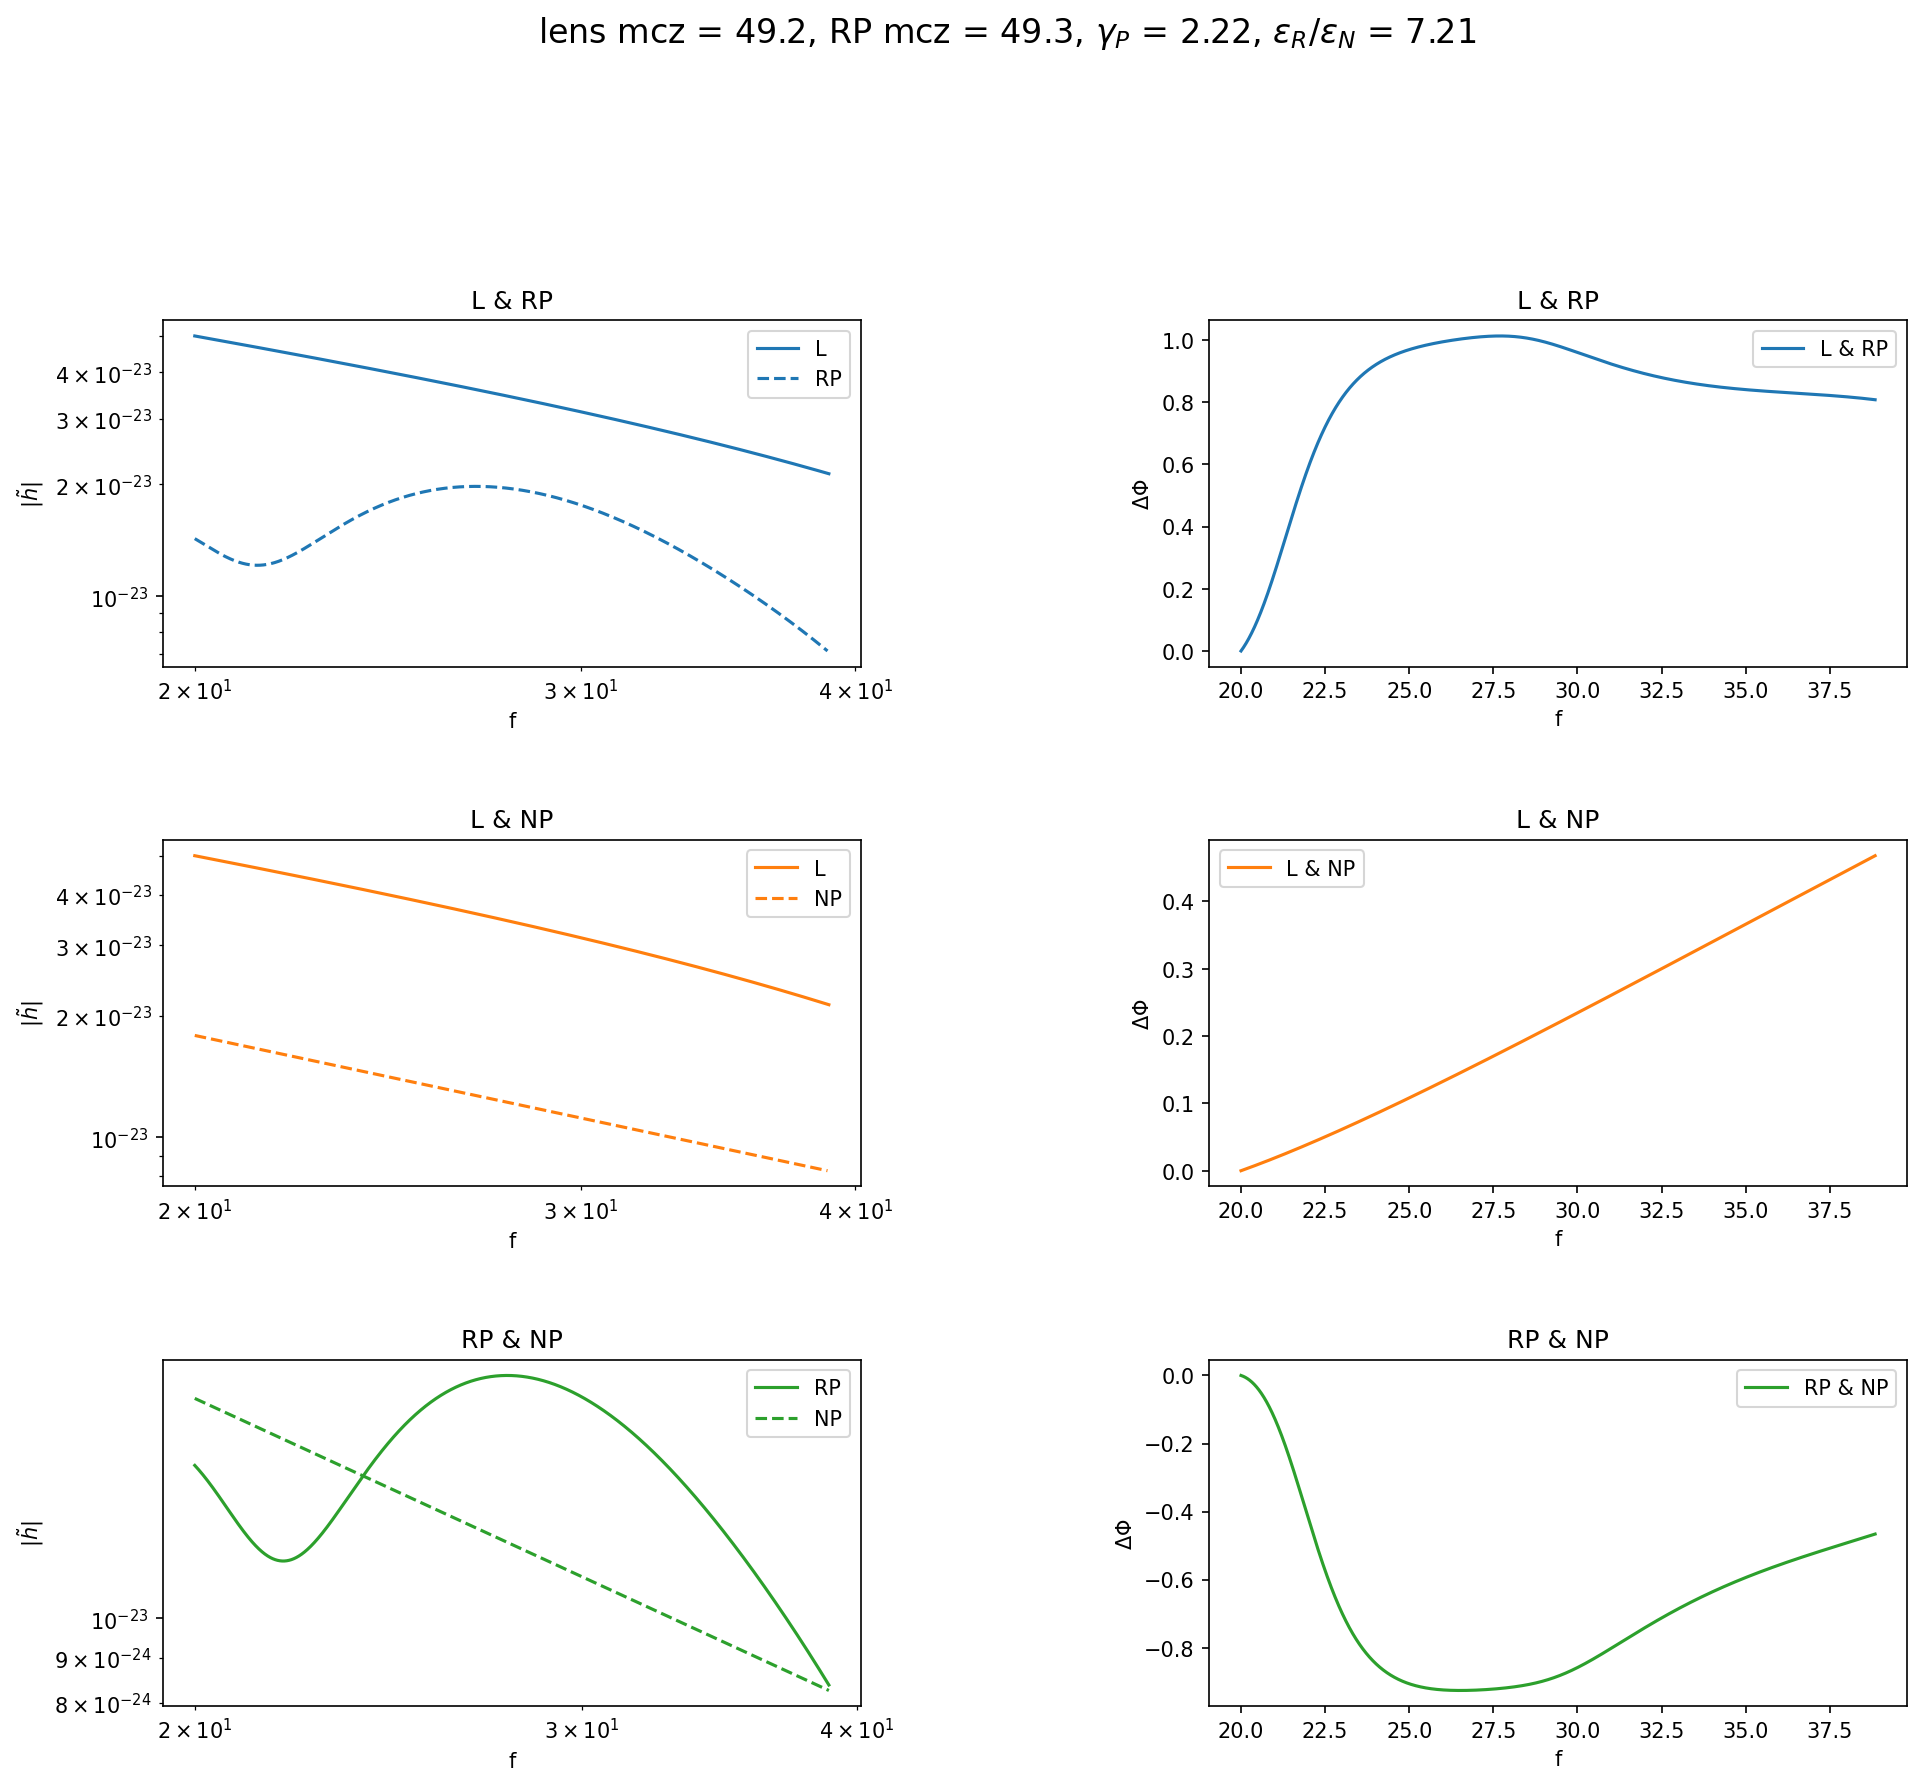

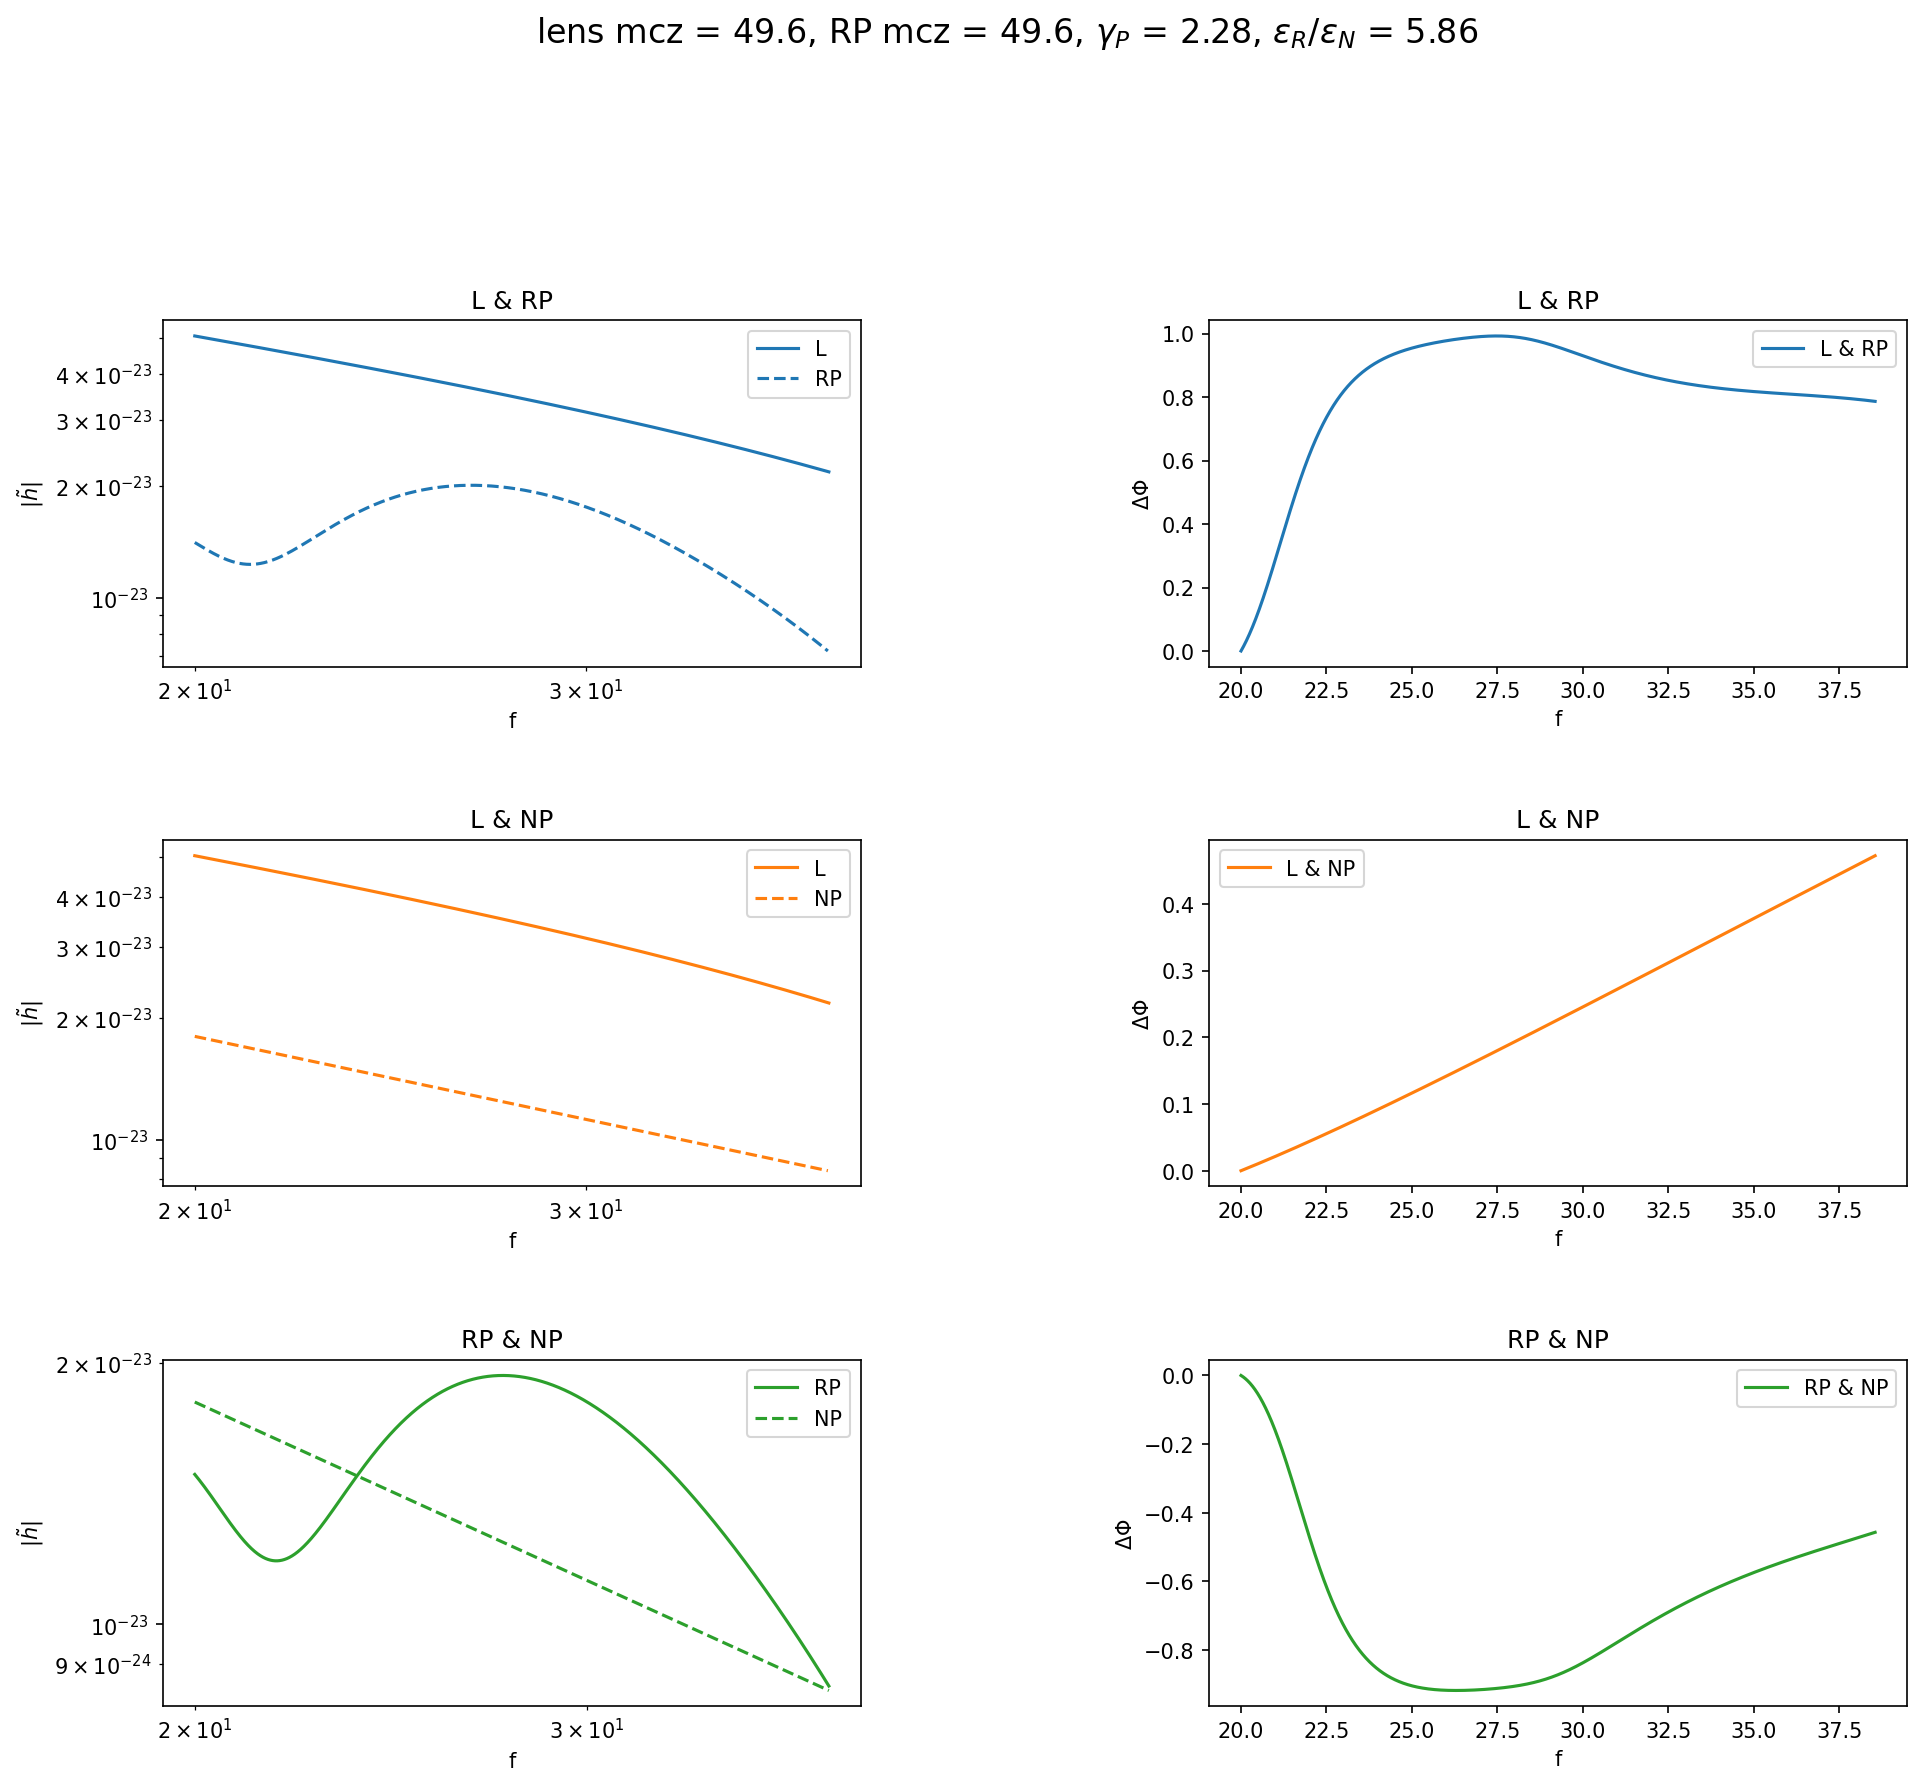

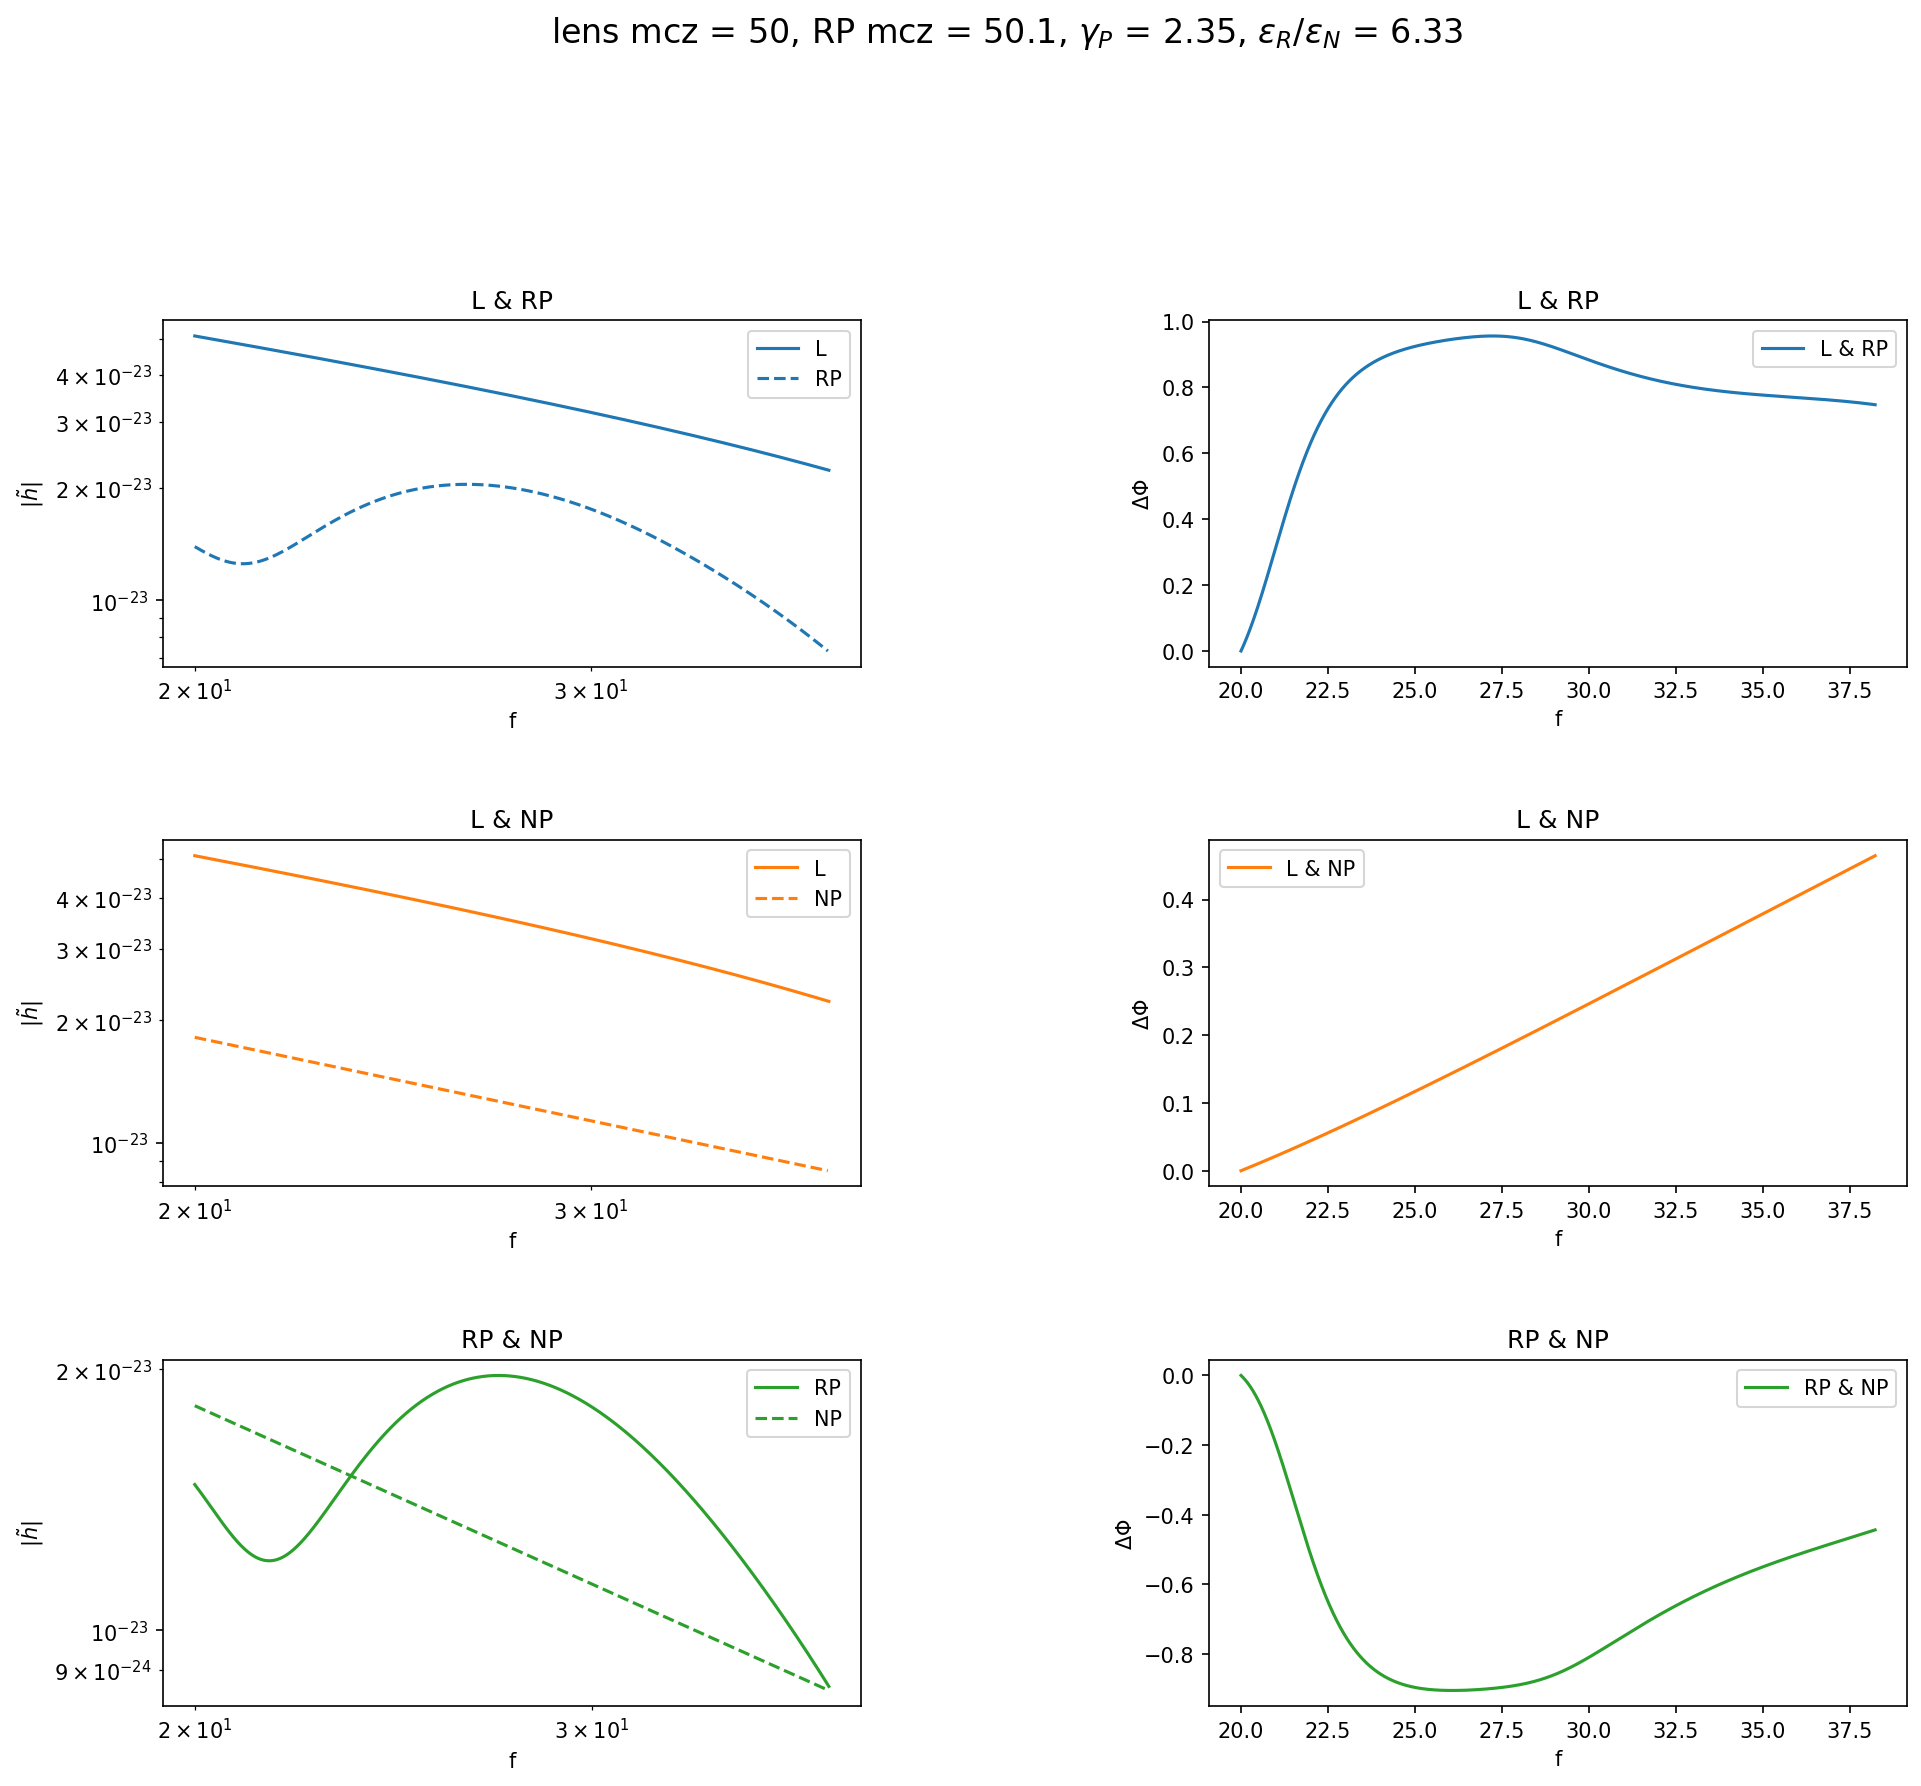

In [71]:
lens_params, RP_params, NP_params = set_to_location(loc_params["sys2"]["random"], lens_params_0, RP_params_0, NP_params_0)

# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

percentile = "95%"
RP_params["omega_tilde"] = omega_theta_tilde_pairs[percentile]["omega_tilde"]
RP_params["theta_tilde"] = omega_theta_tilde_pairs[percentile]["theta_tilde"]

lens_mcz_slider = np.linspace(10, 50, 100)

for lens_mcz in optimized_mcz_dict_95_last20.keys():
    lens_params["mcz"] = lens_mcz * solar_mass
    RP_params["mcz"] = optimized_mcz_dict_50[lens_mcz]["ep_min_mcz"]
    RP_params["gamma_P"] = optimized_mcz_dict_50[lens_mcz]["ep_min_gamma"]
    NP_params["mcz"] = optimized_mcz_dict_50[lens_mcz]["ep_min_mcz"]
    
    h_phase_diff_pairs()
    
    # add big title above the figure
    # plt.suptitle(
    #     r"$\mathcal{M}_{\text{L}}$ = {:.3g}, $\mathcal{M}_{\text{RP}}$ = {:.3g}, $\gamma_P$ = {:.3g}".format(
    #         lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"]
    #     ),
    #     fontsize=16,
    #     y=1.05,
    # )

    plt.suptitle(
        r"lens mcz = {:.3g}, RP mcz = {:.3g}, $\gamma_P$ = {:.3g}, $\epsilon_R / \epsilon_N$ = {:.3g}".format(
            lens_mcz, RP_params["mcz"] / solar_mass, RP_params["gamma_P"], optimized_mcz_dict_95_last20[lens_mcz]["ep_ratio"]
        ),
        fontsize=16,
        y=1.05,
    )

# test `pycbc.filter.matchedfilter.match` and `pycbc.filter.matchedfilter.optimized_match`

In [34]:
from pycbc.filter import match, optimized_match, make_frequency_series, matched_filter_core, sigmasq

In [46]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys2']['random'], lens_params_0, RP_params_0, NP_params_0)

# set custom values for mcz and MLz
mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass

lens_inst = LensingGeo(lens_params)
RP_inst = Precessing(RP_params)
NP_inst = Precessing(NP_params)

f_min = 20
f_cut_L = lens_inst.f_cut()
f_cut_RP = RP_inst.f_cut()
f_cut_NP = NP_inst.f_cut()

f_range_L = np.linspace(f_min, f_cut_L, 10000)
f_range_RP = np.linspace(f_min, f_cut_RP, 10000)
f_range_NP = np.linspace(f_min, f_cut_NP, 10000)

lensed_strain = lens_inst.strain(f_range_L)
RP_strain = RP_inst.strain(f_range_RP)
NP_strain = NP_inst.strain(f_range_NP)

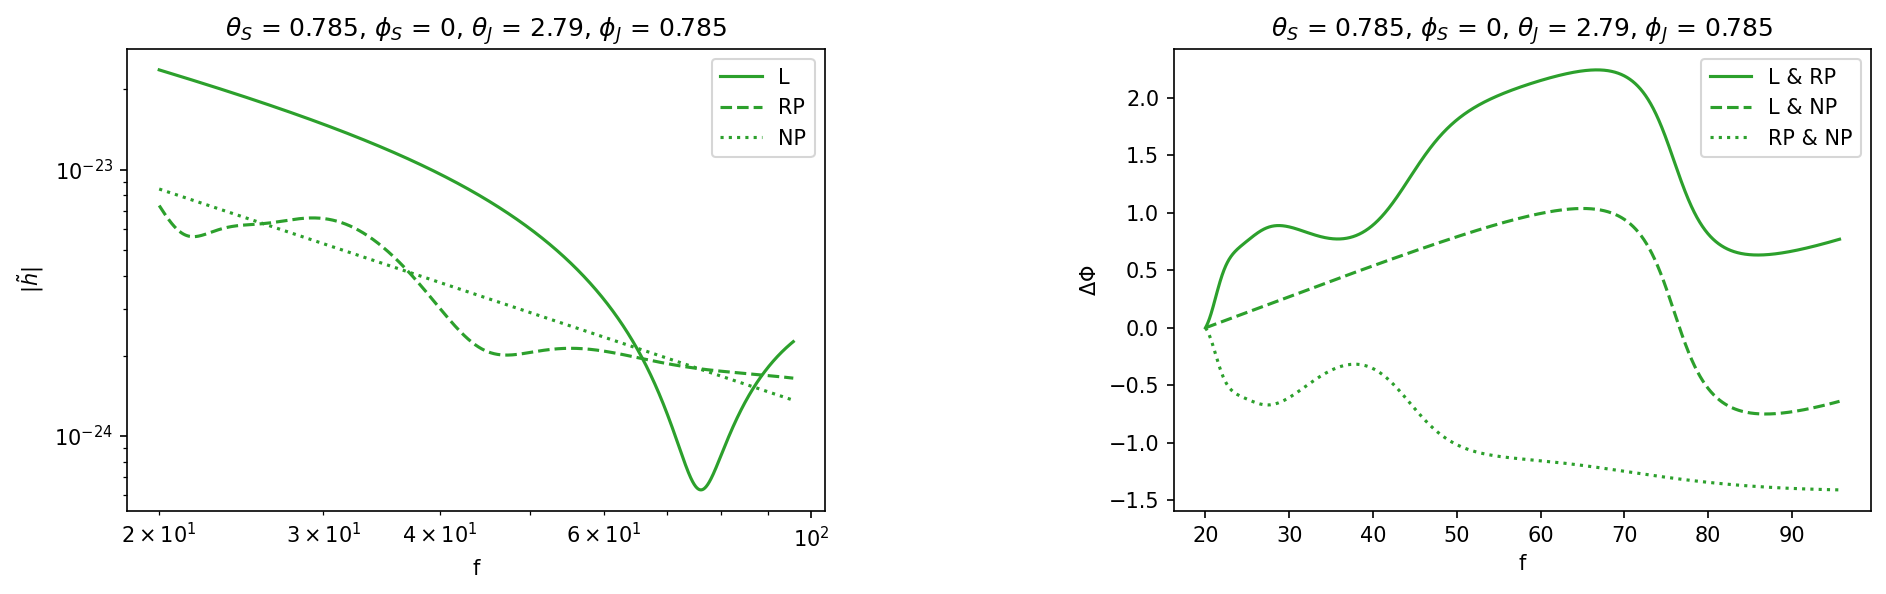

In [38]:
# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

h_phase_diff_all(indiv_loc_dict)

In [52]:
match(lensed_strain, RP_strain, psd=Sn(f_range_L), return_phase=True)

(0.6833306290257579, 0, -0.5759267269437816)

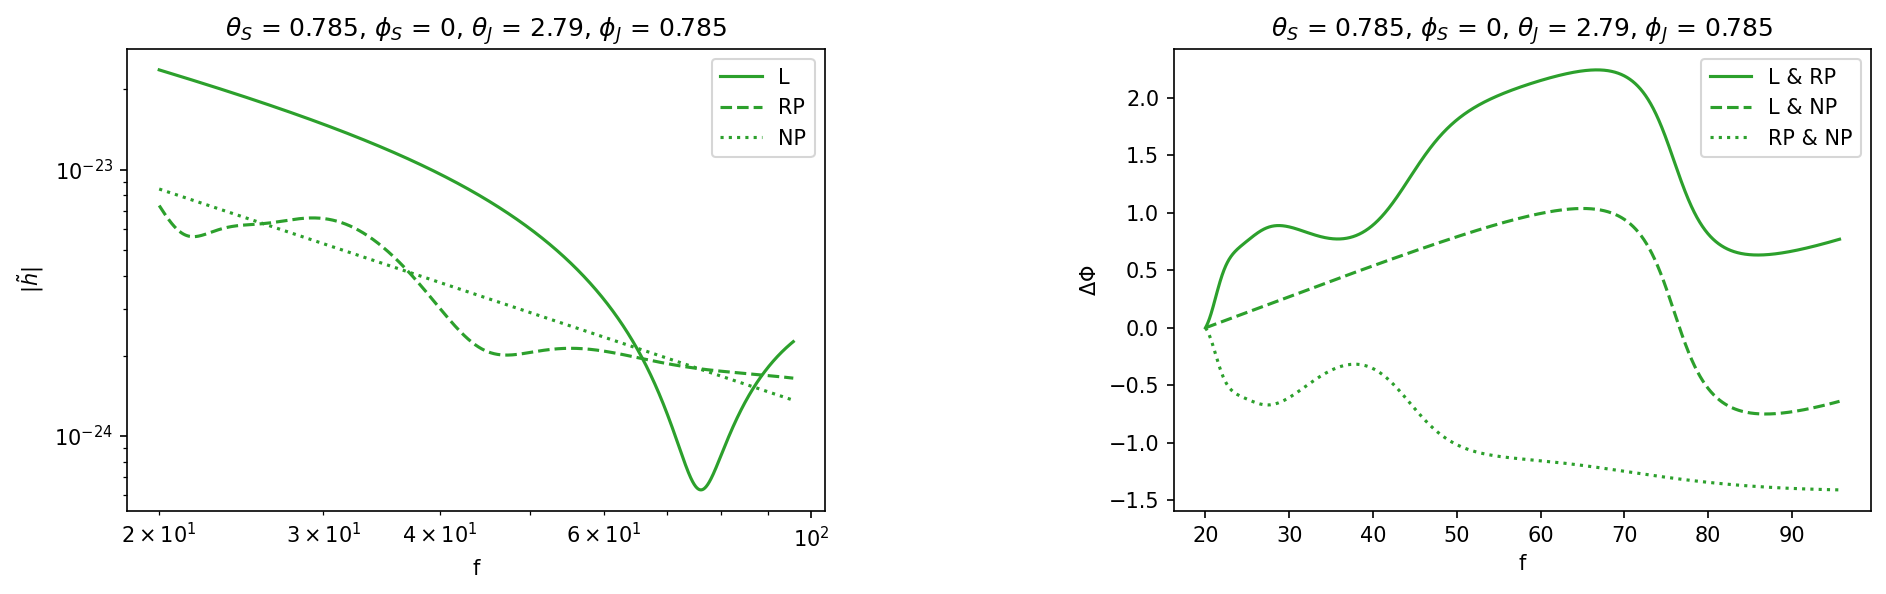

In [40]:
# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

# set custom params
RP_params["phi_c"] = -0.5759267269437816

h_phase_diff_all(indiv_loc_dict)

In [47]:
optimized_match(lensed_strain, RP_strain, psd=Sn(f_range_L), return_phase=True)

(0.5104992247655805, 2.5612493092273896, -1.7180264032038124)

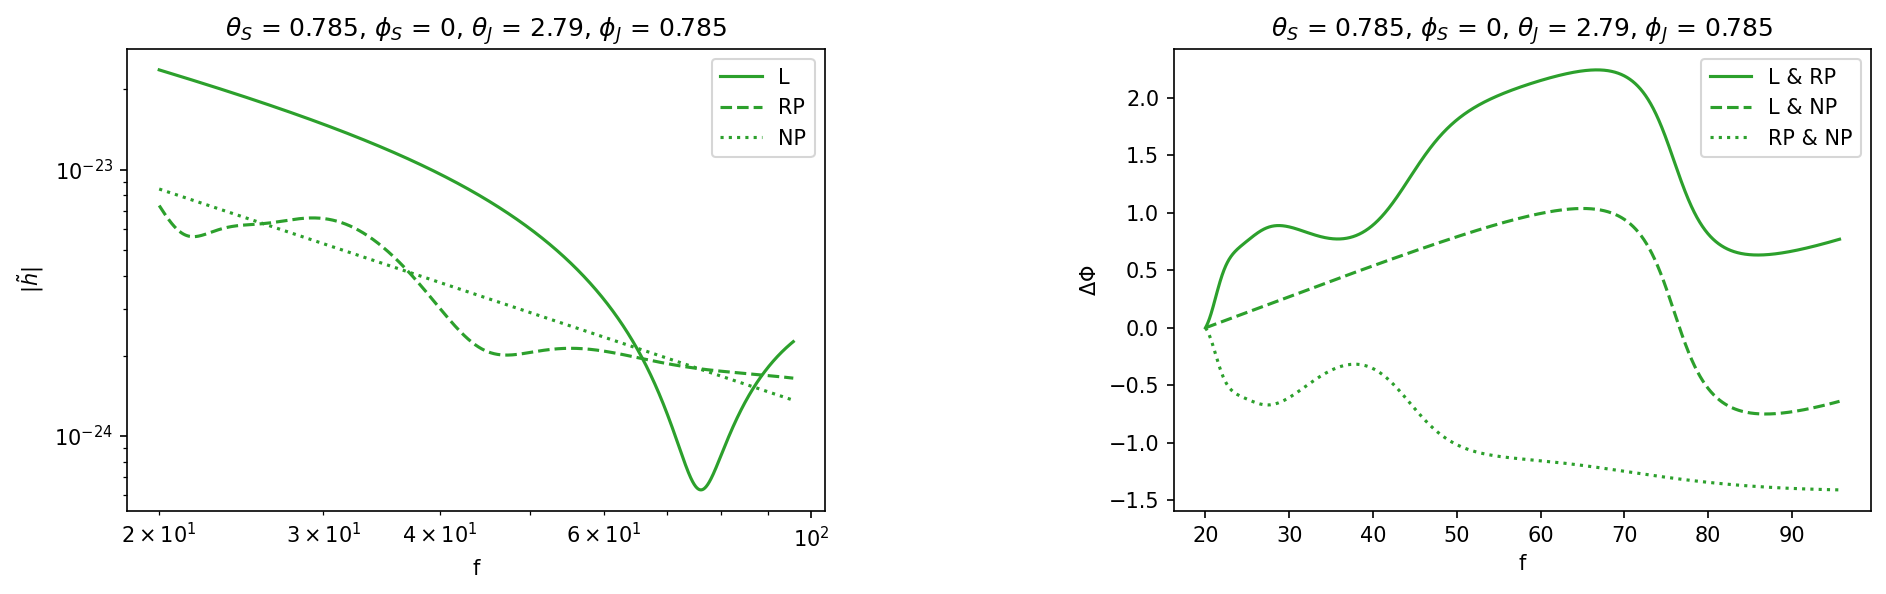

In [48]:
# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

# set custom params
RP_params["phi_c"] = -1.7180264032038124

h_phase_diff_all(indiv_loc_dict)

In [53]:
1 - mismatch_epsilon("L & RP", lens_params, RP_params, NP_params) # type: ignore

0.6824896666503337

In [54]:
results = optimize_mismatch_gammaP("L & RP", lens_params, RP_params, NP_params)

In [57]:
results

{'ep_min': 0.09793195570872548,
 'g_min': 4.1253236865320515,
 'ep_max': 0.43226972246630935,
 'g_max': 1.6501294746128208,
 'ep_0': 0.3175103333496663}

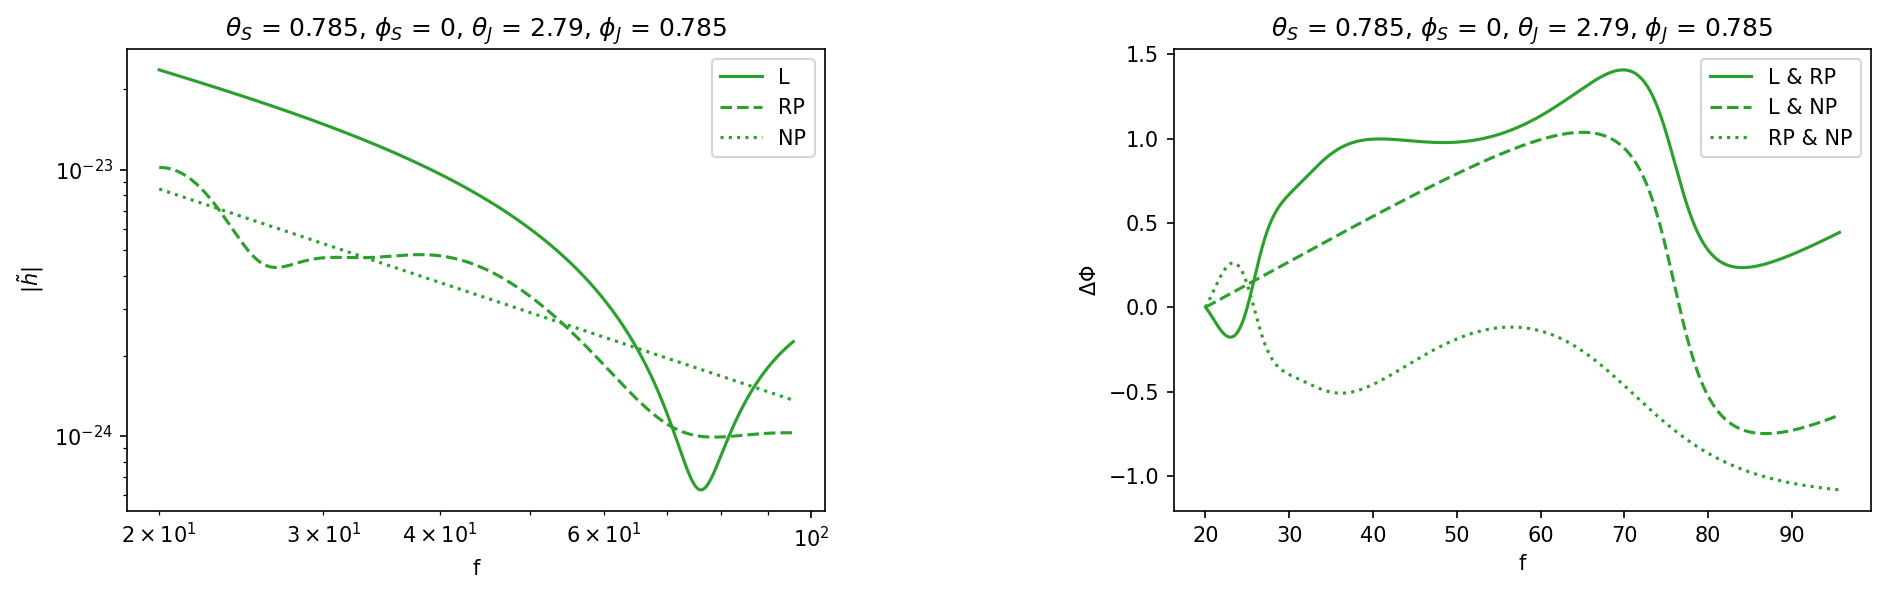

In [58]:
# create individual location dictionary
key = "random"
indiv_loc_dict = {key: loc_params["sys2"][key]}

# set custom params
RP_params["gamma_P"] = 4.1253236865320515
h_phase_diff_all(indiv_loc_dict)

In [ ]:
_snr = None
def match(
    vec1,
    vec2,
    psd=None,
    low_frequency_cutoff=None,
    high_frequency_cutoff=None,
    v1_norm=None,
    v2_norm=None,
    subsample_interpolation=False,
    return_phase=False,
):
    """Return the match between the two TimeSeries or FrequencySeries.

    Return the match between two waveforms. This is equivalent to the overlap
    maximized over time and phase.

    The maximization is only performed with discrete time-shifts,
    or a quadratic interpolation of them if the subsample_interpolation
    option is turned on; for a more precise computation
    of the match between two waveforms, use the optimized_match function.
    The accuracy of this function is guaranteed up to the fourth decimal place.

    Parameters
    ----------
    vec1 : TimeSeries or FrequencySeries
        The input vector containing a waveform.
    vec2 : TimeSeries or FrequencySeries
        The input vector containing a waveform.
    psd : Frequency Series
        A power spectral density to weight the overlap.
    low_frequency_cutoff : {None, float}, optional
        The frequency to begin the match.
    high_frequency_cutoff : {None, float}, optional
        The frequency to stop the match.
    v1_norm : {None, float}, optional
        The normalization of the first waveform. This is equivalent to its
        sigmasq value. If None, it is internally calculated.
    v2_norm : {None, float}, optional
        The normalization of the second waveform. This is equivalent to its
        sigmasq value. If None, it is internally calculated.
    subsample_interpolation : {False, bool}, optional
        If True the peak will be interpolated between samples using a simple
        quadratic fit. This can be important if measuring matches very close to
        1 and can cause discontinuities if you don't use it as matches move
        between discrete samples. If True the index returned will be a float.
    return_phase : {False, bool}, optional
        If True, also return the phase shift that gives the match.

    Returns
    -------
    match: float
    index: int
        The number of samples to shift to get the match.
    phi: float
        Phase to rotate complex waveform to get the match, if desired.
    """

    htilde = make_frequency_series(vec1)
    stilde = make_frequency_series(vec2)

    N = (len(htilde) - 1) * 2

    global _snr
    if _snr is None or _snr.dtype != htilde.dtype or len(_snr) != N:
        _snr = zeros(N, dtype=complex_same_precision_as(vec1))
    snr, _, snr_norm = matched_filter_core(
        htilde,
        stilde,
        psd,
        low_frequency_cutoff,
        high_frequency_cutoff,
        v1_norm,
        out=_snr,
    )
    maxsnr, max_id = snr.abs_max_loc()
    if v2_norm is None:
        v2_norm = sigmasq(stilde, psd, low_frequency_cutoff, high_frequency_cutoff)

    if subsample_interpolation:
        # This uses the implementation coded up in sbank. Thanks Nick!
        # The maths for this is well summarized here:
        # https://ccrma.stanford.edu/~jos/sasp/Quadratic_Interpolation_Spectral_Peaks.html
        # We use adjacent points to interpolate, but wrap off the end if needed
        left = abs(snr[-1]) if max_id == 0 else abs(snr[max_id - 1])
        middle = maxsnr
        right = abs(snr[0]) if max_id == (len(snr) - 1) else abs(snr[max_id + 1])
        # Get derivatives
        id_shift, maxsnr = quadratic_interpolate_peak(left, middle, right)
        max_id = max_id + id_shift

    if return_phase:
        rounded_max_id = int(round(max_id))
        phi = np.angle(snr[rounded_max_id])
        return maxsnr * snr_norm / sqrt(v2_norm), max_id, phi
    else:
        return maxsnr * snr_norm / sqrt(v2_norm), max_id